In [1]:
first_run = False

if 'google.colab' in str(get_ipython()):
  print("Running in colab...")
  
  !pip install h2o

  from google.colab import drive
  drive.mount('/content/drive')

  train_all_features = '/content/drive/MyDrive/Repasse Gui/dataset_anonymized/all_features_train-test.csv'
  validation_dataset_path = '/content/drive/MyDrive/Repasse Gui/dataset_anonymized/all_features_validation.csv'
  path_models = "/content/drive/MyDrive/Repasse Gui/models_H2O"
else:
  if first_run:
    !pip install h2o
    !pip install pandas
    !pip install sklearn
    !pip install matplotlib
  
  print("Running locally...")
  
  train_all_features = f"/home/gui_sales/Desktop/czrm/dataset_balanced/df_auto_balanced_labeled-4C.csv"
  path_models = f"/home/gui_sales/Desktop/czrm/models_H2O"

Running in colab...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.5 MB 24 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.3-py2.py3-none-any.whl size=177541401 sha256=f0c7dc1666f334d23a7b2e658fa53a4a52f3c3f0c900654c9f898bd2cafe32c2
  Stored in directory: /root/.cache/pip/wheels/27/c0/36/708db83f33c19ac70a7fbceea2fc175485732d84aeebf0c69e
Successfully built h2o
Mounted at /content/drive


In [2]:
import h2o
from h2o.automl import H2OAutoML

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpm9dabk2n
  JVM stdout: /tmp/tmpm9dabk2n/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpm9dabk2n/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.3
H2O_cluster_version_age:    3 days
H2O_cluster_name:           H2O_from_python_unknownUser_9059jm
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.15 final
--------------------------  ----------------------------------

### List of indexes for selected features from model selections

In [4]:
df = h2o.import_file(train_all_features, header=0)
df = df.drop([0])
df["ia level"] = df["ia level"].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
feat_dict = dict()
idx = 0
for feat in df.columns:
    feat_dict.update({idx:feat})
    idx += 1

feat_dict

{0: 'city',
 1: 'Nos últimos 3 meses o(a) Sr(a) teve a preocupação de que a comida na sua casa acabasse antes que tivesse condição de comprar, receber ou produzir mais comida?',
 2: 'Nos últimos 3 meses a comida acabou antes que o(a) Sr(a) tivesse dinheiro para comprar mais?',
 3: 'Nos últimos 3 meses, o(a) Sr(a) alguma vez comeu menos do que achou que devia porque não havia dinheiro suficiente para comprar comida?',
 4: 'Nos últimos 3 meses, o(a) Sr(a) ficou sem dinheiro para ter uma alimentação saudável e variada?',
 5: 'Nos últimos 3 meses, o(a) Sr(a) ou algum adulto em sua casa diminuiu, alguma vez, a quantidade de alimentos nas refeições, ou pulou refeições, porque não havia dinheiro suficiente para comprar a comida?',
 6: 'Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?',
 7: 'Você cria animais que são utilizados para consumo da sua família?',
 8: 'Você planta alimentos que são utilizados para consumo da sua família?',
 9: 'A senho

In [6]:
def get_accuracy(model, test):
    preds = model.predict(test).as_data_frame(use_pandas=True)
    y_hat = preds["predict"]
    y = test["ia level"].as_data_frame(use_pandas=True)
    y = y["ia level"]

    hits = 0
    for prediction, target in zip(y_hat, y):
        if prediction == target:
            hits += 1

    return hits/len(y)

In [7]:
best_accuracy = 0
best_model = None
best_feature_set = None

In [8]:
response_col = "ia level"

def apply_autoML_for(training):
    aml = H2OAutoML(max_runtime_secs=0, seed=42, nfolds=10)
    display(training)
    aml.train(y=response_col, training_frame=training)    
    lb = aml.leaderboard
    print("LeaderBoard")
    print (lb)

    return aml

# All Features

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_all_features

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    creas    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.247525                                                                                 1       1        0                                1                                                                                  0                                                                  1                                                              1                                                 1                                              1                                                                           1                                                                                                 1                                                                                                                                  0                                                                                                                                                                               1                                                             1  grave
                                                                   0                      0                                                                                                                        0.343234                                                                                 0       1        0                                1       

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_1_20221115_195804_model_8                    0.715462    1.07531  0.629592  0.396386
GBM_grid_1_AutoML_1_20221115_195804_model_10                   0.718735    1.06917  0.628175  0.394604
XGBoost_grid_1_AutoML_1_20221115_195804_model_7                0.718931    1.08382  0.616053  0.379521
XGBoost_grid_1_AutoML_1_20221115_195804_model_9                0.719034    1.08101  0.616842  0.380494
XGBoost_grid_1_AutoML_1_20221115_195804_model_3                0.719226    1.09322  0.617368  0.381143
GBM_grid_1_AutoML_1_20221115_195804_model_2                    0.719628    1.07165  0.626828  0.392914
XGBoost_1_AutoML_1_20221115_195804                             0.719749    1.08189  0.61739   0.38117
XGBoost_2_AutoML_1_20221115_195804                             0.71983

### Best Model Updated: df_all_features-GBM_grid_1_AutoML_1_20221115_195804_model_8-acc:0.5327133842577216

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_all_features-GBM_grid_1_AutoML_1_20221115_195804_model_8-acc:0.5327133842577216

### df_all_features has accuracy: 0.5327133842577216

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20221115_195804_model_8


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 120                         446220                 0            10           6.75          1             571           291.692

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3462942160584041
RMSE: 0.5884676848038506
LogLoss: 0.936370643283647
Mean Per-Class Error: 0.6290919633483041
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
3756     2       5108        12        0.576932  5,122 / 8,878
188      73      1460        13        0.957901  1,661 / 1,734
1477     3       12751       35        0.106197  1,515 / 14,266
172      3       1763        276       0.875339  1,938 / 2,214
5593     81      21082       336       0.377824  10,236 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.622176
2    0.883287
3    0.968625
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.3963860810002676
RMSE: 0.6295919956608944
LogLoss: 1.0753072709371665
Mean Per-Class Error: 0.7154623069596007
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2595     11      6226        46        0.707704  6,283 / 8,878
250      8       1446        30        0.995386  1,726 / 1,734
2613     15      11505       133       0.193537  2,761 / 14,266
264      5       1868        77        0.965221  2,137 / 2,214
5722     39      21045       286       0.476414  12,907 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.523586
2    0.852909
3    0.932231
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.523586  0.0087798   0.529151      0.521033      0.52381       0.516058      0.5323        0.502769      0.531192      0.525655      0.528608      0.525286
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.476414  0.0087798   0.470849      0.478967      0.47619       0.483942      0.4677        0.497231      0.468808      0.474345      0.471392      0.474714
err_count                1290.7    23.7676     1276          1298          1290          1311          1267          1347          1270          1285          1277          

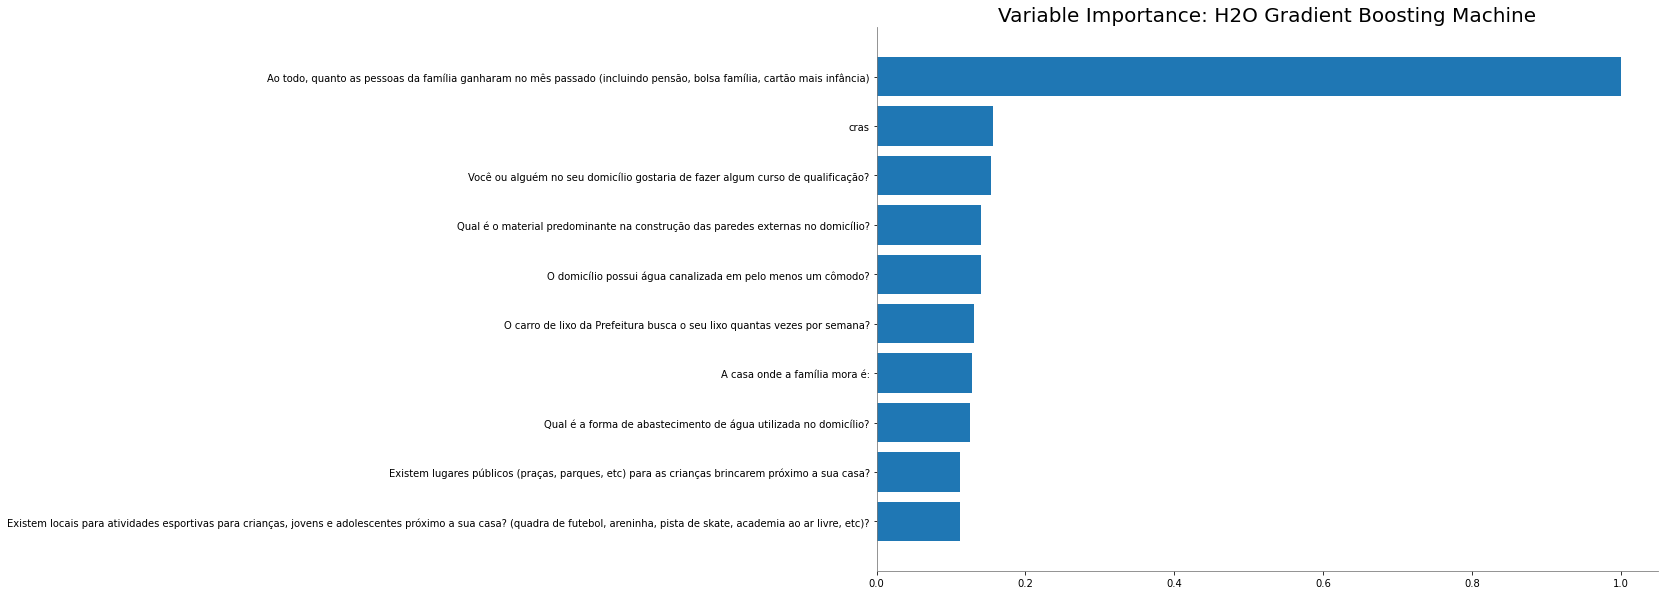

<Figure size 432x288 with 0 Axes>

In [ ]:
all_features = [10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29] #always include 29 feat, never include 9, 13, 24 features (p-value <= 0.05)

df_all_features = df[all_features]

feature_combinations = {
    'df_all_features' : df[all_features],

}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

In [ ]:
y = ['grave']*8878 + ['leve']*1734 + ['moderada']*14266 + ['sem ia']*2214
y_pred = ['grave']*2595 + ['leve']*11 + ['moderada']*6226 + ['sem ia']*46 + ['grave']*250 + ['leve']*8 + ['moderada']*1446 + ['sem ia']*30 + ['grave']*2613 + ['leve']*15 + ['moderada']*11505 + ['sem ia']*133 + ['grave']*264 + ['leve']*5 + ['moderada']*1868 + ['sem ia']*77

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

cm = metrics.confusion_matrix(y, y_pred, labels=['grave', 'leve', 'moderada', 'sem ia'])
print(cm)

print('\nf1_score:', f1_score(y, y_pred, average=None)) 
print('\nrecall_score:', recall_score(y, y_pred, average=None)) 
print('\nprecision_score:', precision_score(y, y_pred, average=None)) 

[[ 2595    11  6226    46]
 [  250     8  1446    30]
 [ 2613    15 11505   133]
 [  264     5  1868    77]]

f1_score: [0.35547945 0.00902425 0.6516383  0.0616    ]

recall_score: [0.29229556 0.00461361 0.80646292 0.03477868]

precision_score: [0.45351276 0.20512821 0.54668567 0.26923077]


# Execução Select From Model (SFM)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFM_logistic_regression

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    O domicílio possui água canalizada em pelo menos um cômodo?    No domicílio, existe banheiro ou sanitário?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  -------------------------------------------------------------  ---------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.226898                                                              1                                              1  grave
                                                                   0                      0                                                                                                                        0.663366                                                              1                                              1  moderada
                                                                   0                      0                                                                                                                        0.206271                                                              1                                              1  sem ia
                                                                   1                      0.166667                                                                                                                 0.371287                                                              0                                              1  grave
                                                                   0                      0                                                                                                                        0.412541                                                              0                                              0  moderada
                                                                   0                      0                                                                                                                        0.377063                                                              1                                              1  moderada
                                                                   0                      0                                                                                                                        0.412541                                                              1                                              1  moderada
                                                                   0                      0                                                                                                                        0.49505                                                               1                                              0  moderada
                                                                   0                      0                                                                                                                        0.247525                                                              1                                              1  moderada
                                                                   0                      0                                                                                                                        0.474422                                                 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
DeepLearning_grid_2_AutoML_2_20221115_222725_model_1                0.738683    1.08592  0.624507  0.390009
GBM_grid_1_AutoML_2_20221115_222725_model_10                        0.739179    1.08143  0.635537  0.403907
GBM_grid_1_AutoML_2_20221115_222725_model_2                         0.739206    1.08604  0.63781   0.406801
GBM_grid_1_AutoML_2_20221115_222725_model_8                         0.739997    1.08326  0.635278  0.403578
GBM_grid_1_AutoML_2_20221115_222725_model_11                        0.741415    1.07688  0.628898  0.395512
GBM_grid_1_AutoML_2_20221115_222725_model_12                        0.74211     1.07897  0.634892  0.403088
GBM_grid_1_AutoML_2_20221115_222725_model_1                         0.74223     1.07898  0.634692  0.402833
DeepLearning_grid_1_AutoML_2_

### df_SFM_logistic_regression has accuracy: 0.5207572235137828

### Details of the best model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_2_20221115_222725_model_1


Status of Neuron Layers: predicting ia level, 4-class classification, multinomial distribution, CrossEntropy loss, 624 weights/biases, 12.6 KB, 494,491 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight             weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ----------------------  -------------------  -------------------  -------------------
    1        5        Input             15.0
    2        20       RectifierDropout  0.0        0.0   0.0   0.0023549079630174673  0.0019118450582027435  0.0         -0.0043718815618194636  0.10086822509765625  -0.1266019099761917  0.07184669375419617
    3        20       RectifierDropout  0.0        0.0   0.0   0.009733985839557136   0.010649602860212326   0.0         0.09952993162019994     0.37358927726745605  1.160435925287424    1.1219520568847656
    4        4        Softmax                      0.0   0.0   0.01800714615492325    0.02328328788280487    0.0         -0.9484168108087033     1.1931614875793457   -0.7967811236757104  0.30238282680511475

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.38935771106319733
RMSE: 0.6239853452311178
LogLoss: 1.069723836781804
Mean Per-Class Error: 0.746514163749298
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  --------------
184      0       3129        0         0.944461   3,129 / 3,313
20       0       627         0         1          647 / 647
219      0       5046        0         0.0415954  219 / 5,265
13       0       780         0         1          793 / 793
436      0       9582        0         0.47794    4,788 / 10,018

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.52206
2    0.857057
3    0.935217
4    1

ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.39000900421508145
RMSE: 0.624507008939917
LogLoss: 1.0859210789095557
Mean Per-Class Error: 0.738682529757364
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1510     0       7347        21        0.829917  7,368 / 8,878
170      0       1551        13        1         1,734 / 1,734
1948     0       12247       71        0.141525  2,019 / 14,266
210      0       1967        37        0.983288  2,177 / 2,214
3838     0       23112       142       0.490846  13,298 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.509154
2    0.855197
3    0.931493
4    1

Cross-Validation Metrics Summary: 
                         mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------  ---

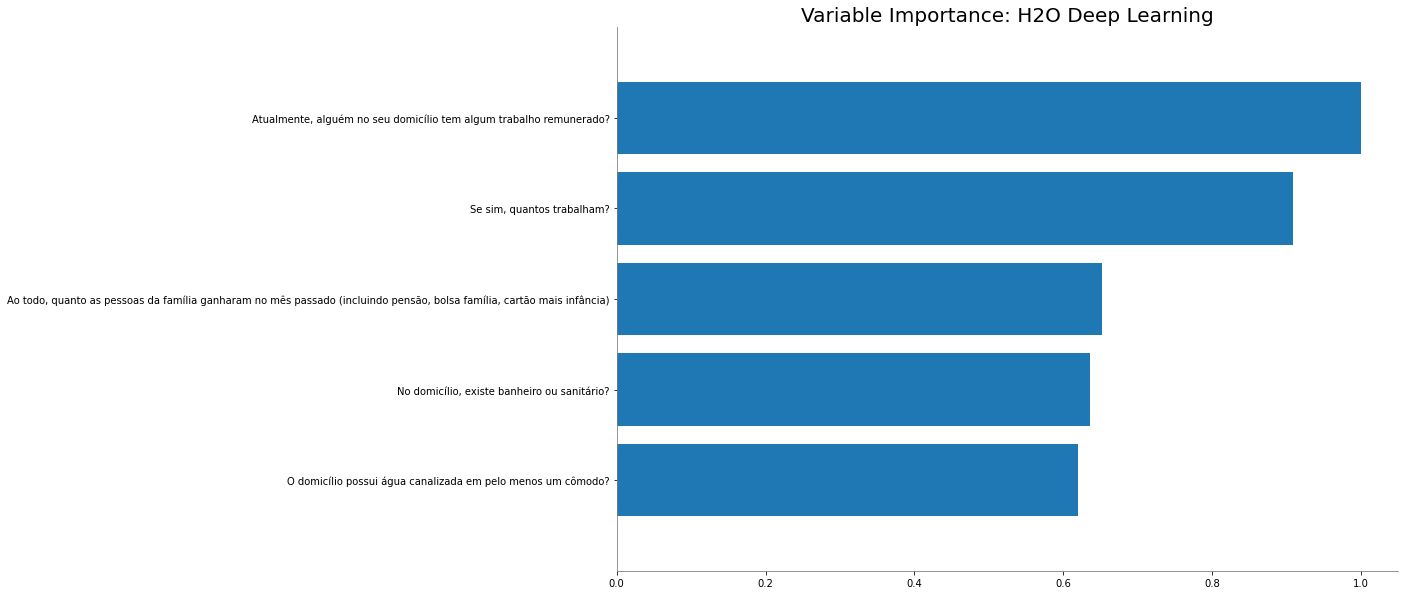

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFM_logistic_regression_cv

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    Qual é o material predominante na construção das paredes externas no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?  ia level
--------------------------------------------------------------------  --------------------------------------------------------------------------------  ---------------------------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  ----------
                                                                   0                                                                                 0                                                                                  0                                                              0                                                 1                                              1  grave
                                                                   0                                                                                 0                                                                                  0                                                              0                                                 1                                              1  grave
                                                                   1                                                                                 1                                                                                  0                                                              1                                                 0                                              1  sem ia
                                                                   0                                                                                 1                                                                                  0                                                              1                                                 1                                              1  moderada
                                                                   0                                                                                 1                                                                                  0                                                              1                                                 1                                              1  leve
                                                                   0                                                                                 1                                                                                  0                                                              1                                                 1                                              1  grave
                                                                   0                                                                                 1                                                                                  0                                                              1                                                 1                                              1  grave
                                                                   1                                                                                 1                                                                                  1                                                              1                                                 0                                    

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
DeepLearning_grid_1_AutoML_3_20221115_232821_model_5                0.728528    1.1064   0.6089    0.370759
GBM_grid_1_AutoML_3_20221115_232821_model_1                         0.729011    1.08468  0.64076   0.410573
GBM_grid_1_AutoML_3_20221115_232821_model_12                        0.730085    1.07726  0.635792  0.404231
GBM_grid_1_AutoML_3_20221115_232821_model_10                        0.730155    1.07908  0.637107  0.405905
GBM_grid_1_AutoML_3_20221115_232821_model_2                         0.730235    1.07626  0.634941  0.40315
GBM_grid_1_AutoML_3_20221115_232821_model_8                         0.730532    1.07489  0.63345   0.401259
DeepLearning_grid_2_AutoML_3_20221115_232821_model_2                0.731662    1.1077   0.60673   0.368121
DeepLearning_grid_1_AutoML_3_2

### df_SFM_logistic_regression_cv has accuracy: 0.515775489870475

### Details of the best model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_3_20221115_232821_model_5


Status of Neuron Layers: predicting ia level, 4-class classification, multinomial distribution, CrossEntropy loss, 1,104 weights/biases, 18.5 KB, 9,978 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate               rate_rms                momentum    mean_weight             weight_rms           mean_bias              bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ----------------------  ----------------------  ----------  ----------------------  -------------------  ---------------------  -------------------
    1        6        Input             15.0
    2        100      RectifierDropout  20.0       0.0   0.0   0.00021698806678614347  0.00015757809160277247  0.0         -0.0014378413416852708  0.12881094217300415  0.48010050801397397    0.03905083239078522
    3        4        Softmax                      0.0   0.0   0.0003011925589089515   0.00010846447548829019  0.0         -0.07934588844691462    0.5337803363800049   -0.058929080624715455  0.10512280464172363

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.36674329577282216
RMSE: 0.605593341915862
LogLoss: 1.1003317637376895
Mean Per-Class Error: 0.7370389588995965
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  --------------
551      0       2698        0         0.830409  2,698 / 3,249
53       0       561         0         1         614 / 614
627      0       4698        0         0.117746  627 / 5,325
55       0       774         0         1         829 / 829
1286     0       8731        0         0.475991  4,768 / 10,017

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.524009
2    0.855945
3    0.937406
4    1

ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.37075880609544454
RMSE: 0.6088996683325132
LogLoss: 1.1063950491708292
Mean Per-Class Error: 0.7285277945786406
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2131     0       6747        0         0.759968  6,747 / 8,878
191      0       1543        0         1         1,734 / 1,734
2199     0       12067       0         0.154143  2,199 / 14,266
204      0       2010        0         1         2,214 / 2,214
4725     0       22367       0         0.475934  12,894 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.524066
2    0.854274
3    0.933744
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.524065  0.00879883  0.528413      0.540221      0.527132      0.524917      0.518272      0.52085

<Figure size 432x288 with 0 Axes>

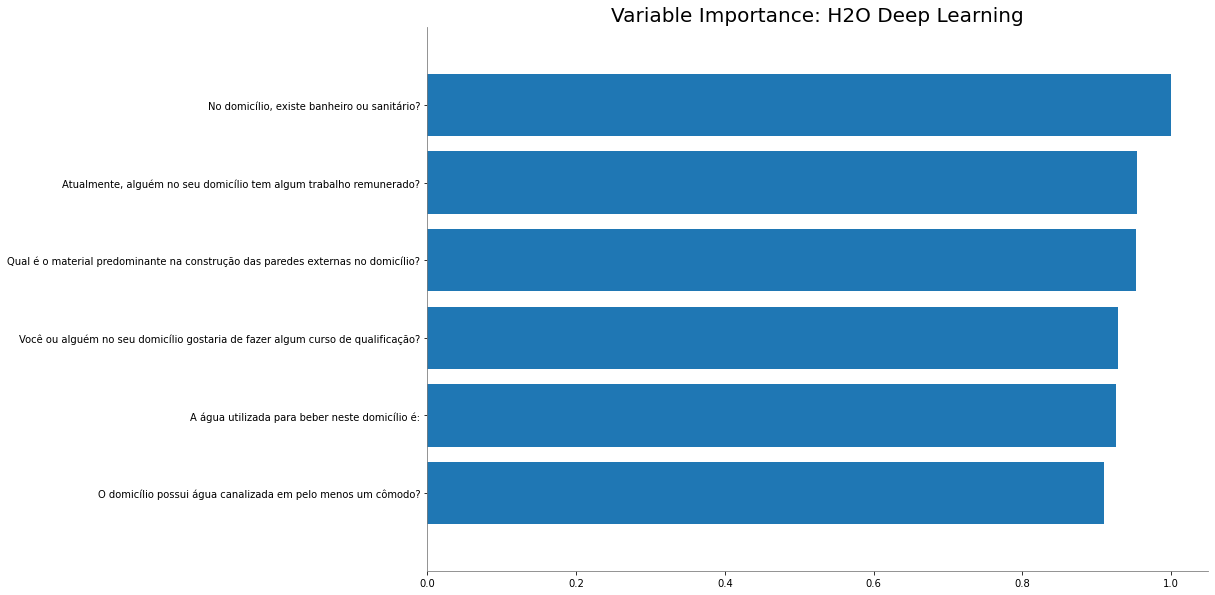

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFM_perceptron

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    creas    Qual é o material predominante na construção das paredes externas no domicílio?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  -------  ---------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.222772                                                                                 0        0                                                                                  1                                                                                                                                  0                                                             1  moderada
                                                                   1                      0.166667                                                                                                                 1                                                                                        1        0                                                                                  0                                                                                                                                  0                                                             1  moderada
                                                                   0                      0                                                                                                                        0.49505                                                                                  1        0                                                                                  0                                                                                                                                  0                                                             1  moderada
                                                                   0                      0                                                                                                                        0.412541                                                                                 0        0                                                                                  1                                                                                                                                  1                                                             0  grave
                                                                   1                      0.166667                                                                                                                 0.577558                                                                                 1        0                                                                                  0                            

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                               mean_per_class_error    logloss      rmse       mse
DeepLearning_grid_2_AutoML_4_20221116_02909_model_1                0.740259    1.11827  0.63072   0.397807
GBM_grid_1_AutoML_4_20221116_02909_model_2                         0.741669    1.09507  0.641981  0.41214
XGBoost_grid_1_AutoML_4_20221116_02909_model_1                     0.741819    1.09343  0.623329  0.388539
GBM_grid_1_AutoML_4_20221116_02909_model_10                        0.741962    1.09117  0.640526  0.410273
DRF_1_AutoML_4_20221116_02909                                      0.742027    1.15328  0.628253  0.394702
XGBoost_grid_1_AutoML_4_20221116_02909_model_8                     0.742384    1.07349  0.620691  0.385258
XGBoost_grid_1_AutoML_4_20221116_02909_model_3                     0.743177    1.09034  0.622668  0.387715
XGBoost_grid_1_AutoML_4_20221116_02909

### df_SFM_perceptron has accuracy: 0.5237462636997675

### Details of the best model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_4_20221116_02909_model_1


Status of Neuron Layers: predicting ia level, 4-class classification, multinomial distribution, CrossEntropy loss, 684 weights/biases, 14.3 KB, 9,950 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight           weight_rms           mean_bias              bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  --------------------  -------------------  ---------------------  --------------------
    1        8        Input             15.0
    2        20       RectifierDropout  0.0        0.0   0.0   0.0013041116374552075  0.0021577775478363037  0.0         -0.04219068361489917  0.24506086111068726  0.49120664603521436    0.09292545914649963
    3        20       RectifierDropout  0.0        0.0   0.0   0.000989088003661891   0.0007798927836120129  0.0         -0.00593283433940087  0.21667927503585815  0.9677501149418862     0.09018117189407349
    4        4        Softmax                      0.0   0.0   0.001651762708206661   0.0012967013753950596  0.0         0.012227260950021445  1.0701699256896973   -0.017495798032839377  0.041525885462760925

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.3953191269284141
RMSE: 0.6287440869928035
LogLoss: 1.10897002208144
Mean Per-Class Error: 0.7437165297490038
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  --------------
195      3       3061        10        0.940349   3,074 / 3,269
9        0       641         5         1          655 / 655
231      3       4983        42        0.0524815  276 / 5,259
24       2       794         15        0.982036   820 / 835
459      8       9479        72        0.481633   4,825 / 10,018

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.518367
2    0.845279
3    0.93352
4    1

ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.3978073185177639
RMSE: 0.6307196829953572
LogLoss: 1.118270806950403
Mean Per-Class Error: 0.7402589990061178
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
4489     0       4358        31        0.494368  4,389 / 8,878
827      0       881         26        1         1,734 / 1,734
6840     0       7325        101       0.486541  6,941 / 14,266
975      0       1195        44        0.980126  2,170 / 2,214
13131    0       13759       202       0.562306  15,234 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.437694
2    0.85265
3    0.932858
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ---

<Figure size 432x288 with 0 Axes>

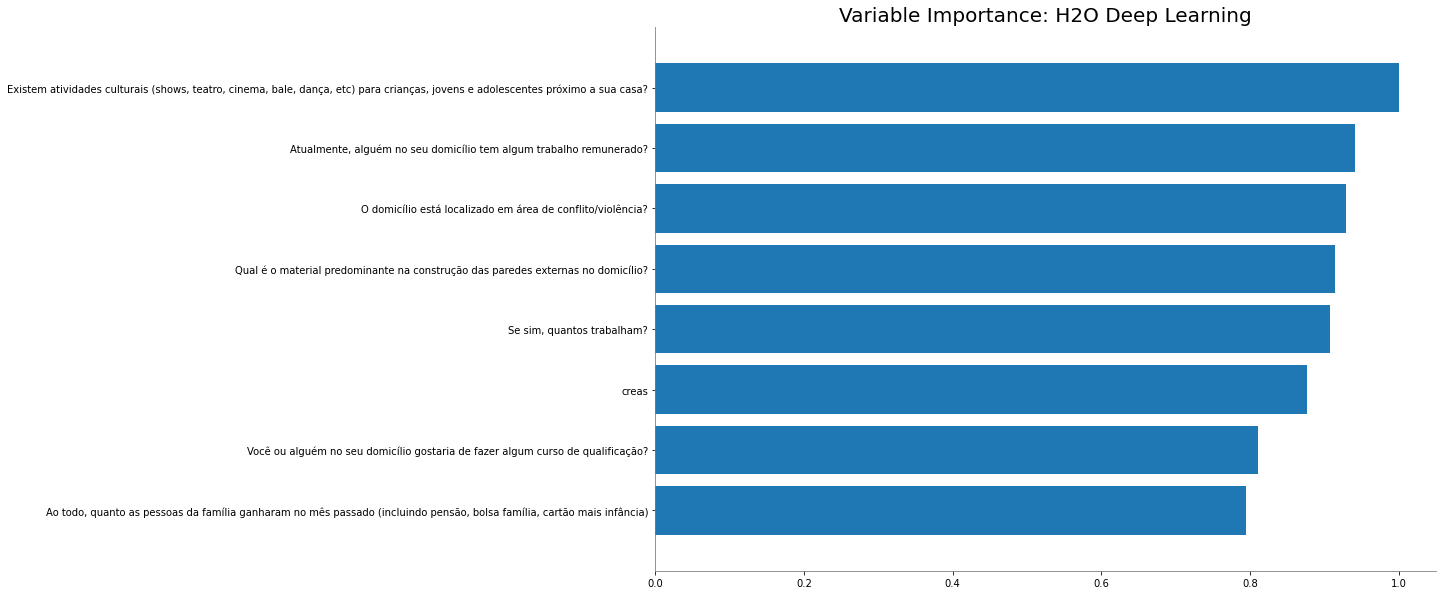

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFM_passive_agressive_classifier

Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    A água utilizada para beber neste domicílio é:    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?  ia level
----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  ------------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ----------
                    0                                                                                                                        0.907591                                                                                 0       1                                                                                  1                                                                  0                                                 1                                                                           1                                                                                                 0  moderada
                    0.166667                                                                                                                 0.325908                                                                                 1       0                                                                                  0                                                                  1                                                 0                                                                           1                                                                                                 1  grave
                    0                                                                                                                        0.405116                                                                                 1       0                                                                                  1                                                                  0                                                 0                                                                           1                                                                                                 1  moderada
                    0                                                                                                                        0.605611                                                                                 1       1                                                                                  1                                                                  0                                                 0                                                                           1                                                                                                 0  grave
                    0                                                                                                                        0.412541                                                                                 0       0                       

AutoML progress: |██████████████████████████████████████████████████████████

In [ ]:
SFM_logistic_regression = [10, 11, 12, 20, 22, 29]
SFM_logistic_regression_cv = [10, 14, 18, 20, 21, 22, 29]
SFM_perceptron = [10, 11, 12, 14, 16, 18, 26, 28, 29]

df_SFM_logistic_regression = df[SFM_logistic_regression]
df_SFM_logistic_regression_cv = df[SFM_logistic_regression_cv]
df_SFM_perceptron = df[SFM_perceptron]


feature_combinations = {
    'df_SFM_logistic_regression' : df[SFM_logistic_regression],
    'df_SFM_logistic_regression_cv' : df[SFM_logistic_regression_cv],
    'df_SFM_perceptron' : df[SFM_perceptron]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFM_ridge_classifier

Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    creas    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    O domicílio está localizado em área de conflito/violência?  ia level
----------------------------  -----------------------------------------------------------------------------------------------------------------------  -------  -------------------------------------------------------------  ------------------------------------------------  ------------------------------------------------------------  ----------
                    0.166667                                                                                                                 0.528053        0                                                              1                                                 1                                                             1  leve
                    0                                                                                                                        0.330033        0                                                              1                                                 1                                                             1  moderada
                    0.166667                                                                                                                 0.330033        0                                                              1                                                 0                                                             1  leve
                    0                                                                                                                        0.430693        0                                                              0                                                 1                                                             1  moderada
                    0                                                                                                                        0.412541        0                                                              1                                                 1                                                             1  grave
                    0                                                                                                                        0.536304        0                                                              1                                                 1                                                             1  grave
                    0                                                                                                                        0.412541        0                                                              1                                                 1                                                             1  moderada
                    0                                                                                                                        0.296205        0                                                              0                                                 1                                                             1  moderada
                    0.166667                                                                                                                 0.412541        0                                                              0                                                 0                                                             1  grave
                    0.166667                                                                                                                 0.674092        0                                                              1            

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
DRF_1_AutoML_1_20221116_130352                                      0.730112    1.22772  0.626561  0.392579
GBM_grid_1_AutoML_1_20221116_130352_model_9                         0.730355    1.07044  0.625905  0.391758
DeepLearning_grid_1_AutoML_1_20221116_130352_model_3                0.731488    1.14697  0.622559  0.38758
GBM_grid_1_AutoML_1_20221116_130352_model_2                         0.73155     1.08212  0.634397  0.402459
GBM_grid_1_AutoML_1_20221116_130352_model_11                        0.731553    1.07029  0.623534  0.388794
GBM_grid_1_AutoML_1_20221116_130352_model_1                         0.731573    1.0807   0.635499  0.403859
XGBoost_grid_1_AutoML_1_20221116_130352_model_1                     0.731602    1.08275  0.620589  0.385131
XGBoost_grid_1_AutoML_1_202211

### Best Model Updated: df_SFM_ridge_classifier-DRF_1_AutoML_1_20221116_130352-acc:0.5111258718033875

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SFM_ridge_classifier-DRF_1_AutoML_1_20221116_130352-acc:0.5111258718033875

### df_SFM_ridge_classifier has accuracy: 0.5111258718033875

### Details of the best model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20221116_130352


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 200                         3.10382e+06            20           20           20            453           1851          1230.2

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.3919966930372581
RMSE: 0.6260963927681249
LogLoss: 1.4118656158020522
Mean Per-Class Error: 0.7295428412673486
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1841     64      6901        72        0.792633  7,037 / 8,878
203      20      1489        22        0.988466  1,714 / 1,734
1876     97      12143       150       0.148815  2,123 / 14,266
203      16      1969        26        0.988257  2,188 / 2,214
4123     197     22502       270       0.482135  13,062 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.517865
2    0.837923
3    0.929056
4    1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.3925786101142596
RMSE: 0.6265609388672897
LogLoss: 1.2277155849539148
Mean Per-Class Error: 0.7301120698171528
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1862     69      6881        66        0.790268  7,016 / 8,878
214      19      1484        17        0.989043  1,715 / 1,734
1937     100     12085       144       0.152881  2,181 / 14,266
218      15      1955        26        0.988257  2,188 / 2,214
4231     203     22405       253       0.483538  13,100 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.516462
2    0.836963
3    0.930791
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.516464  0.0134948   0.504797      0.493727      0.528608      0.52787       0.513843      0.524548      0.51089       0.517165      0.538206      0.504983
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.483536  0.0134948   0.495203      0.506273      0.471392      0.47213       0.486157      0.475452      0.48911       0.482835      0.461794      0.495017
err_count                1310      36.7        1342          1372          1277          1279          1317          1288          1325          1308          1251          1341
logloss     

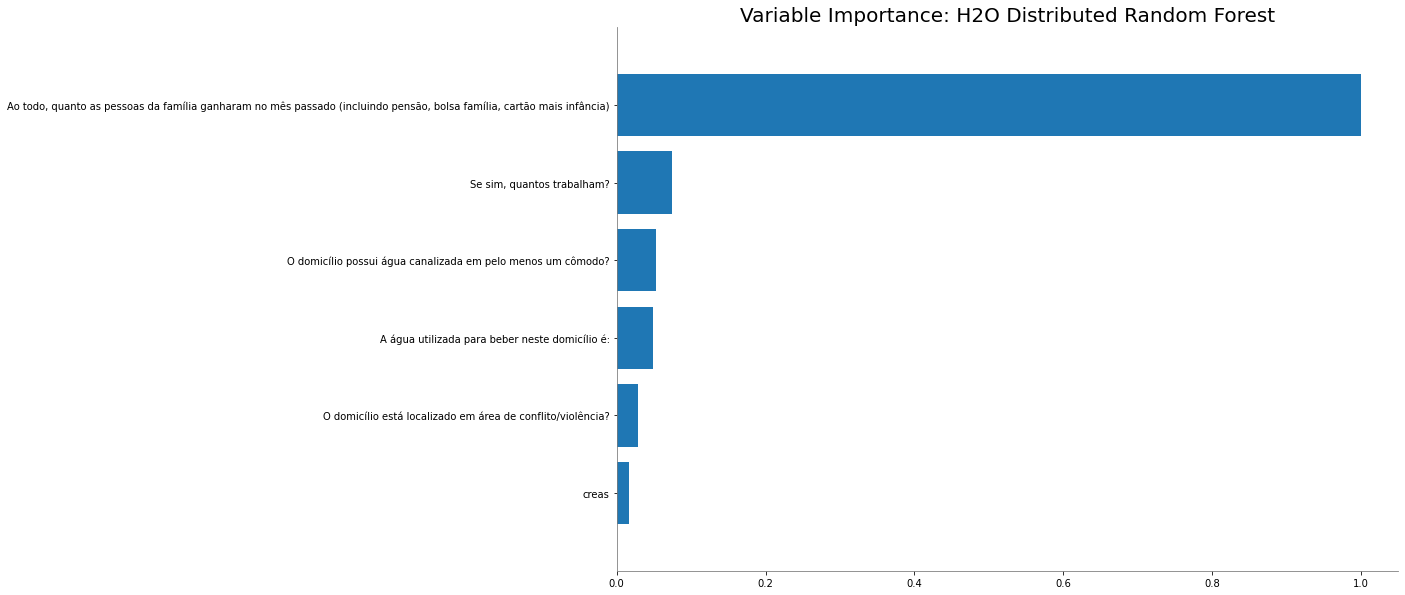

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFM_ridge_classifier_cv

Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    creas    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O domicílio está localizado em área de conflito/violência?  ia level
----------------------------  -----------------------------------------------------------------------------------------------------------------------  -------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  ------------------------------------------------------------  ----------
                    0                                                                                                                        0.330033        0                                                              1                                                 1                                              1                                                             1  moderada
                    0                                                                                                                        0.328383        0                                                              1                                                 1                                              1                                                             1  moderada
                    0.166667                                                                                                                 0.660066        0                                                              1                                                 1                                              1                                                             1  moderada
                    0                                                                                                                        1               0                                                              1                                                 1                                              1                                                             1  grave
                    0                                                                                                                        0.288779        0                                                              0                                                 0                                              0                                                             1  moderada
                    0                                                                                                                        1               0                                                              0                                                 0                                              1                                                             1  moderada
                    0                                                                                                                        0.247525        0                                                              1                                                 1                                              1                                                             1  moderada
                    0                                                                                                                        0.206271        0                                                              0                                                 0                                              0                                                             1  moderada
                    0                                                                        

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_2_20221116_140442_model_8                         0.728291    1.07973  0.632169  0.399637
GBM_grid_1_AutoML_2_20221116_140442_model_9                         0.728894    1.06841  0.623389  0.388614
GBM_grid_1_AutoML_2_20221116_140442_model_2                         0.729123    1.07954  0.63285   0.400499
StackedEnsemble_AllModels_4_AutoML_2_20221116_140442                0.729735    1.06446  0.619001  0.383162
XGBoost_grid_1_AutoML_2_20221116_140442_model_3                     0.729761    1.0818   0.619744  0.384083
GBM_grid_1_AutoML_2_20221116_140442_model_11                        0.729826    1.06736  0.622541  0.387557
XGBoost_2_AutoML_2_20221116_140442                                  0.729994    1.07139  0.61848   0.382518
GBM_grid_1_AutoML_2_20221116_

### Best Model Updated: df_SFM_ridge_classifier_cv-GBM_grid_1_AutoML_2_20221116_140442_model_8-acc:0.5273995350381933

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SFM_ridge_classifier_cv-GBM_grid_1_AutoML_2_20221116_140442_model_8-acc:0.5273995350381933

### df_SFM_ridge_classifier_cv has accuracy: 0.5273995350381933

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20221116_140442_model_8


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    29                 116                         270035                 0            10           6.83621       1             368           180.862

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3825717033784996
RMSE: 0.6185238098719399
LogLoss: 1.0266325189076413
Mean Per-Class Error: 0.7035788707807071
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2395     0       6478        5         0.730232  6,483 / 8,878
172      10      1551        1         0.994233  1,724 / 1,734
1480     1       12778       7         0.104304  1,488 / 14,266
192      1       1989        32        0.985547  2,182 / 2,214
4239     12      22796       45        0.438395  11,877 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.561605
2    0.861472
3    0.947438
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.3996374601952818
RMSE: 0.6321688541800219
LogLoss: 1.0797282996306847
Mean Per-Class Error: 0.7282907318614029
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1964     10      6893        11        0.778779  6,914 / 8,878
181      0       1548        5         1         1,734 / 1,734
1948     3       12278       37        0.139352  1,988 / 14,266
193      1       2009        11        0.995032  2,203 / 2,214
4286     14      22728       64        0.473904  12,839 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.526096
2    0.852097
3    0.931124
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.526096  0.00840113  0.520295      0.532472      0.518272      0.521595      0.543743      0.533776      0.52787       0.522333      0.52381       0.516796
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.473904  0.00840113  0.479705      0.467528      0.481728      0.478405      0.456257      0.466224      0.47213       0.477667      0.47619       0.483204
err_count                1283.9    22.7569     1300          1267          1305          1296          1236          1263          1279          1294          1290         

<Figure size 432x288 with 0 Axes>

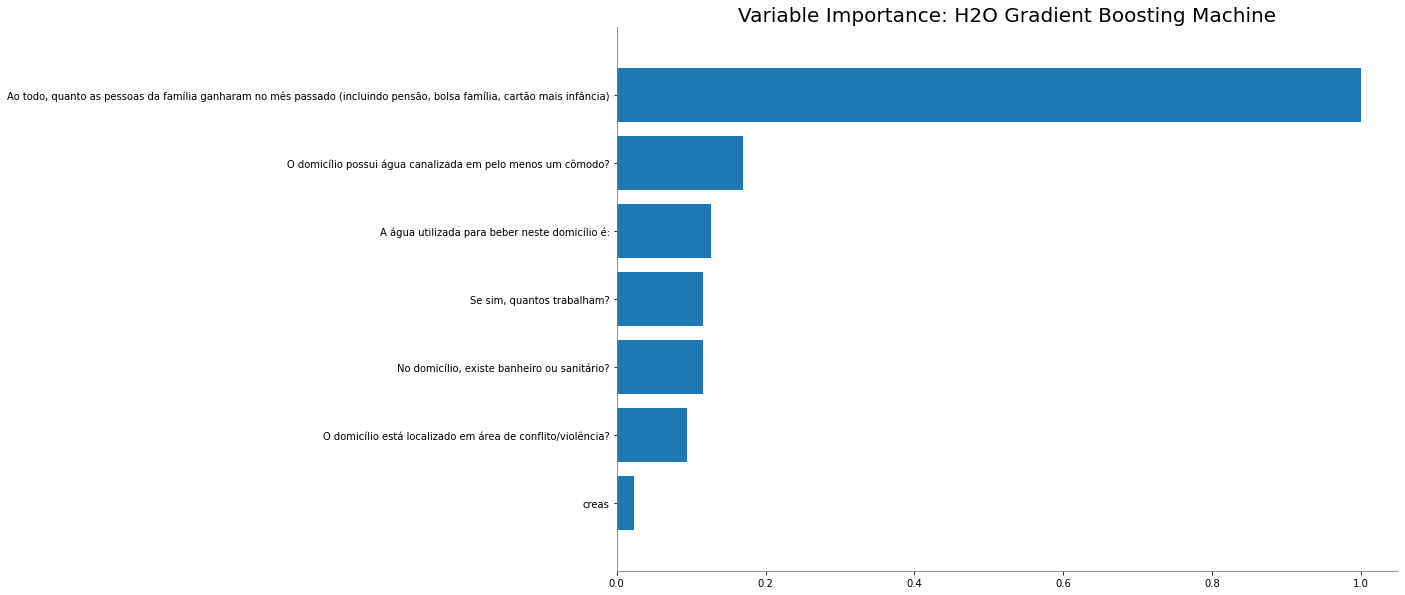

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFM_sgd_classifier

Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    creas    A casa onde a família mora é:    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?  ia level
----------------------------  -----------------------------------------------------------------------------------------------------------------------  -------  -------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ----------
                    0.333333                                                                                                                 1               0                                1                                                              1                                                 1                                                                                                                                  0  moderada
                    0                                                                                                                        0.209571        0                                0                                                              1                                                 1                                                                                                                                  0  sem ia
                    0                                                                                                                        0.412541        0                                0                                                              0                                                 1                                                                                                                                  0  grave
                    0                                                                                                                        0.577558        0                                1                                                              0                                                 1                                                                                                                                  0  moderada
                    0                                                                                                                        0.346535        0                                1                                                              1                                                 1                                                                                                                                  0  grave
                    0.166667                                                                                                                 0.412541        0                                0                                                              1                                                 1                                                                                                                                  0  moderada
                    0                                                                                                                        0.412541        0                                1                                                              0                                                 0                                                                                                                                  0  gra

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
StackedEnsemble_AllModels_4_AutoML_3_20221116_150528                0.727458    1.06937  0.620113  0.38454
GBM_grid_1_AutoML_3_20221116_150528_model_10                        0.732835    1.07221  0.628712  0.395279
GBM_grid_1_AutoML_3_20221116_150528_model_11                        0.732882    1.07173  0.624897  0.390496
GBM_grid_1_AutoML_3_20221116_150528_model_9                         0.73297     1.07209  0.62492   0.390525
DRF_1_AutoML_3_20221116_150528                                      0.733137    1.1865   0.627905  0.394265
XGBoost_grid_1_AutoML_3_20221116_150528_model_10                    0.733188    1.08003  0.620122  0.384552
GBM_grid_1_AutoML_3_20221116_150528_model_1                         0.733444    1.07513  0.631638  0.398967
GBM_grid_1_AutoML_3_20221116_1

### df_SFM_sgd_classifier has accuracy: 0.5210893390900033

### Details of the best model

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_4_AutoML_3_20221116_150528

No summary for this model

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.37572483252386535
RMSE: 0.6129639732674876
LogLoss: 1.0551708279575016
Null degrees of freedom: 10018
Residual degrees of freedom: 9514
Null deviance: 21640.171029694557
Residual deviance: 21143.513050612415
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  --------------
577      0       2655        37        0.823493  2,692 / 3,269
49       0       550         14        1         613 / 613
552      0       4666        86        0.120287  638 / 5,304
55       0       718         60        0.927971  773 / 833
1233     0       8589        197       0.470706  4,716 / 10,019

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.529294
2    0.858469
3    0.941411
4    1

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.3845397619037244
RMSE: 0.620112700969529
LogLoss: 1.0693663773837252
Null degrees of freedom: 27091
Residual degrees of freedom: 26584
Null deviance: 58738.637859628114
Residual deviance: 57942.54779215976
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
1298     0       7531        49        0.853796   7,580 / 8,878
83       0       1617        34        1          1,734 / 1,734
1188     0       12906       172       0.0953316  1,360 / 14,266
108      0       2019        87        0.960705   2,127 / 2,214
2677     0       24073       342       0.472501   12,801 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.527499
2    0.855898
3    0.933707
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.527533  0.0103479   0.520258      0.53346       0.529347      0.515009      0.517052      0.536727      0.528807      0.537341      0.543168      0.51416
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.472467  0.0103479   0.479743      0.46654       0.470653      0.484991      0.482948      0.463273      0.471193      0.462659      0.456832      0.48584
err_count                1280.1    39.2696     1267          1227          1283          1341          1317          1274          1284          1270          1217          1321
logloss                  1.0693    0.0105445   1.05958       1.06284       1.08171       1.08962       1.07645       1.05876       1.06062       1.06186       1.07052       1.07105
max_per_class_error      1         0           1   

Variable importance plot is not available for this type of model (stackedensemble).
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFM_sgd_one_class_svm

Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    creas    A casa onde a família mora é:    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    O domicílio está localizado em área de conflito/violência?  ia level
-----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  -------  -------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                                                               0.165017                                                                                 1        0                                0                                                                  1                                                              1                                                 1                                              1                                                                           0                                                             1  moderada
                                                                                                               0.39604                                                                                  1        0                                0                                                                  1                                                              1                                                 1                                              1                                                                           1                                                             0  grave
                                                                                                               0.412541                                                                                 1        0                                1                                                                  1                                                              1                                                 1                                              1                                                                           0                                                             1  grave
                                                                                                               0.412541                                                                                 1        0                                1                                                                  1                                                              1                                                 1                                              1                                                                           1                                                             1  moderada
                                                                                                               0.577558                                                                                 1        0                                1                                                 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_4_20221116_160611_model_2                     0.723666    1.07856  0.631306  0.398547
XGBoost_grid_1_AutoML_4_20221116_160611_model_3                 0.724133    1.09274  0.619543  0.383834
XGBoost_1_AutoML_4_20221116_160611                              0.724143    1.08179  0.619426  0.383688
XGBoost_2_AutoML_4_20221116_160611                              0.724162    1.07815  0.618202  0.382173
XGBoost_grid_1_AutoML_4_20221116_160611_model_5                 0.724281    1.07487  0.617389  0.381169
GBM_grid_1_AutoML_4_20221116_160611_model_8                     0.724492    1.08297  0.633537  0.401369
GBM_grid_1_AutoML_4_20221116_160611_model_10                    0.724562    1.07424  0.629703  0.396526
DRF_1_AutoML_4_20221116_160611                               

### df_SFM_sgd_one_class_svm has accuracy: 0.5187645300564596

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_4_20221116_160611_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    37                 148                         366137                 0            11           6.54054       1             471           193

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3680179844376175
RMSE: 0.6066448585767603
LogLoss: 0.992059277605523
Mean Per-Class Error: 0.6848144924627206
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2953     0       5906        19        0.66738   5,925 / 8,878
198      1       1517        18        0.999423  1,733 / 1,734
1586     0       12646       34        0.113557  1,620 / 14,266
199      1       1923        91        0.958898  2,123 / 2,214
4936     2       21992       162       0.420825  11,401 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.579175
2    0.865901
3    0.9577
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.3985466679479929
RMSE: 0.6313055266255737
LogLoss: 1.0785587840553794
Mean Per-Class Error: 0.7236664896389755
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2250     1       6598        29        0.746565  6,628 / 8,878
229      0       1488        17        1         1,734 / 1,734
2307     4       11889       66        0.16662   2,377 / 14,266
226      0       1947        41        0.981481  2,173 / 2,214
5012     5       21922       153       0.476598  12,912 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.523402
2    0.853573
3    0.933412
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.523143  0.0119713   0.530996      0.515129      0.529347      0.512735      0.535991      0.544112      0.508306      0.519011      0.525655      0.510151
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.476857  0.0119713   0.469004      0.484871      0.470653      0.487265      0.464009      0.455888      0.491694      0.480989      0.474345      0.489849
err_count                1291.9    32.4327     1271          1314          1275          1320          1257          1235          1332          1303          1285          1327
l

<Figure size 432x288 with 0 Axes>

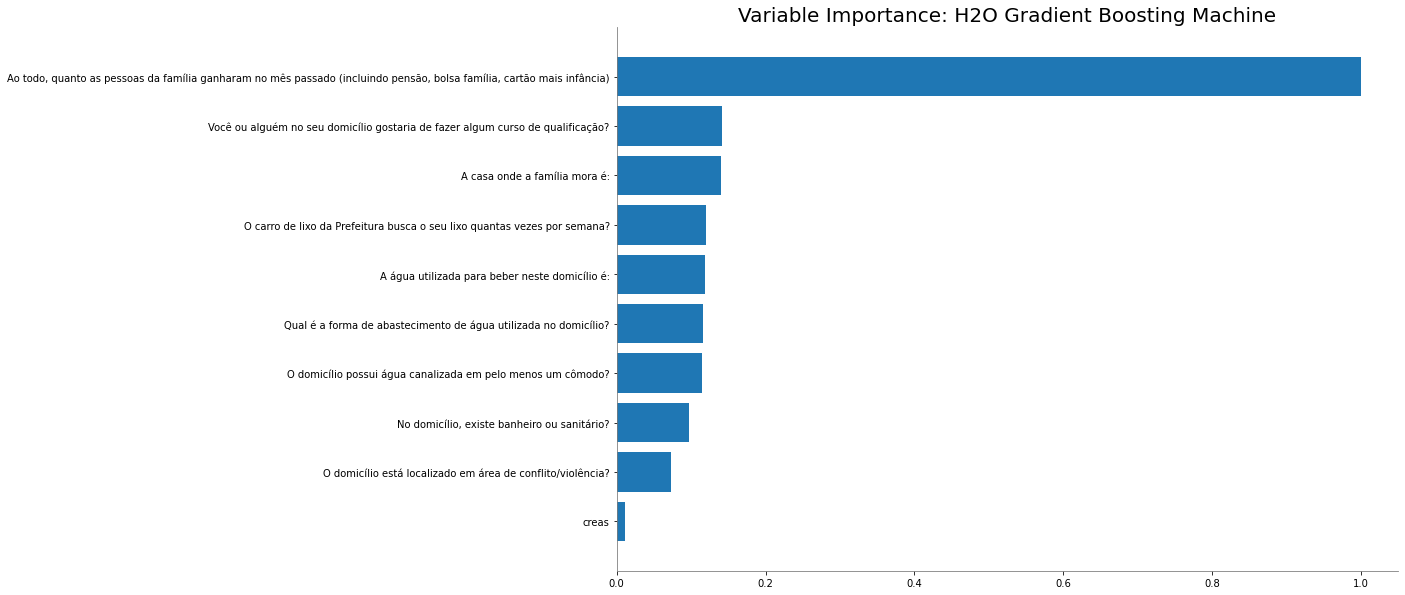

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFM_passive_agressive_classifier

Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    A água utilizada para beber neste domicílio é:    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?  ia level
----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  ------------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ----------
                    0                                                                                                                        0.165017                                                                                 1       0                                                                                  0                                                                  1                                                 1                                                                           1                                                                                                 0  moderada
                    0                                                                                                                        0.412541                                                                                 1       0                                                                                  0                                                                  0                                                 0                                                                           0                                                                                                 1  grave
                    0                                                                                                                        0.49505                                                                                  1       1                                                                                  0                                                                  0                                                 1                                                                           1                                                                                                 1  moderada
                    0                                                                                                                        0.309406                                                                                 1       0                                                                                  1                                                                  1                                                 1                                                                           1                                                                                                 1  moderada
                    0                                                                                                                        0.455446                                                                                 0       1                    

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
XGBoost_grid_1_AutoML_5_20221116_170643_model_3                 0.725231    1.10276  0.621235  0.385933
GBM_grid_1_AutoML_5_20221116_170643_model_8                     0.725679    1.0921   0.636919  0.405666
XGBoost_grid_1_AutoML_5_20221116_170643_model_1                 0.725907    1.10033  0.621065  0.385722
GBM_grid_1_AutoML_5_20221116_170643_model_2                     0.726826    1.08693  0.635227  0.403514
DRF_1_AutoML_5_20221116_170643                                  0.727014    2.08543  0.637045  0.405826
XGBoost_grid_1_AutoML_5_20221116_170643_model_7                 0.72722     1.09206  0.620089  0.38451
XGBoost_2_AutoML_5_20221116_170643                              0.727503    1.08409  0.619373  0.383623
XGBoost_grid_1_AutoML_5_20221116_170643_model_10              

### df_SFM_passive_agressive_classifier has accuracy: 0.5254068415808701

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_5_20221116_170643_model_3


Model Summary: 
    number_of_trees
--  -----------------
    33

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.3268146569840542
RMSE: 0.5716770565485851
LogLoss: 0.9123123880759264
Mean Per-Class Error: 0.6483329692160479
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
3008     6       5828        36        0.661185   5,870 / 8,878
198      64      1450        22        0.963091   1,670 / 1,734
1048     6       13161       51        0.0774569  1,105 / 14,266
242      4       1728        240       0.891599   1,974 / 2,214
4496     80      22167       349       0.391961   10,619 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.608039
2    0.881478
3    0.968515
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.38593284061725064
RMSE: 0.621234931903584
LogLoss: 1.1027564805587573
Mean Per-Class Error: 0.7252312886969328
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1980     16      6814        68        0.776977  6,898 / 8,878
232      8       1460        34        0.995386  1,726 / 1,734
2111     29      11968       158       0.161082  2,298 / 14,266
298      14      1830        72        0.96748   2,142 / 2,214
4621     67      22072       332       0.482209  13,064 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.517791
2    0.847446
3    0.931308
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.517791  0.00793019  0.513653      0.520295      0.507567      0.522702      0.511997      0.51938       0.525655      0.52787       0.504614      0.524179
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.482209  0.00793019  0.486347      0.479705      0.492433      0.477298      0.488003      0.48062       0.474345      0.47213       0.495386      0.475821
err_count                1306.4    21.4952     1318          1300          1334          1293          1322          1302          1285          1279          1342          1289
logloss                  1.10276   0.0125672   1.10148       1.10502       1.11361       1.09819       1.12208       1.09858       1.08782       1.08289       1.11872       1.09918
max_per_class_error      0.995393  0.00364873  0.993976      0.993902      0.99435       0.993865      1             0.994709      1             0.994624      0.988506      1
mean_per_class_accuracy  0.274986  0.00688221  0.268648  

<Figure size 432x288 with 0 Axes>

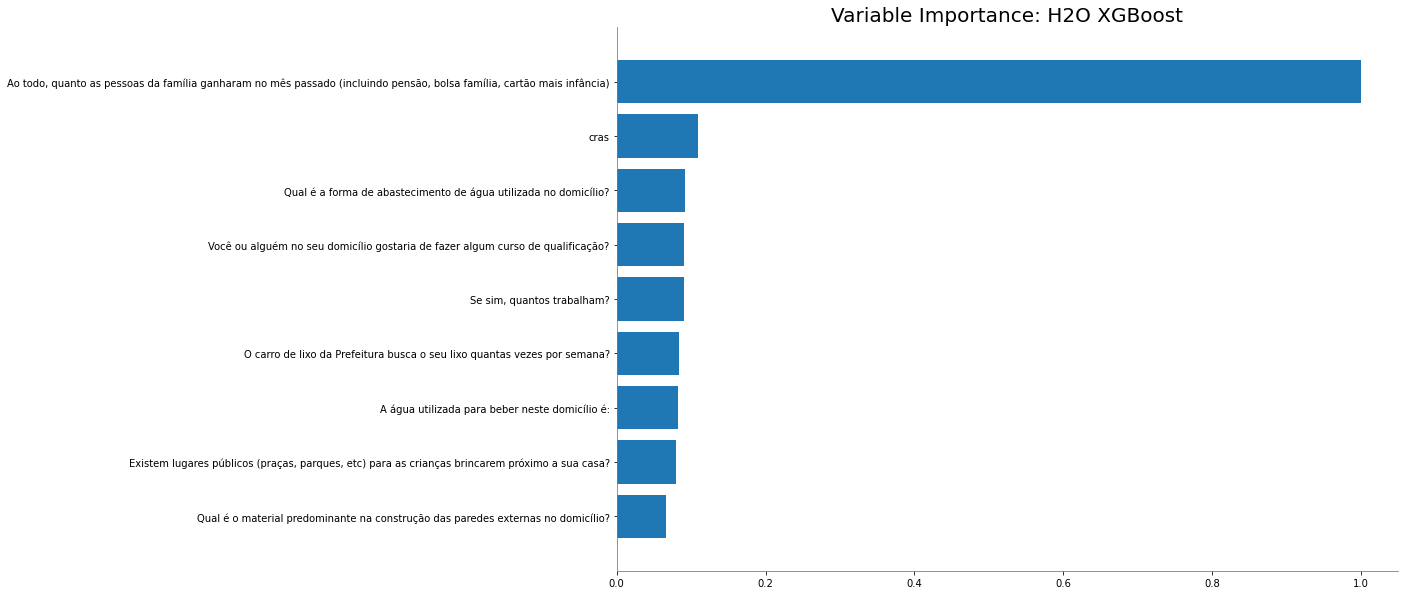

<Figure size 432x288 with 0 Axes>

In [ ]:
SFM_passive_agressive_classifier = [11, 12, 14, 15, 18, 19, 21, 23, 25, 29]
SFM_ridge_classifier = [11, 12, 16, 20, 21, 28, 29]
SFM_ridge_classifier_cv = [11, 12, 16, 20, 21, 22, 28, 29]
SFM_sgd_classifier = [11, 12, 16, 17, 20, 21, 26, 29]
SFM_sgd_one_class_svm = [12, 14, 16, 17, 19, 20, 21, 22, 23, 28, 29]

df_SFM_ridge_classifier = df[SFM_ridge_classifier]
df_SFM_ridge_classifier_cv = df[SFM_ridge_classifier_cv]
df_SFM_sgd_classifier = df[SFM_sgd_classifier]
df_SFM_sgd_one_class_svm = df[SFM_sgd_one_class_svm]
df_SFM_passive_agressive_classifier = df[SFM_passive_agressive_classifier]

feature_combinations = {
    'df_SFM_ridge_classifier' : df[SFM_ridge_classifier],
    'df_SFM_ridge_classifier_cv' : df[SFM_ridge_classifier_cv],
    'df_SFM_sgd_classifier' : df[SFM_sgd_classifier],
    'df_SFM_sgd_one_class_svm' : df[SFM_sgd_one_class_svm],
    'df_SFM_passive_agressive_classifier' : df[SFM_passive_agressive_classifier]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

# Execução Boruta

In [ ]:
boruta = [12, 14, 15, 18, 19, 20, 21, 22, 28, 29]

In [ ]:
df_boruta = df[boruta]

In [ ]:
feature_combinations = {
    "df_boruta" : df[boruta]
}

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_boruta

Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O domicílio está localizado em área de conflito/violência?  ia level
-----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  ------------------------------------------------------------  ----------
                                                                                                               0.49505                                                                                  0       0                                                                                  0                                                                  1                                                              1                                                 0                                              1                                                             1  moderada
                                                                                                               0.412541                                                                                 1       0                                                                                  0                                                                  0                                                              0                                                 1                                              1                                                             1  moderada
                                                                                                               0.412541                                                                                 0       1                                                                                  0                                                                  0                                                              0                                                 0                                              1                                                             1  grave
                                                                                                               0.412541                                                                                 0       0                                                                                  0                                                                  1                                                              1                                                 1                                              1                                                             1  grave
                                                                                                               0.264851                                                                                 1       1                                                                                  1                                                                  0                                                              0                                

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
XGBoost_grid_1_AutoML_1_20221116_183754_model_3                 0.720868    1.09673  0.619761  0.384104
GBM_grid_1_AutoML_1_20221116_183754_model_8                     0.721075    1.08174  0.632269  0.399765
XGBoost_grid_1_AutoML_1_20221116_183754_model_1                 0.721174    1.08487  0.617832  0.381717
XGBoost_grid_1_AutoML_1_20221116_183754_model_7                 0.721701    1.08613  0.618473  0.382509
DRF_1_AutoML_1_20221116_183754                                  0.721986    1.9308   0.633306  0.401077
GBM_grid_1_AutoML_1_20221116_183754_model_2                     0.72212     1.07753  0.631513  0.398809
GBM_grid_1_AutoML_1_20221116_183754_model_9                     0.722815    1.07031  0.624117  0.389522
XGBoost_grid_1_AutoML_1_20221116_183754_model_5              

### Best Model Updated: df_boruta-XGBoost_grid_1_AutoML_1_20221116_183754_model_3-acc:0.5257389571570906

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_boruta-XGBoost_grid_1_AutoML_1_20221116_183754_model_3-acc:0.5257389571570906

### df_boruta has accuracy: 0.5257389571570906

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20221116_183754_model_3


Model Summary: 
    number_of_trees
--  -----------------
    34

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.32638076651321474
RMSE: 0.5712974413676424
LogLoss: 0.9143592814064334
Mean Per-Class Error: 0.6471077857504357
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
3351     3       5491        33        0.62255    5,527 / 8,878
229      52      1434        19        0.970012   1,682 / 1,734
1206     3       13004       53        0.0884621  1,262 / 14,266
196      3       1810        205       0.907407   2,009 / 2,214
4982     61      21739       310       0.38683    10,480 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.61317
2    0.876163
3    0.964048
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.38410374339597503
RMSE: 0.6197610373329183
LogLoss: 1.0967314729499096
Mean Per-Class Error: 0.7208682886993902
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2222     12      6602        42        0.749718  6,656 / 8,878
243      6       1457        28        0.99654   1,728 / 1,734
2281     23      11851       111       0.169284  2,415 / 14,266
240      10      1893        71        0.967931  2,143 / 2,214
4986     51      21803       252       0.477706  12,942 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.522294
2    0.848664
3    0.931456
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.522293  0.013119    0.545387      0.529889      0.519749      0.517903      0.51089       0.53636       0.506091      0.519749      0.530823      0.506091
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.477707  0.013119    0.454613      0.470111      0.480251      0.482097      0.48911       0.46364       0.493909      0.480251      0.469177      0.493909
err_count                1294.2    35.4206     1232          1274          1301          1306          1325          1256          1338          1301          1271          1338
logloss                  1.09673   0.0160457   1.07251       1.07691       1.09011       1.11055       1.1059        1.0994        1.11925       1.08331       1.09477       1.11463
max_per_class_error      0.996553  0.00405386  0.988372      0.993548      1             1             0.994083      0.994872      0.994652      1             1             1
mean_per_class_accuracy  0.279126  0.00812788  0.292865 

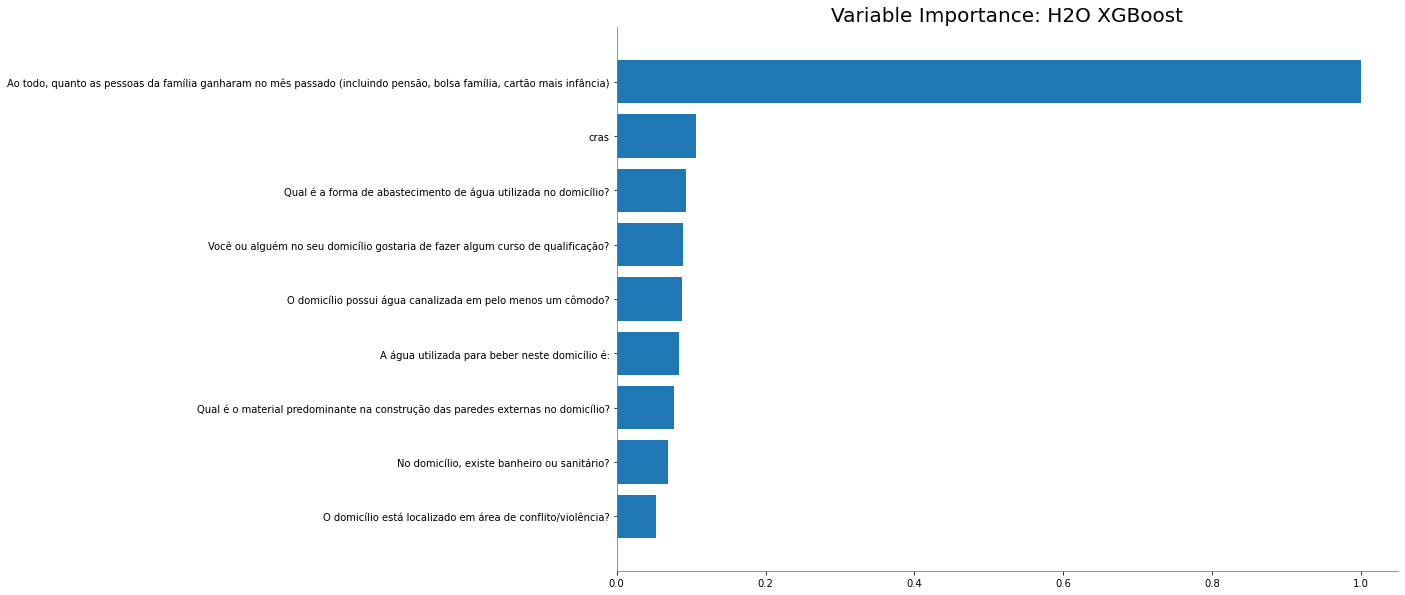

<Figure size 432x288 with 0 Axes>

In [ ]:
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

# Sequencial Feature Selector (SFS)

In [ ]:
SFS_ridge_classifier_forward = [10, 11, 12, 14, 15, 16, 21, 26, 29]
SFS_ridge_classifier_backward = [11, 14, 16, 20, 21, 23, 26, 28, 29]
SFS_logistic_regression_forward = [10, 11, 12, 14, 15, 22, 25, 28, 29]
SFS_logistic_regression_backward = [12, 14, 18, 19, 20, 21, 23, 26, 29]

In [ ]:
df_SFS_ridge_classifier_forward = df[SFS_ridge_classifier_forward]
df_SFS_ridge_classifier_backward = df[SFS_ridge_classifier_backward]
df_SFS_logistic_regression_forward = df[SFS_logistic_regression_forward]
df_SFS_logistic_regression_backward = df[SFS_logistic_regression_backward]

In [ ]:
feature_combinations = {
    'df_SFS_ridge_classifier_forward' : df[SFS_ridge_classifier_forward],
    'df_SFS_ridge_classifier_backward' : df[SFS_ridge_classifier_backward],
    'df_SFS_logistic_regression_forward' : df[SFS_logistic_regression_forward],
    'df_SFS_logistic_regression_backward' : df[SFS_logistic_regression_backward]
}

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFS_ridge_classifier_forward

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    creas    A água utilizada para beber neste domicílio é:    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------  ------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.346535                                                                                 0       0        0                                                 1                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.412541                                                                                 1       1        0                                                 1                                                                                                                                  0  grave
                                                                   0                      0                                                                                                                        0.379538                                                                                 1       0        0                                                 1                                                                                                                                  0  grave
                                                                   0                      0                                                                                                                        0.577558                                                                                 1       0        0                                                 1                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.412541                                                                                 0       0        0                                                 0                                                                                                                                  0  moderada
                                                                   1                      0                                                                                                                        0.330033                                                                                 0       0        0                                                 1                                                                    

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_1_20221116_194946_model_2                    0.72942     1.09176  0.639541  0.409013
GBM_grid_1_AutoML_1_20221116_194946_model_10                   0.731623    1.08181  0.634146  0.402141
GBM_grid_1_AutoML_1_20221116_194946_model_8                    0.732058    1.08935  0.637506  0.406414
DRF_1_AutoML_1_20221116_194946                                 0.733478    1.15482  0.627039  0.393178
GBM_grid_1_AutoML_1_20221116_194946_model_12                   0.733508    1.08042  0.63518   0.403453
XGBoost_grid_1_AutoML_1_20221116_194946_model_3                0.734132    1.08813  0.6207    0.385268
XGBoost_2_AutoML_1_20221116_194946                             0.734898    1.07667  0.619656  0.383973
XGBoost_grid_1_AutoML_1_20221116_194946_model_1                0.7352

### Best Model Updated: df_SFS_ridge_classifier_forward-GBM_grid_1_AutoML_1_20221116_194946_model_2-acc:0.5317170375290601

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SFS_ridge_classifier_forward-GBM_grid_1_AutoML_1_20221116_194946_model_2-acc:0.5317170375290601

### df_SFS_ridge_classifier_forward has accuracy: 0.5317170375290601

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20221116_194946_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    39                 156                         236239                 0            11           5.21795       1             354           115.827

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3933726490702482
RMSE: 0.6271942674086302
LogLoss: 1.0437670233095
Mean Per-Class Error: 0.7049247132068114
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2569     0       6290        19        0.710633  6,309 / 8,878
249      2       1476        7         0.998847  1,732 / 1,734
1923     0       12307       36        0.13732   1,959 / 14,266
283      0       1871        60        0.9729    2,154 / 2,214
5024     2       21944       122       0.44862   12,154 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.55138
2    0.86162
3    0.944006
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.40901257587312806
RMSE: 0.6395409102419705
LogLoss: 1.0917578680329145
Mean Per-Class Error: 0.7294199873203875
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2064     1       6792        21        0.767515  6,814 / 8,878
249      0       1473        12        1         1,734 / 1,734
2267     3       11924       72        0.164167  2,342 / 14,266
278      0       1905        31        0.985998  2,183 / 2,214
4858     4       22094       136       0.482541  13,073 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.517459
2    0.854385
3    0.928835
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.517495  0.00832118  0.521402      0.532472      0.51495       0.509782      0.515319      0.521964      0.520856      0.523071      0.502399      0.512735
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.482505  0.00832118  0.478598      0.467528      0.48505       0.490218      0.484681      0.478036      0.479144      0.476929      0.497601      0.487265
err_count                1307.2    22.4242     1297          1267          1314          1328          1313          1295          1298          1292          1348          132

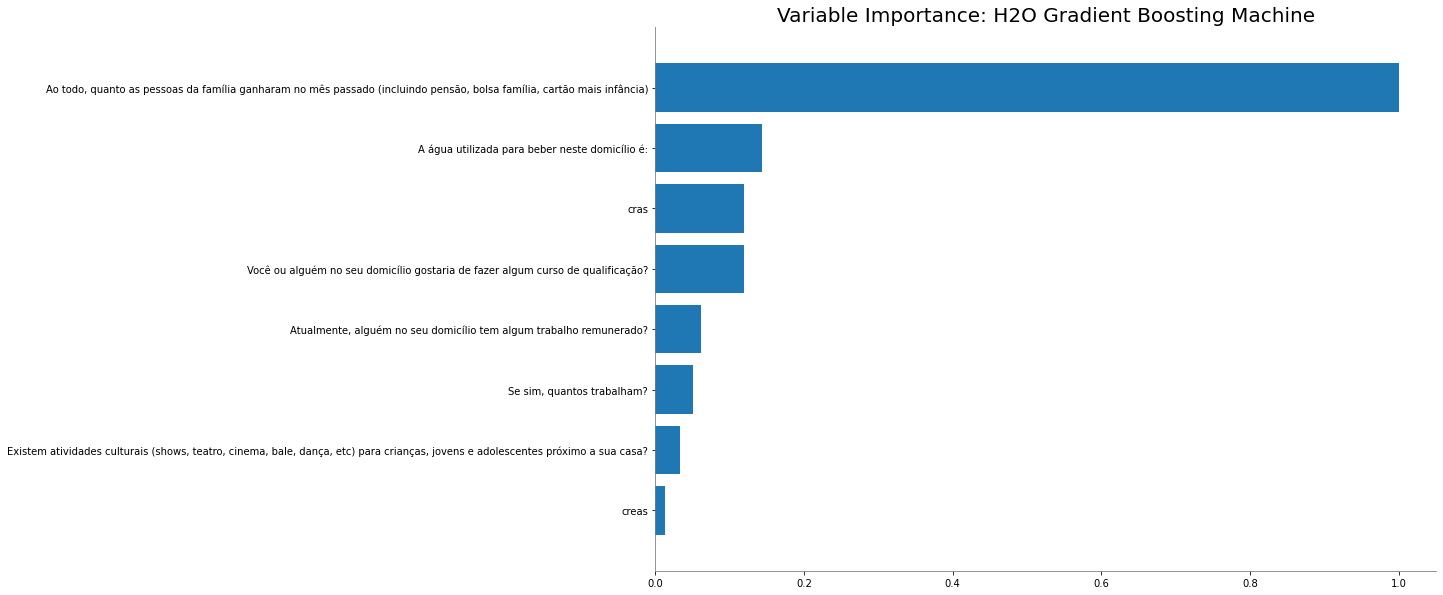

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFS_ridge_classifier_backward

Se sim, quantos trabalham?    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    creas    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    O domicílio está localizado em área de conflito/violência?  ia level
----------------------------  --------------------------------------------------------------------------------  -------  -------------------------------------------------------------  ------------------------------------------------  --------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                    0                                                                                        1        0                                                              0                                                 0                                                                           1                                                                                                                                  0                                                             1  grave
                    0.166667                                                                                 1        0                                                              1                                                 0                                                                           1                                                                                                                                  0                                                             1  grave
                    0                                                                                        0        0                                                              1                                                 1                                                                           0                                                                                                                                  0                                                             1  sem ia
                    0.333333                                                                                 1        0                                                              1                                                 1                                                                           1                                                                                                                                  0                                                             1  sem ia
                    0                                                                                        1        0                                                              1                                                 1                                                                           1                                                                                                                                  0                                                             1  grave
                    0                                                                                        0        0                                                              0                                                 1                                                                           1                                                                                                                         

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_2_20221116_205007_model_1                         0.732993    1.08356  0.63862   0.407835
GBM_grid_1_AutoML_2_20221116_205007_model_2                         0.733219    1.08036  0.636603  0.405263
StackedEnsemble_AllModels_4_AutoML_2_20221116_205007                0.733351    1.06861  0.620424  0.384926
GBM_grid_1_AutoML_2_20221116_205007_model_11                        0.733364    1.06921  0.625801  0.391626
GBM_grid_1_AutoML_2_20221116_205007_model_8                         0.733603    1.07863  0.634652  0.402783
GBM_grid_1_AutoML_2_20221116_205007_model_6                         0.733686    1.06764  0.624215  0.389644
GBM_grid_1_AutoML_2_20221116_205007_model_9                         0.73391     1.06914  0.626049  0.391937
GBM_grid_1_AutoML_2_20221116_

### Best Model Updated: df_SFS_ridge_classifier_backward-GBM_grid_1_AutoML_2_20221116_205007_model_1-acc:0.5350381932912653

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SFS_ridge_classifier_backward-GBM_grid_1_AutoML_2_20221116_205007_model_1-acc:0.5350381932912653

### df_SFS_ridge_classifier_backward has accuracy: 0.5350381932912653

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20221116_205007_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    41                 164                         59548                  0            6            2.67683       1             64            24.0854

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.4039441829351444
RMSE: 0.6355660334970272
LogLoss: 1.0735417828376592
Mean Per-Class Error: 0.7290836133055212
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
1498     0       7377        3         0.831268   7,380 / 8,878
96       2       1635        1         0.998847   1,732 / 1,734
1285     0       12978       3         0.0902846  1,288 / 14,266
103      0       2102        9         0.995935   2,205 / 2,214
2982     2       24092       16        0.465266   12,605 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.534733
2    0.855197
3    0.937731
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.40783523776225267
RMSE: 0.6386197912390851
LogLoss: 1.0835583572700371
Mean Per-Class Error: 0.7329931757075107
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
1453     1       7418        6         0.836337   7,425 / 8,878
100      0       1633        1         1          1,734 / 1,734
1394     0       12863       9         0.0983457  1,403 / 14,266
105      0       2103        6         0.99729    2,208 / 2,214
3052     1       24017       22        0.471357   12,770 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.528643
2    0.85361
3    0.931825
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.528643  0.00877706  0.538007      0.530627      0.538206      0.525655      0.531561      0.521226      0.533038      0.508675      0.526763      0.532669
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.471357  0.00877706  0.461993      0.469373      0.461794      0.474345      0.468439      0.478774      0.466962      0.491325      0.473237      0.467331
err_count                1277      23.7112     1252          1272          1251          1285          1269          1297          1265          1331         

<Figure size 432x288 with 0 Axes>

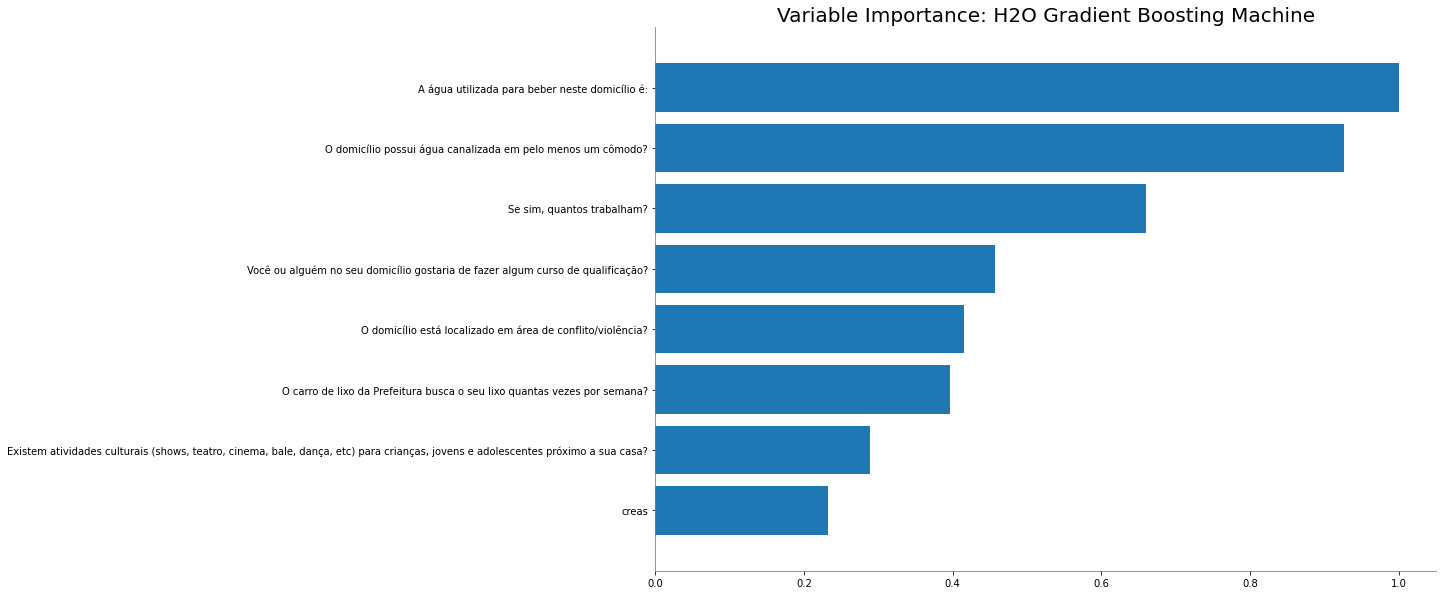

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFS_logistic_regression_forward

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    No domicílio, existe banheiro ou sanitário?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  ---------------------------------------------  ------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.443069                                                                                 0       1                                              1                                                                                                 0                                                             1  moderada
                                                                   0                      0                                                                                                                        0.206271                                                                                 1       0                                              1                                                                                                 1                                                             1  moderada
                                                                   0                      0                                                                                                                        0.412541                                                                                 0       1                                              1                                                                                                 0                                                             1  moderada
                                                                   1                      0.166667                                                                                                                 0.577558                                                                                 1       1                                              1                                                                                                 1                                                             1  moderada
                                                                   0                      0                                                                                                                        0.412541                                                                                 0       0                                              1                                                                                                 0                                                             1  grave
                                                                   0                      0                                                                                                                        0                                                                                        0       0     

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
DRF_1_AutoML_3_20221116_215109                                 0.733809    1.21415  0.629646  0.396454
XGBoost_grid_1_AutoML_3_20221116_215109_model_3                0.737095    1.09264  0.621892  0.38675
XGBoost_2_AutoML_3_20221116_215109                             0.737767    1.07899  0.620562  0.385097
GBM_grid_1_AutoML_3_20221116_215109_model_8                    0.73781     1.09137  0.638942  0.408247
GBM_grid_1_AutoML_3_20221116_215109_model_10                   0.738318    1.0866   0.63744   0.406329
GBM_grid_1_AutoML_3_20221116_215109_model_2                    0.738354    1.09011  0.638154  0.40724
GBM_grid_1_AutoML_3_20221116_215109_model_5                    0.738496    1.07917  0.625631  0.391414
GBM_grid_1_AutoML_3_20221116_215109_model_1                    0.738504

### df_SFS_logistic_regression_forward has accuracy: 0.5048156758551976

### Details of the best model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_3_20221116_215109


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 200                         4.3915e+06             20           20           20            758           2652          1745.3

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.3967115810523515
RMSE: 0.6298504434009327
LogLoss: 1.4684926192520429
Mean Per-Class Error: 0.7356593204288623
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1590     83      7089        116       0.820906  7,288 / 8,878
238      21      1439        36        0.987889  1,713 / 1,734
2002     145     11912       207       0.165008  2,354 / 14,266
280      31      1834        69        0.968835  2,145 / 2,214
4110     280     22274       428       0.498302  13,500 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.501698
2    0.832238
3    0.92651
4    1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.39645359053419627
RMSE: 0.6296456070951312
LogLoss: 1.214151429592018
Mean Per-Class Error: 0.7338093439077633
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1646     93      7015        124       0.814598  7,232 / 8,878
248      27      1424        35        0.984429  1,707 / 1,734
2039     155     11846       226       0.169634  2,420 / 14,266
284      29      1827        74        0.966576  2,140 / 2,214
4217     304     22112       459       0.498265  13,499 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.501735
2    0.831685
3    0.929979
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.501735  0.0110249   0.498155      0.504428      0.507567      0.499077      0.503876      0.499446      0.479144      0.495017      0.508306      0.522333
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.498265  0.0110249   0.501845      0.495572      0.492433      0.500923      0.496124      0.500554      0.520856      0.504983      0.491694      0.477667
err_count                1349.9    29.8718     1360          1343          1334          1357          1344          1356          1411          1368          1332          1294
logloss      

<Figure size 432x288 with 0 Axes>

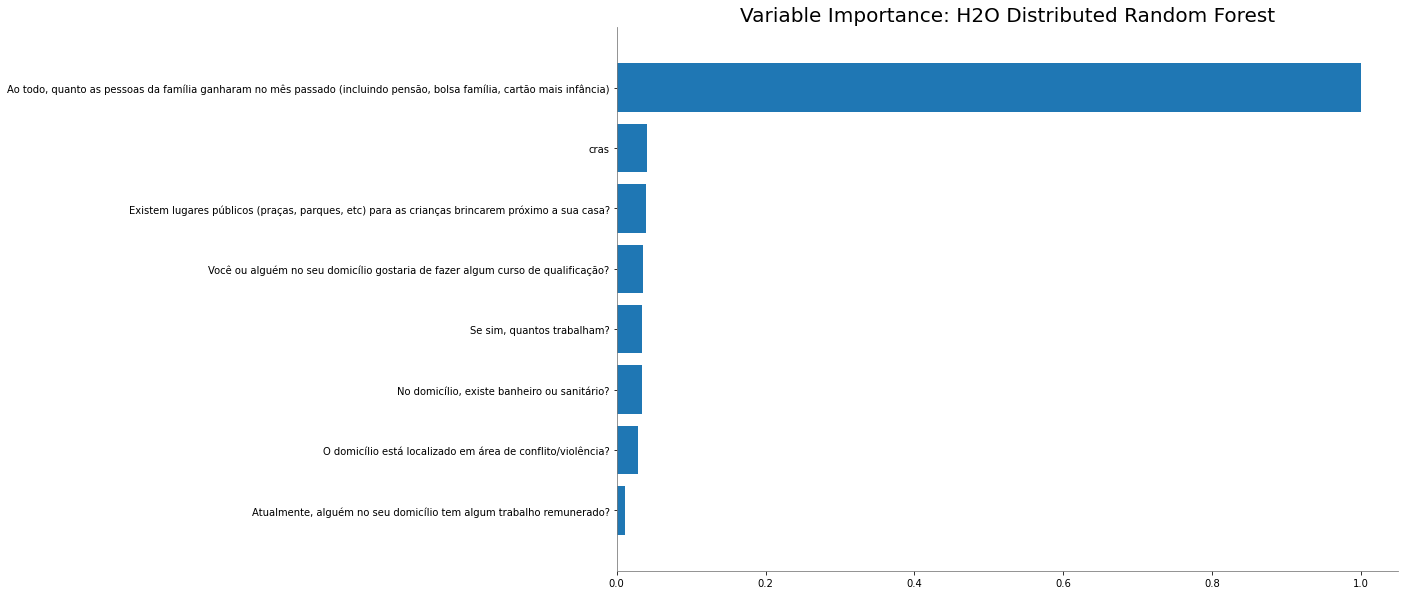

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SFS_logistic_regression_backward

Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?  ia level
-----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  --------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                                                               0.660066                                                                                 1                                                                                  0                                                                  1                                                              1                                                 1                                                                           0                                                                                                                                  0  moderada
                                                                                                               0.412541                                                                                 0                                                                                  1                                                                  1                                                              1                                                 1                                                                           1                                                                                                                                  0  moderada
                                                                                                               0.49505                                                                                  0                                                                                  0                                                                  0                                                              1                                                 1                                                                           1                                                                                                                                  0  sem ia
                                                                                                               0.330033                                                                                 0                                                                                  1                                                                  1                                                              0                                                 1                                                                           0                                                    

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_4_20221116_225133_model_2                     0.726633    1.08544  0.636091  0.404611
XGBoost_grid_1_AutoML_4_20221116_225133_model_3                 0.727467    1.09722  0.621456  0.386208
DRF_1_AutoML_4_20221116_225133                                  0.727538    1.45922  0.633155  0.400885
XGBoost_grid_1_AutoML_4_20221116_225133_model_17                0.727699    1.07176  0.617967  0.381883
XGBoost_grid_1_AutoML_4_20221116_225133_model_7                 0.728053    1.08353  0.619961  0.384351
GBM_grid_1_AutoML_4_20221116_225133_model_8                     0.728127    1.08763  0.635534  0.403903
XGBoost_grid_1_AutoML_4_20221116_225133_model_10                0.728192    1.08114  0.619309  0.383543
XGBoost_1_AutoML_4_20221116_225133                           

### Best Model Updated: df_SFS_logistic_regression_backward-GBM_grid_1_AutoML_4_20221116_225133_model_2-acc:0.5360345400199269

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SFS_logistic_regression_backward-GBM_grid_1_AutoML_4_20221116_225133_model_2-acc:0.5360345400199269

### df_SFS_logistic_regression_backward has accuracy: 0.5360345400199269

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_4_20221116_225133_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 160                         318307                 0            11           5.29375       1             461           153.825

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.37885891741758543
RMSE: 0.615515164246654
LogLoss: 1.012539855921429
Mean Per-Class Error: 0.6933181221527144
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2629     3       6222        24        0.703875  6,249 / 8,878
195      9       1514        16        0.99481   1,725 / 1,734
1546     0       12680       40        0.111173  1,586 / 14,266
217      3       1913        81        0.963415  2,133 / 2,214
4587     15      22329       161       0.431603  11,693 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.568397
2    0.863908
3    0.956223
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.4046112430202329
RMSE: 0.6360905934064996
LogLoss: 1.0854354356910532
Mean Per-Class Error: 0.7266330138882667
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2069     4       6772        33        0.766952  6,809 / 8,878
220      1       1499        14        0.999423  1,733 / 1,734
2170     3       12041       52        0.155965  2,225 / 14,266
236      0       1943        35        0.984192  2,179 / 2,214
4695     8       22255       134       0.477853  12,946 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.522147
2    0.853241
3    0.932748
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.522147  0.00929153  0.524723      0.517343      0.512366      0.518642      0.52787       0.509782      0.531192      0.523071      0.540421      0.516058
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.477853  0.00929153  0.475277      0.482657      0.487634      0.481358      0.47213       0.490218      0.468808      0.476929      0.459579      0.483942
err_count                1294.6    25.1847     1288          1308          1321          1304          1279          1328          1270          1292          1245          

<Figure size 432x288 with 0 Axes>

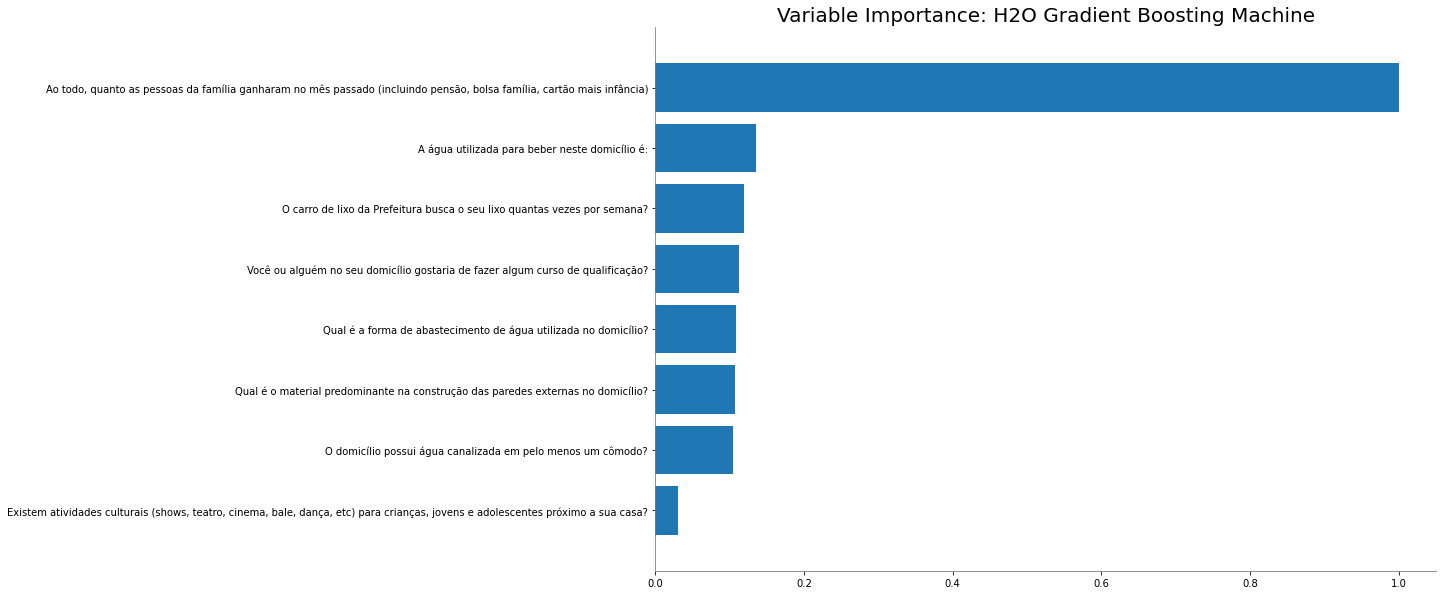

<Figure size 432x288 with 0 Axes>

In [ ]:
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

In [ ]:
y = ['grave']*8878 + ['leve']*1734 + ['moderada']*14266 + ['sem ia']*2214
y_pred = ['grave']*2069 + ['leve']*4 + ['moderada']*6772 + ['sem ia']*33 + ['grave']*220 + ['leve']*1 + ['moderada']*1499 + ['sem ia']*14 + ['grave']*2170 + ['leve']*3 + ['moderada']*12041 + ['sem ia']*52 + ['grave']*236 + ['leve']*0 + ['moderada']*1943 + ['sem ia']*35

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

cm = metrics.confusion_matrix(y, y_pred, labels=['grave', 'leve', 'moderada', 'sem ia'])
print(cm)

print('\nf1_score:', f1_score(y, y_pred, average=None)) 
print('\nrecall_score:', recall_score(y, y_pred, average=None)) 
print('\nprecision_score:', precision_score(y, y_pred, average=None)) 

[[ 2069     4  6772    33]
 [  220     1  1499    14]
 [ 2170     3 12041    52]
 [  236     0  1943    35]]

f1_score: [0.30486996 0.00114811 0.65940144 0.02981261]

recall_score: [2.33047984e-01 5.76701269e-04 8.44034768e-01 1.58084914e-02]

precision_score: [0.44068158 0.125      0.54104696 0.26119403]


# Select K Best

### Chi2

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_1

Qual é o material predominante na construção das paredes externas no domicílio?  ia level
---------------------------------------------------------------------------------  ----------
                                                                                0  moderada
                                                                                0  grave
                                                                                1  grave
                                                                                0  moderada
                                                                                0  grave
                                                                                1  sem ia
                                                                                0  moderada
                                                                                0  moderada
                                                                                1  moderada
                                                                                0  moderada
[27092 rows x 2 columns]

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                       mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_1_20221117_11707_model_7                 0.742739    1.141    0.669071  0.447656
GBM_grid_1_AutoML_1_20221117_11707_model_12                0.742739    1.14166  0.669305  0.447969
GBM_grid_1_AutoML_1_20221117_11707_model_20                0.74282     1.14607  0.671368  0.450735
GBM_grid_1_AutoML_1_20221117_11707_model_10                0.745622    1.13946  0.668544  0.446951
GBM_grid_1_AutoML_1_20221117_11707_model_26                0.745622    1.1431   0.669953  0.448837
GBM_grid_1_AutoML_1_20221117_11707_model_11                0.745622    1.13839  0.667718  0.445847
GBM_grid_1_AutoML_1_20221117_11707_model_8                 0.745622    1.1431   0.669953  0.448837
GBM_grid_1_AutoML_1_20221117_11707_model_16                0.745622    1.13812  0.667663  0.445774
GB

### Best Model Updated: df_SKBest_1-GBM_grid_1_AutoML_1_20221117_11707_model_7-acc:0.5264031883095317

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_1-GBM_grid_1_AutoML_1_20221117_11707_model_7-acc:0.5264031883095317

### df_SKBest_1 has accuracy: 0.5264031883095317

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20221117_11707_model_7


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 160                         12399                  0            1            0.3125        1             2             1.3125

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.4434359762193652
RMSE: 0.6659098859600788
LogLoss: 1.1340853470202865
Mean Per-Class Error: 0.75
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
0        0       8878        0         1         8,878 / 8,878
0        0       1734        0         1         1,734 / 1,734
0        0       14266       0         0         0 / 14,266
0        0       2214        0         1         2,214 / 2,214
0        0       27092       0         0.473424  12,826 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.526576
2    0.854274
3    0.918278
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.4476556675600697
RMSE: 0.6690707492934284
LogLoss: 1.1410021431686723
Mean Per-Class Error: 0.7427386676921202
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1561     0       7317        0         0.824172  7,317 / 8,878
197      0       1537        0         1         1,734 / 1,734
2094     0       12172       0         0.146783  2,094 / 14,266
246      0       1968        0         1         2,214 / 2,214
4098     0       22994       0         0.493098  13,359 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.506902
2    0.854274
3    0.918278
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.506902  0.0168528   0.516974      0.512177      0.483204      0.531192      0.49797       0.500185      0.49354       0.492433      0.534515      0.506829
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.493098  0.0168528   0.483026      0.487823      0.516796      0.468808      0.50203       0.499815      0.50646       0.507567      0.465485      0.493171
err_count                1335.9    45.6057     1309          1322          1400          1270          1360          1354          1372          1375          1261          1336
logloss       

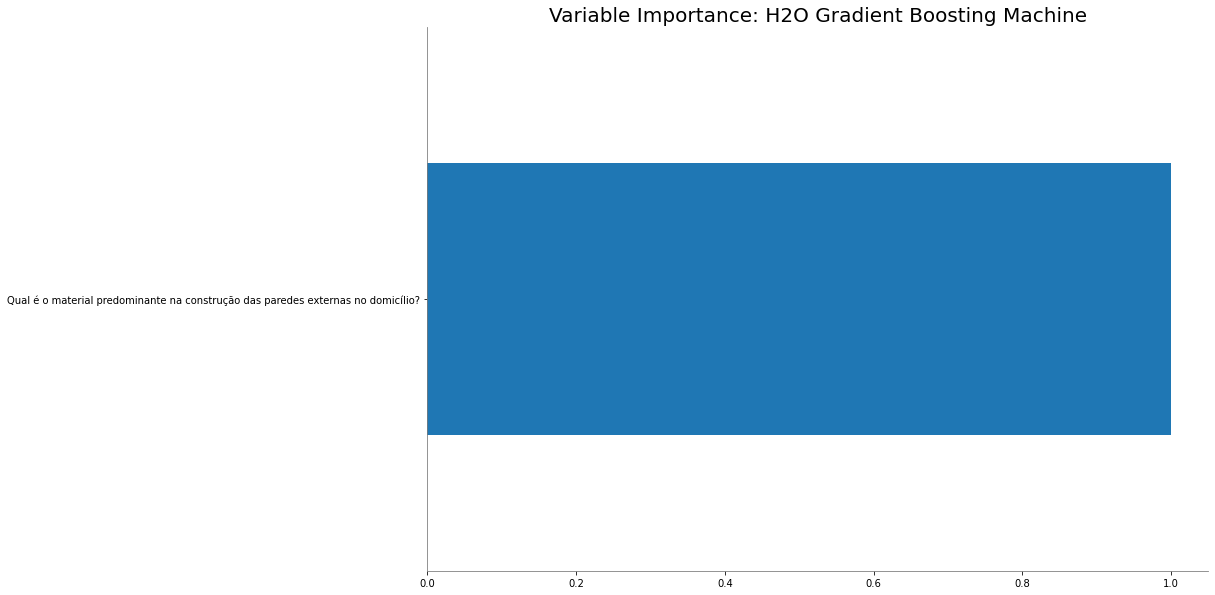

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_2

Qual é o material predominante na construção das paredes externas no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?  ia level
---------------------------------------------------------------------------------  -------------------------------------------------------------  ----------
                                                                                0                                                              1  grave
                                                                                0                                                              0  grave
                                                                                0                                                              1  leve
                                                                                1                                                              1  sem ia
                                                                                0                                                              1  moderada
                                                                                0                                                              0  grave
                                                                                0                                                              1  moderada
                                                                                0                                                              1  moderada
                                                                                0                                                              1  moderada
                                                                                0                                                              0  moderada
[27092 rows x 3 columns]

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                               mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_2_20221117_21838_model_12                        0.737757    1.10041  0.648551  0.420618
GBM_grid_1_AutoML_2_20221117_21838_model_1                         0.737757    1.10868  0.653265  0.426755
GBM_grid_1_AutoML_2_20221117_21838_model_10                        0.737757    1.10665  0.65229   0.425482
GBM_grid_1_AutoML_2_20221117_21838_model_2                         0.737757    1.09887  0.647578  0.419358
GBM_grid_1_AutoML_2_20221117_21838_model_8                         0.737757    1.0962   0.645109  0.416165
GBM_grid_1_AutoML_2_20221117_21838_model_7                         0.742161    1.07968  0.632065  0.399506
StackedEnsemble_AllModels_4_AutoML_2_20221117_21838                0.742225    1.0754   0.622909  0.388016
DeepLearning_grid_3_AutoML_2_20221117

### df_SKBest_2 has accuracy: 0.5154433742942544

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20221117_21838_model_12


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 160                         13551                  0            2            0.7375        1             4             1.9125

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.42116721432556425
RMSE: 0.6489739704530254
LogLoss: 1.1007208912255462
Mean Per-Class Error: 0.7377569517436653
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
1311     0       7567        0         0.852332   7,567 / 8,878
113      0       1621        0         1          1,734 / 1,734
1408     0       12858       0         0.0986962  1,408 / 14,266
124      0       2090        0         1          2,214 / 2,214
2956     0       24136       0         0.477004   12,923 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.522996
2    0.854274
3    0.931677
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.420617811277382
RMSE: 0.648550546432105
LogLoss: 1.1004140850023805
Mean Per-Class Error: 0.7377569517436653
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
1311     0       7567        0         0.852332   7,567 / 8,878
113      0       1621        0         1          1,734 / 1,734
1408     0       12858       0         0.0986962  1,408 / 14,266
124      0       2090        0         1          2,214 / 2,214
2956     0       24136       0         0.477004   12,923 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.522996
2    0.854274
3    0.928761
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.522996  0.00578929  0.519188      0.528413      0.524179      0.5323        0.519011      0.524917      0.521595      0.511628      0.521595      0.527132
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.477004  0.00578929  0.480812      0.471587      0.475821      0.4677        0.480989      0.475083      0.478405      0.488372      0.478405      0.472868
err_count                1292.3    15.6706     1303          1278          1289          1267          1303          1287          1296          1323          1

<Figure size 432x288 with 0 Axes>

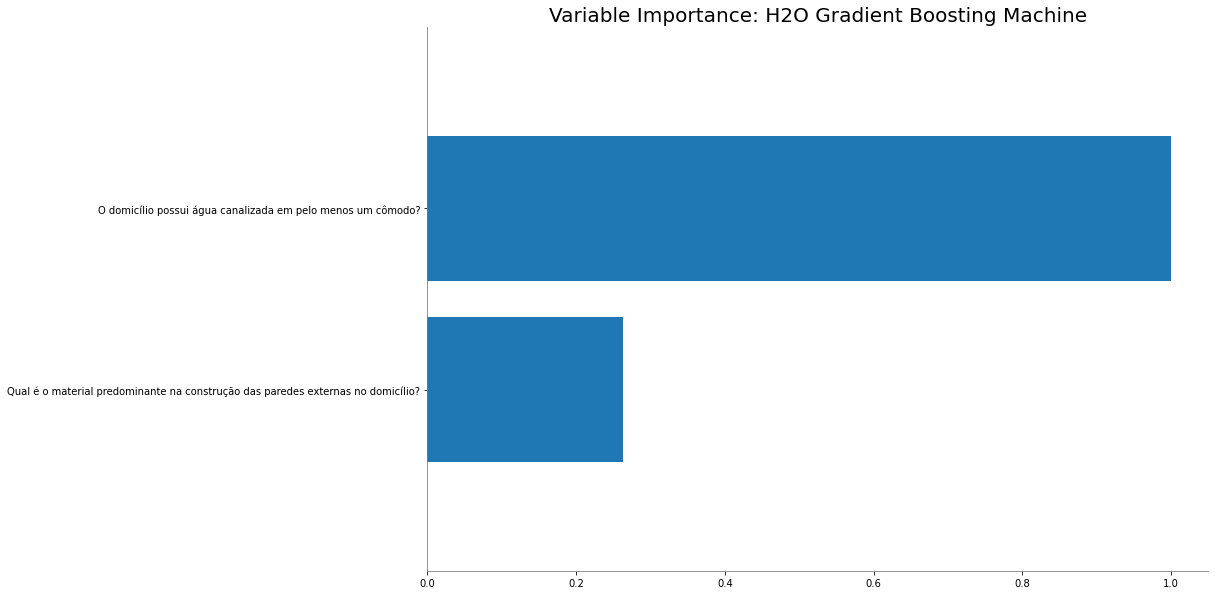

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_3

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Qual é o material predominante na construção das paredes externas no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?  ia level
--------------------------------------------------------------------  ---------------------------------------------------------------------------------  -------------------------------------------------------------  ----------
                                                                   0                                                                                  0                                                              1  moderada
                                                                   0                                                                                  1                                                              0  moderada
                                                                   0                                                                                  0                                                              1  moderada
                                                                   0                                                                                  0                                                              1  moderada
                                                                   0                                                                                  1                                                              1  moderada
                                                                   0                                                                                  1                                                              1  moderada
                                                                   0                                                                                  0                                                              0  sem ia
                                                                   0                                                                                  1                                                              0  grave
                                                                   0                                                                                  0                                                              1  grave
                                                                   0                                                                                  1                                                              0  moderada
[27092 rows x 4 columns]

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                               mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_3_20221117_31923_model_2                         0.738112    1.09773  0.647129  0.418776
GBM_grid_1_AutoML_3_20221117_31923_model_8                         0.738307    1.09123  0.641309  0.411277
GBM_grid_1_AutoML_3_20221117_31923_model_1                         0.738307    1.0925   0.643898  0.414604
GBM_grid_1_AutoML_3_20221117_31923_model_12                        0.738527    1.09567  0.646135  0.417491
GBM_grid_1_AutoML_3_20221117_31923_model_6                         0.738672    1.08099  0.633868  0.401789
GBM_grid_1_AutoML_3_20221117_31923_model_11                        0.738747    1.08029  0.633064  0.40077
GBM_grid_1_AutoML_3_20221117_31923_model_10                        0.738871    1.0949   0.645436  0.416587
GBM_grid_1_AutoML_3_20221117_31923_mod

### df_SKBest_3 has accuracy: 0.5184324144802391

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20221117_31923_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 160                         15788                  0            3            1.18125       1             8             3.03125

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.4182740691870836
RMSE: 0.6467411145018411
LogLoss: 1.0967014599057017
Mean Per-Class Error: 0.7378402222099614
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
1318     0       7560        0         0.851543   7,560 / 8,878
113      0       1621        0         1          1,734 / 1,734
1424     0       12842       0         0.0998177  1,424 / 14,266
120      0       2094        0         1          2,214 / 2,214
2975     0       24117       0         0.477336   12,932 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.522664
2    0.854274
3    0.922597
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.4187764867405687
RMSE: 0.6471294203948456
LogLoss: 1.0977292414124076
Mean Per-Class Error: 0.7381123898716205
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
1299     0       7579        0         0.853683   7,579 / 8,878
112      0       1622        0         1          1,734 / 1,734
1409     0       12857       0         0.0987663  1,409 / 14,266
114      0       2100        0         1          2,214 / 2,214
2934     0       24158       0         0.477484   12,936 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.522516
2    0.854274
3    0.927912
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.522516  0.0043432   0.526568      0.526199      0.51938       0.524548      0.528239      0.514212      0.519011      0.521964      0.520118      0.524917
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.477484  0.0043432   0.473432      0.473801      0.48062       0.475452      0.471761      0.485788      0.480989      0.478036      0.479882      0.475083
err_count                1293.6    11.6733     1283          1284          1302          1288          1278          1316          1303          1295          

<Figure size 432x288 with 0 Axes>

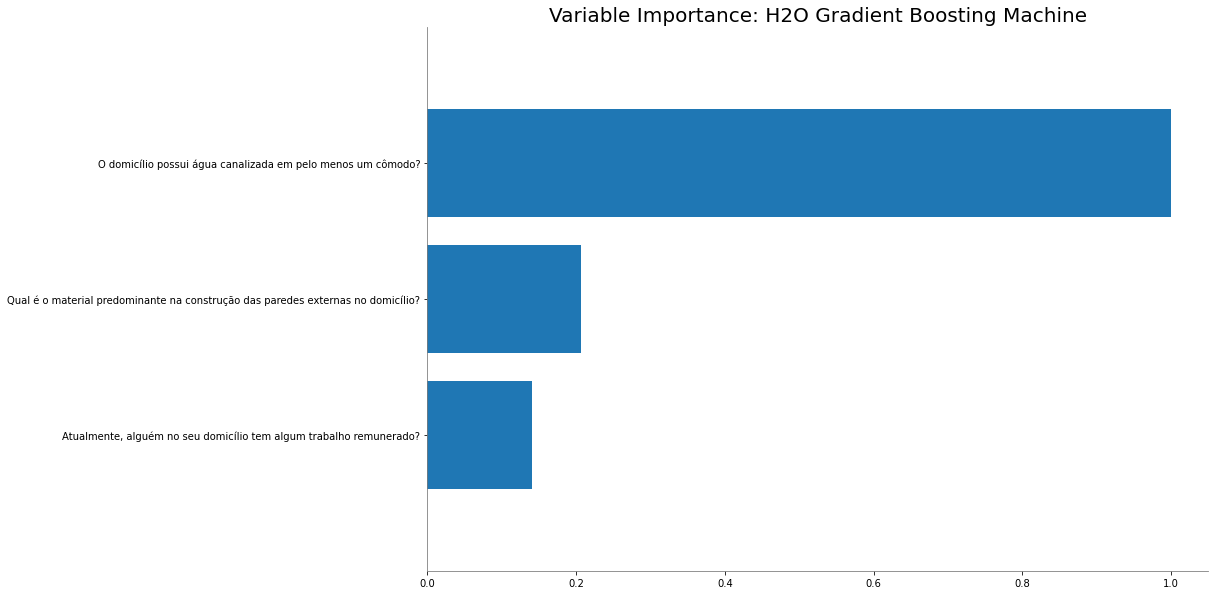

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_4

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Qual é o material predominante na construção das paredes externas no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:  ia level
--------------------------------------------------------------------  ---------------------------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ----------
                                                                   0                                                                                  1                                                              1                                                 1  moderada
                                                                   0                                                                                  1                                                              1                                                 1  moderada
                                                                   0                                                                                  0                                                              1                                                 0  moderada
                                                                   0                                                                                  0                                                              1                                                 1  moderada
                                                                   0                                                                                  0                                                              1                                                 1  moderada
                                                                   0                                                                                  1                                                              1                                                 1  grave
                                                                   0                                                                                  0                                                              1                                                 1  sem ia
                                                                   0                                                                                  0                                                              1                                                 1  sem ia
                                                                   0                                                                                  0                                                              0                                                 1  moderada
                                                                   0                                                                                  1                                                              0                                                 1  moderada
[27092 rows x 5 columns]

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                               mean_per_class_error    logloss      rmse       mse
StackedEnsemble_AllModels_4_AutoML_4_20221117_41953                0.734415    1.07076  0.621208  0.385899
DeepLearning_grid_1_AutoML_4_20221117_41953_model_3                0.734538    1.08336  0.613975  0.376966
GBM_grid_1_AutoML_4_20221117_41953_model_10                        0.734547    1.08178  0.636996  0.405764
GBM_grid_1_AutoML_4_20221117_41953_model_2                         0.735002    1.08318  0.638469  0.407642
DeepLearning_grid_2_AutoML_4_20221117_41953_model_2                0.735069    1.09224  0.614739  0.377904
GBM_grid_1_AutoML_4_20221117_41953_model_8                         0.735109    1.08104  0.636096  0.404618
GBM_grid_1_AutoML_4_20221117_41953_model_12                        0.735166    1.08326  0.638316  0.407447
GBM_grid_1_AutoML_4_20221117_41953_mo

### df_SKBest_4 has accuracy: 0.5187645300564596

### Details of the best model

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_4_AutoML_4_20221117_41953

No summary for this model

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.38952368556818767
RMSE: 0.6241183265761291
LogLoss: 1.07362922468112
Null degrees of freedom: 10018
Residual degrees of freedom: 9868
Null deviance: 21662.11977165267
Residual deviance: 21513.382404160286
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  --------------
607      0       2689        0         0.815837  2,689 / 3,296
54       0       582         0         1         636 / 636
663      0       4618        0         0.125544  663 / 5,281
62       0       744         0         1         806 / 806
1386     0       8633        0         0.478491  4,794 / 10,019

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.521509
2    0.856073
3    0.936121
4    1

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.38589929501091397
RMSE: 0.6212079321860869
LogLoss: 1.0707590643457878
Null degrees of freedom: 27091
Residual degrees of freedom: 26957
Null deviance: 58735.669960018975
Residual deviance: 58018.009142512165
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
1439     0       7439        0         0.837914   7,439 / 8,878
94       0       1640        0         1          1,734 / 1,734
1423     0       12843       0         0.0997477  1,423 / 14,266
112      0       2102        0         1          2,214 / 2,214
3068     0       24024       0         0.472833   12,810 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.527167
2    0.854274
3    0.936254
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.52718   0.00779465  0.528966      0.522814      0.533382      0.519349      0.544555      0.52          0.520734      0.523133      0.528153      0.53071
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.47282   0.00779465  0.471034      0.477186      0.466618      0.480651      0.455446      0.48          0.479266      0.476867      0.471847      0.46929
err_count                1281      32.4585     1244          1255          1272          1329          1242          1320          1306          1309          1257          1276
logloss                  1.07076   0.012166    1.06676       1.07335       1.0674        1.08381       1.0466        1.07756       1.08665       1.06153       1.08085       1.06309
max_per_class_error      1         0           1    

Variable importance plot is not available for this type of model (stackedensemble).
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_5

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Qual é o material predominante na construção das paredes externas no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?  ia level
--------------------------------------------------------------------  ---------------------------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ------------------------------------------------------------------------------------------------  ----------
                                                                   0                                                                                  0                                                              0                                                 1                                                                                                 0  moderada
                                                                   0                                                                                  0                                                              0                                                 0                                                                                                 0  grave
                                                                   1                                                                                  0                                                              1                                                 1                                                                                                 0  moderada
                                                                   0                                                                                  1                                                              0                                                 1                                                                                                 0  grave
                                                                   0                                                                                  0                                                              0                                                 0                                                                                                 1  grave
                                                                   0                                                                                  0                                                              1                                                 1                                                                                                 1  leve
                                                                   0                                                                                  0                                                              1                                                 1                                                                                                 0  moderada
                                                                   0                                                                                  0                                                              1                                                 1                                                                                                 0  moderada
                                                                   0                                                                                  0                                                              1                                                 1                   

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                               mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_5_20221117_52021_model_4                         0.733258    1.0741   0.629688  0.396507
GBM_grid_1_AutoML_5_20221117_52021_model_2                         0.734172    1.08251  0.63827   0.407389
GBM_grid_1_AutoML_5_20221117_52021_model_8                         0.734201    1.0778   0.633953  0.401897
GBM_grid_1_AutoML_5_20221117_52021_model_10                        0.734309    1.08292  0.638573  0.407775
GBM_grid_1_AutoML_5_20221117_52021_model_1                         0.734467    1.08386  0.639384  0.408812
GBM_grid_1_AutoML_5_20221117_52021_model_11                        0.734939    1.07186  0.627614  0.393899
GBM_grid_1_AutoML_5_20221117_52021_model_12                        0.735009    1.07993  0.636317  0.4049
GBM_grid_1_AutoML_5_20221117_52021_mode

### df_SKBest_5 has accuracy: 0.5190966456326802

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_5_20221117_52021_model_4


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    57                 228                         23121                  0            3            1.38596       1             8             3.27193

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3952355065521228
RMSE: 0.6286775855334138
LogLoss: 1.0721664342822579
Mean Per-Class Error: 0.7332583213539348
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
1472     0       7406        0         0.834197   7,406 / 8,878
79       0       1655        0         1          1,734 / 1,734
1410     0       12856       0         0.0988364  1,410 / 14,266
123      0       2091        0         1          2,214 / 2,214
3084     0       24008       0         0.471135   12,764 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.528865
2    0.854274
3    0.936513
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.39650719313411126
RMSE: 0.6296881713468272
LogLoss: 1.074096546633981
Mean Per-Class Error: 0.7332583213539348
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
1472     0       7406        0         0.834197   7,406 / 8,878
79       0       1655        0         1          1,734 / 1,734
1410     0       12856       0         0.0988364  1,410 / 14,266
123      0       2091        0         1          2,214 / 2,214
3084     0       24008       0         0.471135   12,764 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.528865
2    0.854274
3    0.934815
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.528865  0.0090423   0.530996      0.528413      0.518272      0.531931      0.534145      0.537468      0.541897      0.517165      0.533038      0.515319
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.471135  0.0090423   0.469004      0.471587      0.481728      0.468069      0.465855      0.462532      0.458103      0.482835      0.466962      0.484681
err_count                1276.4    24.4867     1271          1278          1305          1268          1262          1253          1241          1308          

<Figure size 432x288 with 0 Axes>

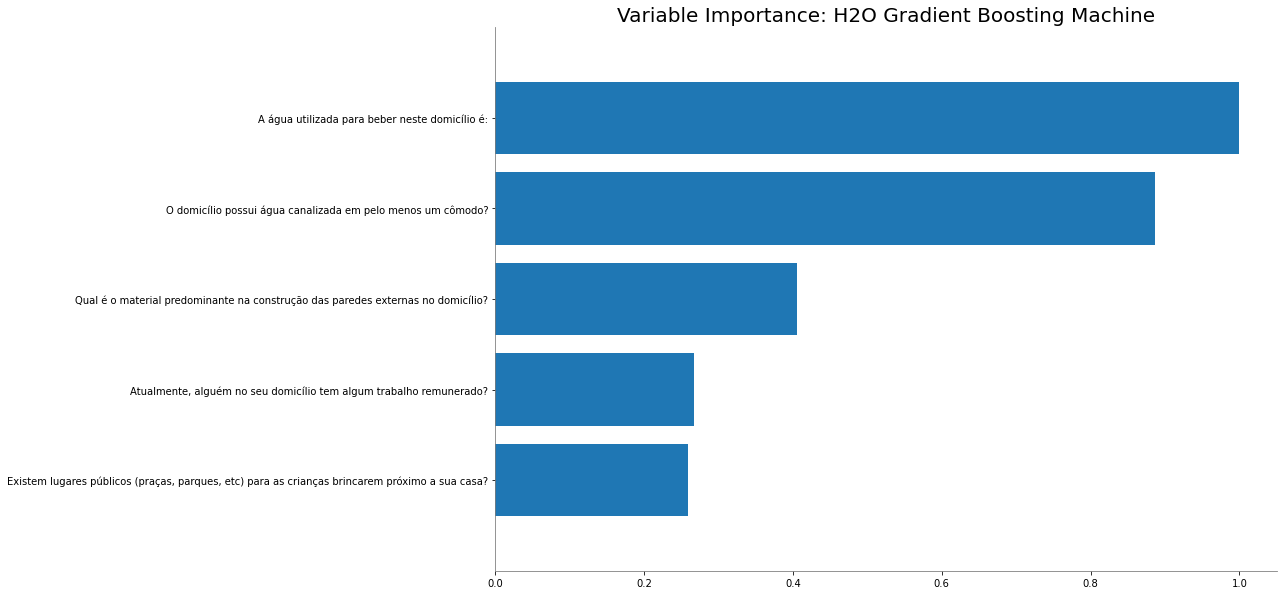

<Figure size 432x288 with 0 Axes>

In [ ]:
SKBest_1 = [18, 29]
SKBest_2 = [18, 20, 29]
SKBest_3 = [10, 18, 20, 29]
SKBest_4 = [10, 18, 20, 21, 29]
SKBest_5 = [10, 18, 20, 21, 25, 29]

df_SKBest_1 = df[SKBest_1]
df_SKBest_2 = df[SKBest_2]
df_SKBest_3 = df[SKBest_3]
df_SKBest_4 = df[SKBest_4]
df_SKBest_5 = df[SKBest_5]

feature_combinations = {
    'df_SKBest_1' : df[SKBest_1],
    'df_SKBest_2' : df[SKBest_2],
    'df_SKBest_3' : df[SKBest_3],
    'df_SKBest_4' : df[SKBest_4],
    'df_SKBest_5' : df[SKBest_5]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

In [ ]:
SKBest_6 = [10, 18, 20, 21, 25, 27, 29]
SKBest_7 = [10, 18, 20, 21, 22, 25, 27, 29]
SKBest_8 = [10, 18, 19, 20, 21, 22, 25, 27, 29]
SKBest_9 = [10, 14, 18, 19, 20, 21, 22, 25, 27, 29]
SKBest_10 = [10, 14, 15, 18, 19, 20, 21, 22, 25, 27, 29]

df_SKBest_6 = df[SKBest_6]
df_SKBest_7 = df[SKBest_7]
df_SKBest_8 = df[SKBest_8]
df_SKBest_9 = df[SKBest_9]
df_SKBest_10 = df[SKBest_10]

feature_combinations = {
    'df_SKBest_6' : df[SKBest_6],
    'df_SKBest_7' : df[SKBest_7],
    'df_SKBest_8' : df[SKBest_8],
    'df_SKBest_9' : df[SKBest_9],
    'df_SKBest_10' : df[SKBest_10]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_6

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Qual é o material predominante na construção das paredes externas no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?  ia level
--------------------------------------------------------------------  ---------------------------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   1                                                                                  0                                                              1                                                 1                                                                                                 1                                                                                                                                                                               1  moderada
                                                                   0                                                                                  1                                                              1                                                 1                                                                                                 0                                                                                                                                                                               0  sem ia
                                                                   0                                                                                  1                                                              1                                                 1                                                                                                 0                                                                                                                                                                               0  moderada
                                                                   0                                                                                  0                                                              1                                                 1                                                                                                 0                                                                                                                                                                               0  grave
                                                                   1                                                                                  0                                                              0                                                 1                                                                                                 0                                                                                                                                                                               0  moderada
                                                                   1                                                                                  1           

AutoML progress: |██████████████████████████████████████████████████████████████

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_11

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?  ia level
--------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   0                                                                                 1       0                                                                                  0                                                                  0                                                              1                                                 1                                              1                                                                           1                                                                                                 0                                                                                                                                                                               0  leve
                                                                   1                                                                                 1       1                                                                                  0                                                                  1                                                              1                                                 0                                              1                                                                           1                                                                                                 0                                                                                                                                                                               0  grave
                                                                   0                                                                                 1       0                                                                                  0                                                                  1                                                              1                                                 1                                              1                                                                           1                                                                                                 1                                                 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                   mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_1_20221122_181940_model_10                           0.725249    1.08178  0.636995  0.405763
GBM_grid_1_AutoML_1_20221122_181940_model_12                           0.725649    1.07501  0.634864  0.403052
GBM_grid_1_AutoML_1_20221122_181940_model_1                            0.726626    1.07203  0.632184  0.399657
GBM_grid_1_AutoML_1_20221122_181940_model_2                            0.727375    1.08321  0.635838  0.40429
StackedEnsemble_AllModels_4_AutoML_1_20221122_181940                   0.728053    1.06144  0.618252  0.382235
StackedEnsemble_BestOfFamily_5_AutoML_1_20221122_181940                0.728287    1.06097  0.618307  0.382303
GBM_grid_1_AutoML_1_20221122_181940_model_9                            0.728708    1.06334  0.624464  0.389955
DRF_1_

### Best Model Updated: df_SKBest_11-GBM_grid_1_AutoML_1_20221122_181940_model_10-acc:0.5277316506144138

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_11-GBM_grid_1_AutoML_1_20221122_181940_model_10-acc:0.5277316506144138

### df_SKBest_11 has accuracy: 0.5277316506144138

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20221122_181940_model_10


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 160                         232305                 0            11           4.98125       1             316           110.763

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.39381873699319847
RMSE: 0.6275497884576159
LogLoss: 1.0479307372249047
Mean Per-Class Error: 0.7110313772320325
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2557     0       6316        5         0.711985  6,321 / 8,878
213      0       1517        4         1         1,734 / 1,734
1948     0       12310       8         0.137109  1,956 / 14,266
215      0       1988        11        0.995032  2,203 / 2,214
4933     0       22131       28        0.450834  12,214 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.549166
2    0.857707
3    0.945962
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.40576262012329445
RMSE: 0.6369949922277995
LogLoss: 1.0817846128220596
Mean Per-Class Error: 0.7252492572971416
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2334     0       6540        4         0.737103  6,544 / 8,878
224      0       1506        4         1         1,734 / 1,734
2346     0       11915       5         0.164797  2,351 / 14,266
229      0       1983        2         0.999097  2,212 / 2,214
5133     0       21944       15        0.473978  12,841 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.526022
2    0.855086
3    0.928023
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.526023  0.00938409  0.522878      0.522878      0.539683      0.511997      0.530454      0.532669      0.523071      0.518272      0.540052      0.518272
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.473977  0.00938409  0.477122      0.477122      0.460317      0.488003      0.469546      0.467331      0.476929      0.481728      0.459948      0.481728
err_count                1284.1    25.4578     1293          1293          1247          1322          1272          1266          1292          1305          1246      

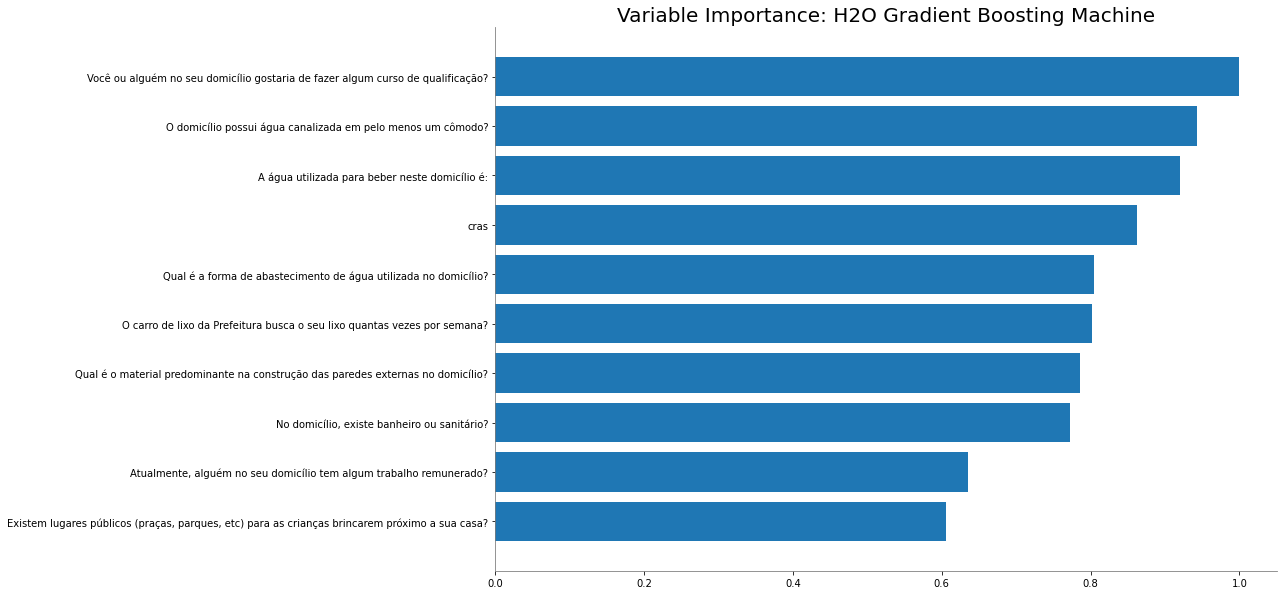

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_12

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?  ia level
--------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   0                                                                                 0       0                                0                                                                                  0                                                                  0                                                              1                                                 1                                              1                                                                           1                                                                                                 0                                                                                                                                                                               0  moderada
                                                                   1                                                                                 0       1                                1                                                                                  0                                                                  0                                                              0                                                 1                                              1                                                                           1                                                                                                 0                                                                                                                                                                               0  moderada
                                                                   0                                                                                 0       0                                0                                                                                  0                                                                  1                                                              1                                                 0                                              1                                                   

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_2_20221122_192040_model_10                   0.722967    1.08367  0.638226  0.407332
GBM_grid_1_AutoML_2_20221122_192040_model_2                    0.725582    1.08665  0.637055  0.405839
GBM_grid_1_AutoML_2_20221122_192040_model_12                   0.726264    1.07314  0.633854  0.401771
GBM_grid_1_AutoML_2_20221122_192040_model_1                    0.726735    1.07099  0.631729  0.399082
GBM_grid_1_AutoML_2_20221122_192040_model_8                    0.727674    1.08888  0.635516  0.40388
GBM_grid_1_AutoML_2_20221122_192040_model_4                    0.727953    1.0646   0.625903  0.391755
GBM_grid_1_AutoML_2_20221122_192040_model_5                    0.728177    1.08174  0.625612  0.39139
GBM_grid_1_AutoML_2_20221122_192040_model_9                    0.728204

### Best Model Updated: df_SKBest_12-GBM_grid_1_AutoML_2_20221122_192040_model_10-acc:0.5340418465626038

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_12-GBM_grid_1_AutoML_2_20221122_192040_model_10-acc:0.5340418465626038

### df_SKBest_12 has accuracy: 0.5340418465626038

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20221122_192040_model_10


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    45                 180                         305926                 0            12           4.78889       1             414           130.539

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.39297594604505454
RMSE: 0.6268779355225821
LogLoss: 1.0407588752240309
Mean Per-Class Error: 0.7035030927541585
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2956     0       5921        1         0.667042  5,922 / 8,878
243      0       1485        6         1         1,734 / 1,734
2168     0       12092       6         0.15239   2,174 / 14,266
267      0       1935        12        0.99458   2,202 / 2,214
5634     0       21433       25        0.444116  12,032 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.555884
2    0.85863
3    0.952495
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.40733185926326665
RMSE: 0.6382255551631152
LogLoss: 1.0836656467664316
Mean Per-Class Error: 0.7229668231804746
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2618     0       6258        2         0.705114  6,260 / 8,878
271      0       1457        6         1         1,734 / 1,734
2676     2       11576       12        0.18856   2,690 / 14,266
297      2       1911        4         0.998193  2,210 / 2,214
5862     4       21202       24        0.475934  12,894 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.524066
2    0.854237
3    0.932932
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.524067  0.0129515   0.510332      0.517712      0.497231      0.535253      0.533038      0.5323        0.540052      0.529347      0.522702      0.522702
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.475933  0.0129515   0.489668      0.482288      0.502769      0.464747      0.466962      0.4677        0.459948      0.470653      0.477298      0.477298
err_count                1289.4    35.1701     1327          1307          1362          1259          1265          1267          1246          1275          1293       

<Figure size 432x288 with 0 Axes>

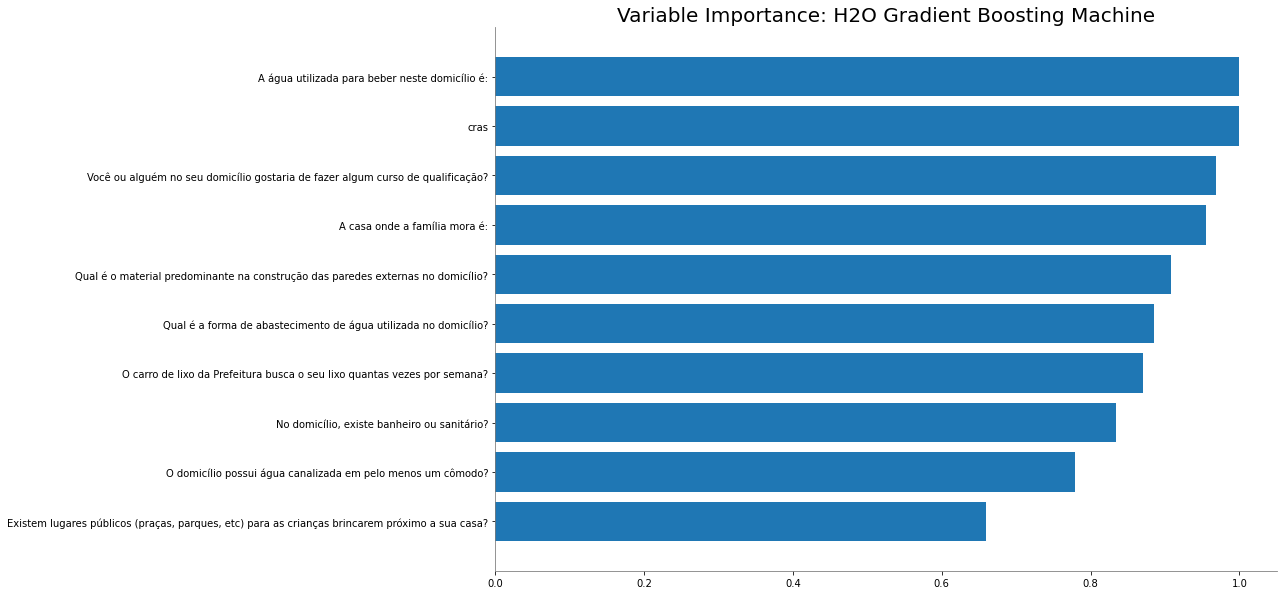

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_13

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?  ia level
--------------------------------------------------------------------  ----------------------------  --------------------------------------------------------------------------------  ------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   1                      0.166667                                                                                 0       0                                1                                                                                  0                                                                  0                                                              1                                                 0                                              1                                                                           1                                                                                                 1                                                                                                                                                                               0  moderada
                                                                   0                      0                                                                                        0       0                                1                                                                                  0                                                                  1                                                              1                                                 1                                              1                                                                           1                                                                                                 0                                                                                                                                                                               0  moderada
                                                                   0                      0                                                                                        1       1                                1                                                                                  1                                                                  0                                                             

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_3_20221122_202106_model_10                    0.722266    1.0819   0.637108  0.405907
GBM_grid_1_AutoML_3_20221122_202106_model_2                     0.723289    1.08241  0.634703  0.402848
GBM_grid_1_AutoML_3_20221122_202106_model_8                     0.723705    1.08556  0.634783  0.40295
GBM_grid_1_AutoML_3_20221122_202106_model_9                     0.725766    1.06685  0.628455  0.394955
GBM_grid_1_AutoML_3_20221122_202106_model_12                    0.725953    1.07054  0.631979  0.399398
XGBoost_2_AutoML_3_20221122_202106                              0.726655    1.07588  0.61804   0.381974
XGBoost_grid_1_AutoML_3_20221122_202106_model_9                 0.726773    1.07238  0.617431  0.381221
XGBoost_grid_1_AutoML_3_20221122_202106_model_11              

### df_SKBest_13 has accuracy: 0.5307206908003985

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20221122_202106_model_10


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    42                 168                         306299                 0            13           5.21429       1             416           140.417

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.39453024240606716
RMSE: 0.6281164242447949
LogLoss: 1.042658615629255
Mean Per-Class Error: 0.7028513630532888
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
3029     0       5849        0         0.65882   5,849 / 8,878
235      0       1496        3         1         1,734 / 1,734
2264     0       11999       3         0.158909  2,267 / 14,266
280      0       1920        14        0.993677  2,200 / 2,214
5808     0       21264       20        0.444781  12,050 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.555219
2    0.858962
3    0.949764
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.40590682958558943
RMSE: 0.6371081773024024
LogLoss: 1.081902562121088
Mean Per-Class Error: 0.7222658666083274
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2551     0       6326        1         0.712661  6,327 / 8,878
233      0       1497        4         1         1,734 / 1,734
2571     0       11685       10        0.18092   2,581 / 14,266
277      1       1926        10        0.995483  2,204 / 2,214
5632     1       21434       25        0.474162  12,846 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.525838
2    0.853721
3    0.932009
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.525838  0.010763    0.519926      0.521402      0.526024      0.500554      0.533776      0.532669      0.524179      0.539313      0.533038      0.527501
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.474162  0.010763    0.480074      0.478598      0.473976      0.499446      0.466224      0.467331      0.475821      0.460687      0.466962      0.472499
err_count                1284.6    29.2088     1301          1297          1284          1353          1263          1266          1289          1248          1265        

<Figure size 432x288 with 0 Axes>

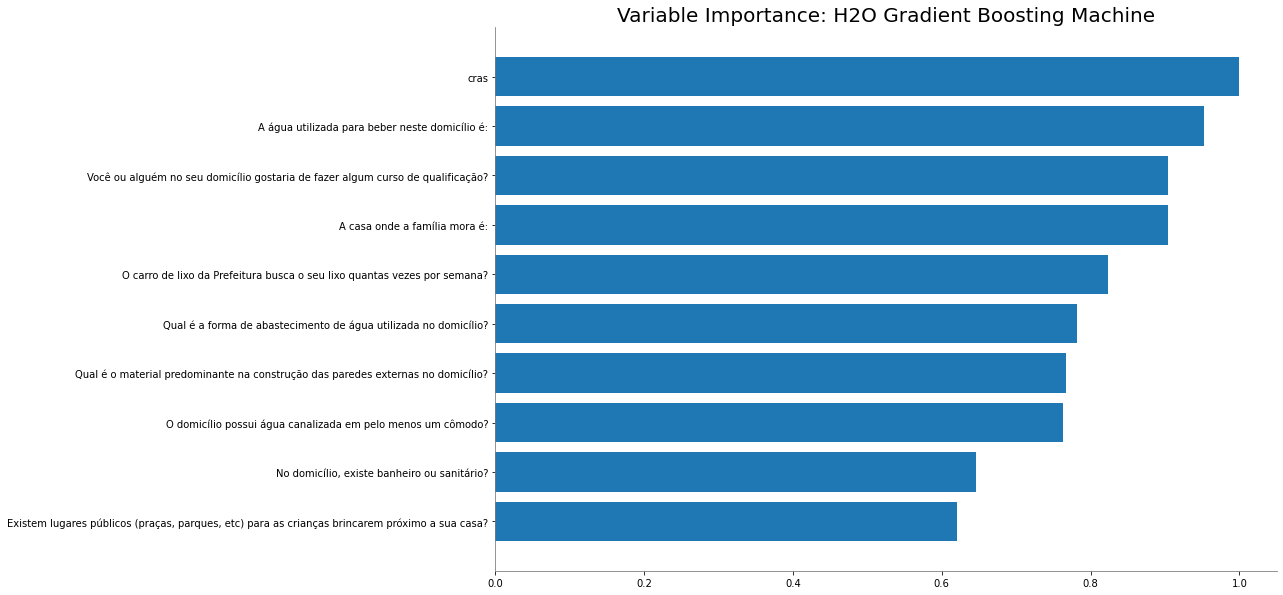

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_14

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                     0.536304                                                                                    1       0                                1                                                                                  0                                                                  0                                                              1                                                 1                                              1                                                                           0                                                                                                 0                                                                                                                                                                               0  sem ia
                                                                   0                      0                                                                                                                     0.412541                                                                                    0       0                                1                                                                                  0                                                                  0                                                              0                                                 0                                              1                                                                           0                                                                                                 0                                                                                                                                         

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
XGBoost_grid_1_AutoML_4_20221122_212128_model_7                 0.717018    1.09145  0.617616  0.38145
XGBoost_grid_1_AutoML_4_20221122_212128_model_3                 0.718231    1.09901  0.618685  0.382771
XGBoost_grid_1_AutoML_4_20221122_212128_model_10                0.718462    1.09182  0.618108  0.382058
XGBoost_grid_1_AutoML_4_20221122_212128_model_1                 0.718505    1.10625  0.617868  0.38176
GBM_grid_1_AutoML_4_20221122_212128_model_8                     0.718746    1.08006  0.630703  0.397787
GBM_grid_1_AutoML_4_20221122_212128_model_10                    0.719735    1.07367  0.629091  0.395755
XGBoost_grid_1_AutoML_4_20221122_212128_model_5                 0.719839    1.07633  0.61589   0.37932
GBM_grid_1_AutoML_4_20221122_212128_model_2                     

### df_SKBest_14 has accuracy: 0.5277316506144138

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_4_20221122_212128_model_7


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.3014921195900827
RMSE: 0.5490829806050108
LogLoss: 0.8470385769845444
Mean Per-Class Error: 0.6023383296056616
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  --------------
4003     1       4840        34        0.54911    4,875 / 8,878
229      125     1357        23        0.927912   1,609 / 1,734
1118     3       13105       40        0.0813823  1,161 / 14,266
261      8       1615        330       0.850949   1,884 / 2,214
5611     137     20917       427       0.351727   9,529 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.648273
2    0.893474
3    0.976229
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.3814496153515071
RMSE: 0.6176160743953375
LogLoss: 1.0914504995866043
Mean Per-Class Error: 0.7170181874073789
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2447     8       6367        56        0.724375  6,431 / 8,878
263      16      1419        36        0.990773  1,718 / 1,734
2510     32      11556       168       0.189962  2,710 / 14,266
306      14      1812        82        0.962963  2,132 / 2,214
5526     70      21154       342       0.479514  12,991 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.520486
2    0.849956
3    0.934704
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.520485  0.00773847  0.52952       0.518819      0.507198      0.51089       0.519749      0.529716      0.525655      0.514212      0.525286      0.52381
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.479515  0.00773847  0.47048       0.481181      0.492802      0.48911       0.480251      0.470284      0.474345      0.485788      0.474714      0.47619
err_count                1299.1    20.9149     1275          1304          1335          1325          1301          1274          1285          1316          1286          1290
logloss                  1.09145   0.00995207  1.08697       1.08534       1.11062       1.09542       1.10025       1.07701       1.08265       1.09853       1.0923        1.08541
max_per_class_error      0.990753  0.00402542  0.994595      0.989418      0.994505      0.993789      0.982955      0.99435       0.993827      0.988235      0.988439      0.987421
mean_per_class_accuracy  0.282987  0.00380691  0.29067

<Figure size 432x288 with 0 Axes>

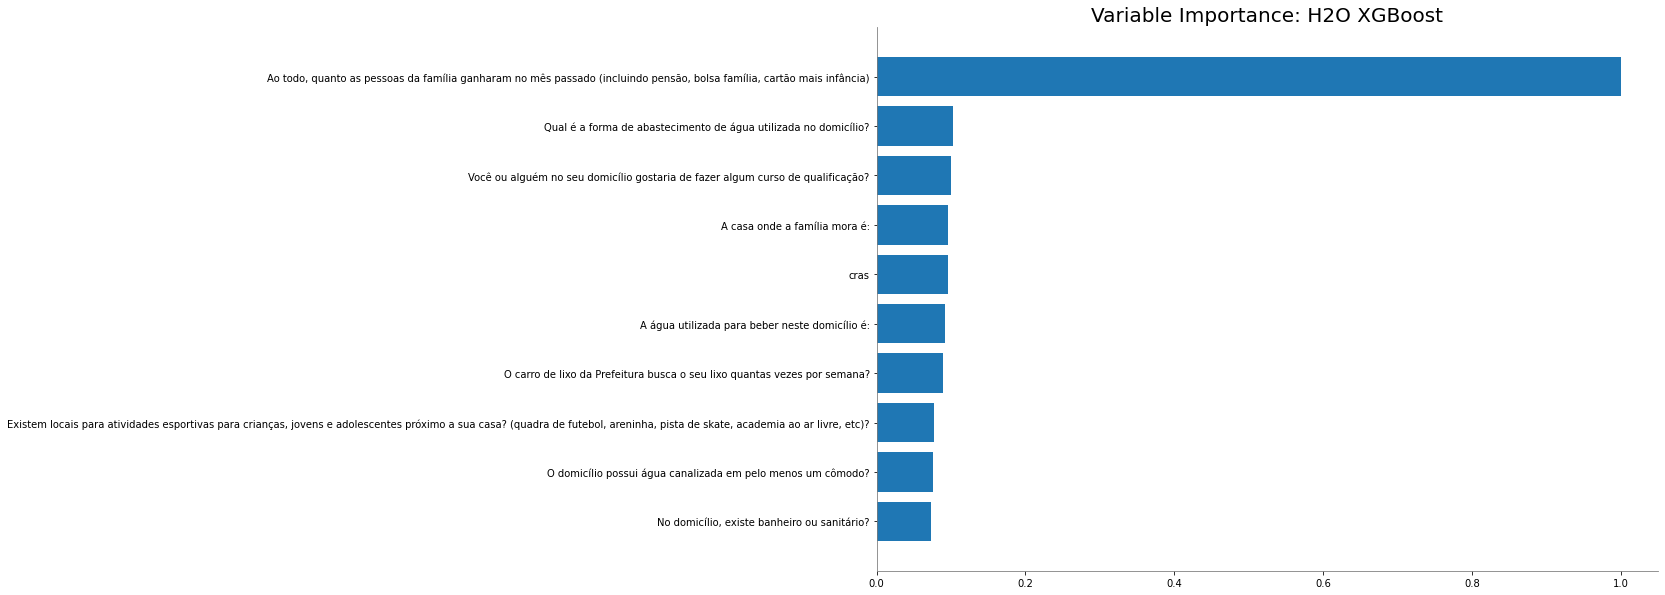

<Figure size 432x288 with 0 Axes>

In [ ]:
SKBest_11 = [10, 14, 15, 18, 19, 20, 21, 22, 23, 25, 27, 29]
SKBest_12 = [10, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25, 27, 29]
SKBest_13 = [10, 11, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25, 27, 29]
SKBest_14 = [10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25, 27, 29]

df_SKBest_11 = df[SKBest_11]
df_SKBest_12 = df[SKBest_12]
df_SKBest_13 = df[SKBest_13]
df_SKBest_14 = df[SKBest_14]

feature_combinations = {
    'df_SKBest_11' : df[SKBest_11],
    'df_SKBest_12' : df[SKBest_12],
    'df_SKBest_13' : df[SKBest_13],
    'df_SKBest_14' : df[SKBest_14]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_15

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.206271                                                                                 1       0                                0                                                                                  0                                                                  1                                                              1                                                 0                                              1                                                                           1                                                                                                 1                                                                                                                                  0                                                                                                                                                                               0  moderada
                                                                   1                      0.166667                                                                                                                 0.577558                                                                                 1       0                                1                                                                                  0                                                                  1                                                              1             

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
XGBoost_grid_1_AutoML_1_20221122_224820_model_3                 0.715085    1.09468  0.617287  0.381044
XGBoost_grid_1_AutoML_1_20221122_224820_model_9                 0.716165    1.07991  0.616729  0.380354
XGBoost_grid_1_AutoML_1_20221122_224820_model_1                 0.71648     1.10196  0.617441  0.381234
GBM_grid_1_AutoML_1_20221122_224820_model_2                     0.716521    1.0762   0.631489  0.398778
XGBoost_grid_1_AutoML_1_20221122_224820_model_10                0.716799    1.08636  0.616805  0.380448
GBM_grid_1_AutoML_1_20221122_224820_model_8                     0.71753     1.07859  0.630719  0.397807
GBM_grid_1_AutoML_1_20221122_224820_model_10                    0.717906    1.07368  0.630218  0.397175
XGBoost_1_AutoML_1_20221122_224820                           

### Best Model Updated: df_SKBest_15-XGBoost_grid_1_AutoML_1_20221122_224820_model_3-acc:0.5081368316174029

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_15-XGBoost_grid_1_AutoML_1_20221122_224820_model_3-acc:0.5081368316174029

### df_SKBest_15 has accuracy: 0.5081368316174029

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20221122_224820_model_3


Model Summary: 
    number_of_trees
--  -----------------
    34

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.297917191383031
RMSE: 0.5458179104637654
LogLoss: 0.8373806138611009
Mean Per-Class Error: 0.5920411366444059
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  --------------
4108     6       4728        36        0.537283   4,770 / 8,878
218      151     1338        27        0.912918   1,583 / 1,734
1122     11      13078       55        0.0832749  1,188 / 14,266
237      10      1601        366       0.834688   1,848 / 2,214
5685     178     20745       484       0.34656    9,389 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.65344
2    0.895135
3    0.978001
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.38104375554854275
RMSE: 0.6172874172932271
LogLoss: 1.0946848673354543
Mean Per-Class Error: 0.7150849429490823
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2495     15      6298        70        0.718968  6,383 / 8,878
266      12      1414        42        0.99308   1,722 / 1,734
2526     39      11519       182       0.192556  2,747 / 14,266
311      21      1784        98        0.955736  2,116 / 2,214
5598     87      21015       392       0.478665  12,968 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.521335
2    0.847926
3    0.933634
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.521335  0.00944469  0.510332      0.516605      0.52344       0.526763      0.513474      0.520856      0.540421      0.514212      0.515319      0.531931
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.478665  0.00944469  0.489668      0.483395      0.47656       0.473237      0.486526      0.479144      0.459579      0.485788      0.484681      0.468069
err_count                1296.8    25.6766     1327          1310          1291          1282          1318          1298          1245          1316          1313          1268
logloss                  1.09468   0.0163623   1.11366       1.11505       1.07681       1.08454       1.11934       1.08003       1.07791       1.09185       1.10086       1.08678
max_per_class_error      0.993115  0.00509874  0.983607      0.989247      0.993939      1             0.994505      0.99375       0.987805      0.993671      1             0.994624
mean_per_class_accuracy  0.284914  0.00562881  0.2854

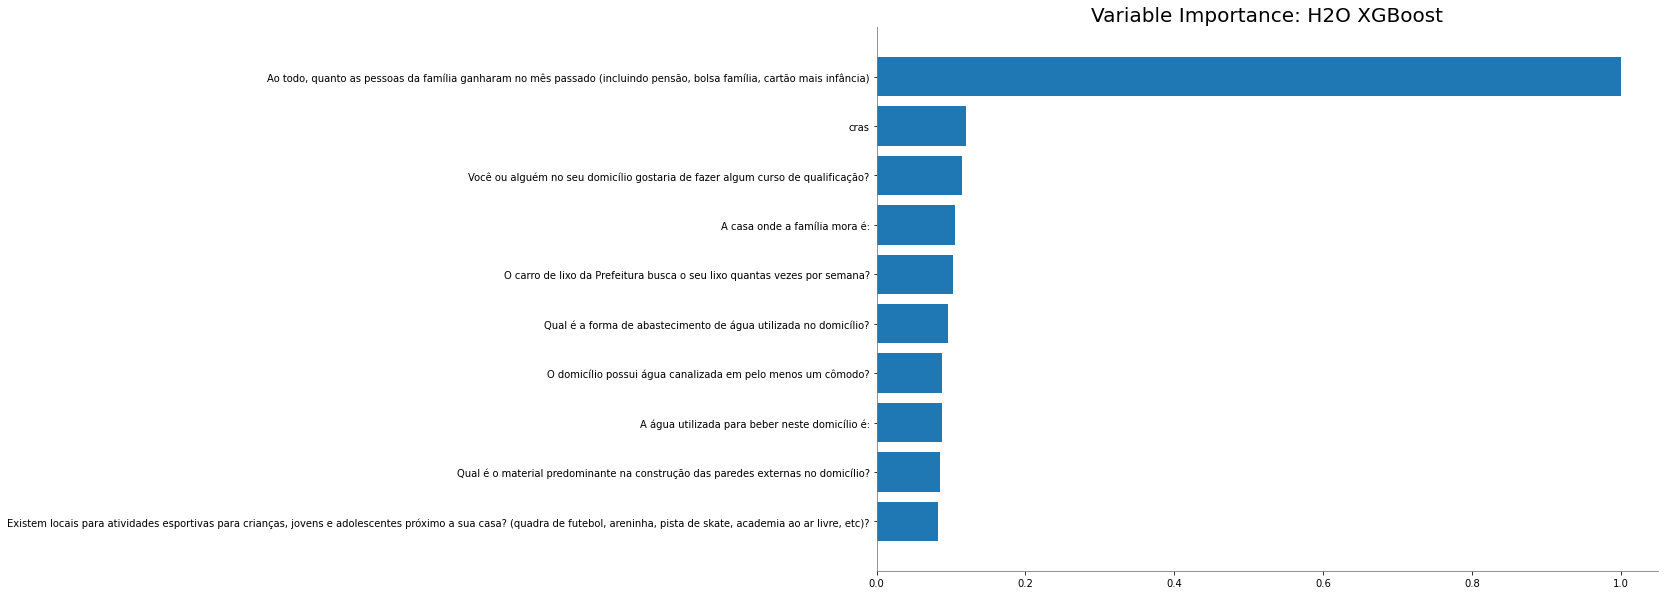

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_16

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    creas    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   1                      0.166667                                                                                                                 0.660066                                                                                 0       1        0                                1                                                                                  0                                                                  1                                                              1                                                 0                                              1                                                                           1                                                                                                 1                                                                                                                                  0                                                                                                                                                                               1  sem ia
                                                                   1                      0.333333                                                                                                                 1                                                                                        1       0        0                                0                                                                                  0                                                                  0                                          

AutoML progress: |█████████████████████████████████████████████████████████

In [ ]:
SKBest_15 = [10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 29]


df_SKBest_15 = df[SKBest_15]


feature_combinations = {
    'df_SKBest_15' : df[SKBest_15]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_16

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    creas    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   1                      0.166667                                                                                                               0.247525                                                                                   1       0        0                                0                                                                                  0                                                                  1                                                              1                                                 1                                              1                                                                           1                                                                                                 1                                                                                                                                  0                                                                                                                                                                               1  moderada
                                                                   0                      0                                                                                                                      0.622112                                                                                   1       1        0                                1                                                                                  0                                                                  0                                        

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_1_20221123_11403_model_2                     0.717206    1.07386  0.629657  0.396468
XGBoost_1_AutoML_1_20221123_11403                              0.717596    1.08211  0.617596  0.381425
XGBoost_grid_1_AutoML_1_20221123_11403_model_10                0.717789    1.08046  0.616371  0.379913
GBM_grid_1_AutoML_1_20221123_11403_model_8                     0.717885    1.07834  0.631051  0.398225
XGBoost_grid_1_AutoML_1_20221123_11403_model_3                 0.718077    1.09609  0.617919  0.381823
XGBoost_grid_1_AutoML_1_20221123_11403_model_2                 0.718843    1.07503  0.615205  0.378477
XGBoost_grid_1_AutoML_1_20221123_11403_model_5                 0.718907    1.07244  0.615477  0.378812
XGBoost_grid_1_AutoML_1_20221123_11403_model_1                 0.7196

### Best Model Updated: df_SKBest_16-GBM_grid_1_AutoML_1_20221123_11403_model_2-acc:0.530388575224178

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_16-GBM_grid_1_AutoML_1_20221123_11403_model_2-acc:0.530388575224178

### df_SKBest_16 has accuracy: 0.530388575224178

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20221123_11403_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    39                 156                         393612                 0            11           5.78205       1             511           196.276

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3533939018126968
RMSE: 0.5944694288293527
LogLoss: 0.9523034772596123
Mean Per-Class Error: 0.6494201945987736
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
3742     0       5110        26        0.578509  5,136 / 8,878
233      23      1454        24        0.986736  1,711 / 1,734
1676     1       12521       68        0.122319  1,745 / 14,266
240      0       1775        199       0.910117  2,015 / 2,214
5891     24      20860       317       0.391518  10,607 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.608482
2    0.877049
3    0.970397
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.3964683969346639
RMSE: 0.629657364710891
LogLoss: 1.0738585332675648
Mean Per-Class Error: 0.7172061321985936
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2527     1       6316        34        0.715364  6,351 / 8,878
250      3       1451        30        0.99827   1,731 / 1,734
2556     4       11601       105       0.186808  2,665 / 14,266
272      3       1869        70        0.968383  2,144 / 2,214
5605     11      21237       239       0.475823  12,891 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.524177
2    0.855714
3    0.934593
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.524177  0.0102951   0.521033      0.527306      0.54079       0.52344       0.522702      0.530823      0.504614      0.535253      0.514212      0.521595
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.475823  0.0102951   0.478967      0.472694      0.45921       0.47656       0.477298      0.469177      0.495386      0.464747      0.485788      0.478405
err_count                1289.1    27.8905     1298          1281          1244          1291          1293          1271          1342          1259          1316          1

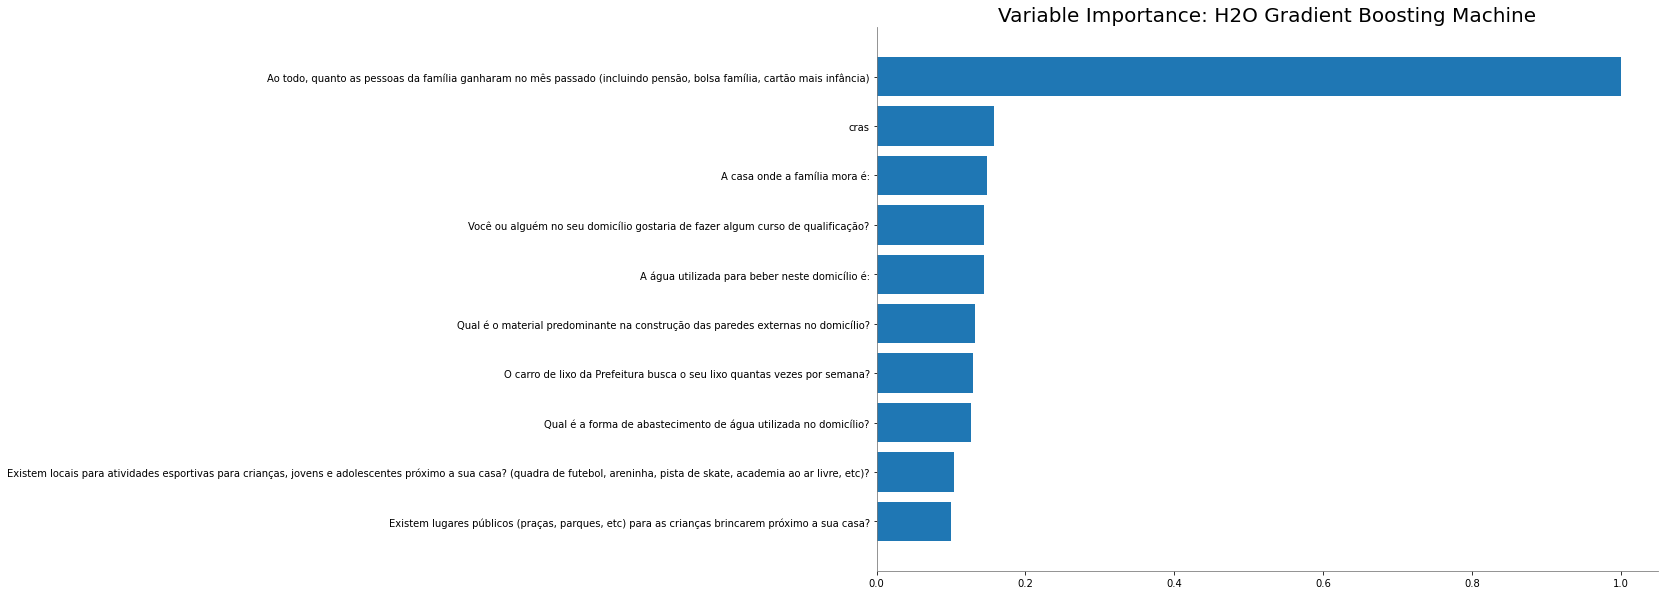

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_17

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    creas    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.330033                                                                                 1       0        0                                0                                                                                  0                                                                  1                                                              1                                                 1                                              1                                                                           1                                                                                                 0                                                                                                                                  0                                                                                                                                                                               0                                                             1  moderada
                                                                   0                      0                                                                                                                        0.412541                                                                                 1       1        0                                0    

AutoML progress: |█████████████████████████████████████████

In [ ]:
SKBest_16 = [10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 29]

df_SKBest_16 = df[SKBest_16]

feature_combinations = {
    'df_SKBest_16' : df[SKBest_16],
    'df_SKBest_17' : df[SKBest_17]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_17

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    creas    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.536304                                                                                 0       0        0                                1                                                                                  0                                                                  1                                                              1                                                 1                                              1                                                                           0                                                                                                 0                                                                                                                                  0                                                                                                                                                                               1                                                             1  moderada
                                                                   0                      0                                                                                                                        0.387789                                                                                 1       1        0                                1    

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
XGBoost_grid_1_AutoML_3_20221123_25424_model_3                 0.716501    1.09282  0.617043  0.380742
GBM_grid_1_AutoML_3_20221123_25424_model_11                    0.716557    1.0686   0.623397  0.388623
GBM_grid_1_AutoML_3_20221123_25424_model_2                     0.716778    1.07203  0.628528  0.395047
XGBoost_grid_1_AutoML_3_20221123_25424_model_7                 0.716803    1.08304  0.615353  0.378659
GBM_grid_1_AutoML_3_20221123_25424_model_8                     0.717443    1.07756  0.630451  0.397468
XGBoost_1_AutoML_3_20221123_25424                              0.717575    1.08113  0.617145  0.380868
XGBoost_grid_1_AutoML_3_20221123_25424_model_10                0.717585    1.08726  0.616287  0.37981
GBM_grid_1_AutoML_3_20221123_25424_model_10                    0.71770

### Best Model Updated: df_SKBest_17-XGBoost_grid_1_AutoML_3_20221123_25424_model_3-acc:0.529724344071737

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_17-XGBoost_grid_1_AutoML_3_20221123_25424_model_3-acc:0.529724344071737

### df_SKBest_17 has accuracy: 0.529724344071737

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_3_20221123_25424_model_3


Model Summary: 
    number_of_trees
--  -----------------
    33

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.29874089109272345
RMSE: 0.5465719450289445
LogLoss: 0.8386137233202059
Mean Per-Class Error: 0.5930202245520863
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  --------------
4049     11      4787        31        0.543929   4,829 / 8,878
186      157     1368        23        0.909458   1,577 / 1,734
1013     9       13190       54        0.0754241  1,076 / 14,266
202      13      1652        347       0.84327    1,867 / 2,214
5450     190     20997       455       0.345083   9,349 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.654917
2    0.895172
3    0.97741
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.3807419854966029
RMSE: 0.6170429365097723
LogLoss: 1.092822336564336
Mean Per-Class Error: 0.7165008519505319
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2404     14      6408        52        0.729218  6,474 / 8,878
229      8       1454        43        0.995386  1,726 / 1,734
2414     40      11656       156       0.182952  2,610 / 14,266
273      16      1833        92        0.958446  2,122 / 2,214
5320     78      21351       343       0.477336  12,932 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.522664
2    0.848442
3    0.933929
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.522663  0.0126599   0.520664      0.543542      0.511628      0.509782      0.523071      0.516796      0.50646       0.528239      0.524179      0.542267
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.477337  0.0126599   0.479336      0.456458      0.488372      0.490218      0.476929      0.483204      0.49354       0.471761      0.475821      0.457733
err_count                1293.2    34.2208     1299          1237          1323          1328          1292          1309          1337          1278          1289          1240
logloss                  1.09282   0.0177148   1.09508       1.08589       1.10665       1.11441       1.08822       1.08269       1.11176       1.09941       1.09109       1.05301
max_per_class_error      0.995288  0.00391561  0.994083      0.994083      0.994413      0.99435       0.994898      1             1             1             0.993789      0.987261
mean_per_class_accuracy  0.283396  0.0060683   0.28491

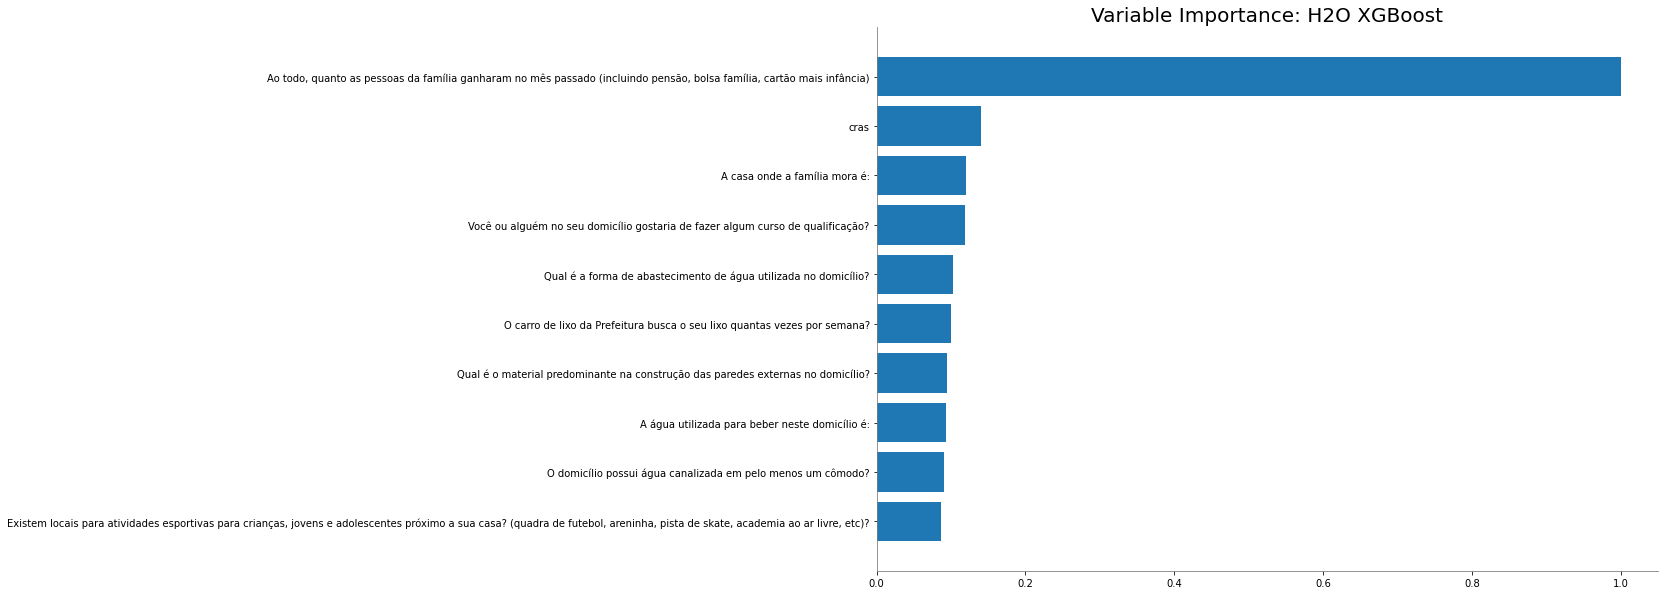

<Figure size 432x288 with 0 Axes>

In [ ]:
SKBest_17 = [10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29]

df_SKBest_17 = df[SKBest_17]

feature_combinations = {
    'df_SKBest_17' : df[SKBest_17]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

## f_classif

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_1

O domicílio possui água canalizada em pelo menos um cômodo?  ia level
-------------------------------------------------------------  ----------
                                                            0  grave
                                                            1  grave
                                                            1  grave
                                                            1  leve
                                                            1  moderada
                                                            1  sem ia
                                                            1  grave
                                                            0  grave
                                                            0  grave
                                                            0  grave
[27092 rows x 2 columns]

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_1_20221125_192526_model_2                         0.73924     1.10969  0.653916  0.427606
DeepLearning_grid_1_AutoML_1_20221125_192526_model_3                0.746193    1.0826   0.618799  0.382913
DeepLearning_grid_1_AutoML_1_20221125_192526_model_8                0.747661    1.08664  0.616304  0.37983
GBM_grid_1_AutoML_1_20221125_192526_model_11                        0.747743    1.10739  0.652579  0.42586
GBM_grid_1_AutoML_1_20221125_192526_model_1                         0.747743    1.10339  0.650064  0.422583
GBM_grid_1_AutoML_1_20221125_192526_model_9                         0.747743    1.10269  0.649806  0.422247
DeepLearning_1_AutoML_1_20221125_192526                             0.748628    1.08236  0.622503  0.38751
DeepLearning_grid_3_AutoML_1_202

### Best Model Updated: df_SKBest_fclassif_1-GBM_grid_1_AutoML_1_20221125_192526_model_2-acc:0.5264031883095317

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_fclassif_1-GBM_grid_1_AutoML_1_20221125_192526_model_2-acc:0.5264031883095317

### df_SKBest_fclassif_1 has accuracy: 0.5264031883095317

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20221125_192526_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 160                         12466                  0            1            0.3625        1             2             1.3625

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.42609944692626056
RMSE: 0.6527629331742578
LogLoss: 1.1076128919570458
Mean Per-Class Error: 0.75
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
0        0       8878        0         1         8,878 / 8,878
0        0       1734        0         1         1,734 / 1,734
0        0       14266       0         0         0 / 14,266
0        0       2214        0         1         2,214 / 2,214
0        0       27092       0         0.473424  12,826 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.526576
2    0.854274
3    0.933412
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.4276064457197615
RMSE: 0.6539162375409877
LogLoss: 1.1096901165909634
Mean Per-Class Error: 0.7392396342501198
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1600     0       7278        0         0.819779  7,278 / 8,878
177      0       1557        0         1         1,734 / 1,734
1957     0       12309       0         0.137179  1,957 / 14,266
201      0       2013        0         1         2,214 / 2,214
3935     0       23157       0         0.486601  13,183 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.513399
2    0.854274
3    0.933412
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.5134    0.0168162   0.505535      0.501845      0.509413      0.496493      0.484312      0.516427      0.524548      0.526024      0.535622      0.533776
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.4866    0.0168162   0.494465      0.498155      0.490587      0.503507      0.515688      0.483573      0.475452      0.473976      0.464378      0.466224
err_count                1318.3    45.6193     1340          1350          1329          1364          1397          1310          1288          1284          1258          1263
logloss     

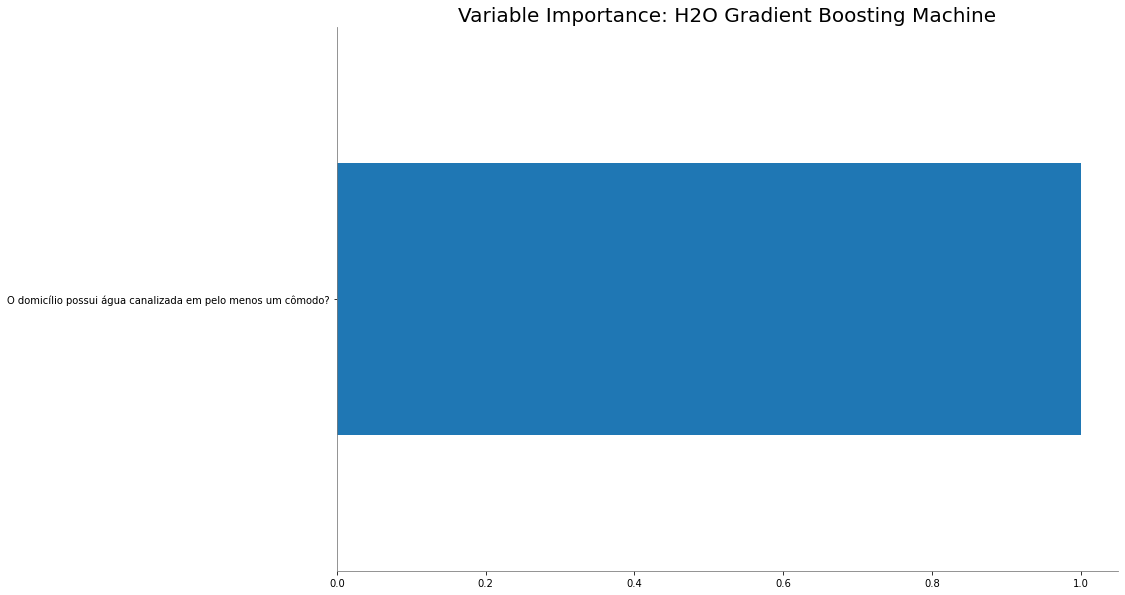

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_2

O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:  ia level
-------------------------------------------------------------  ------------------------------------------------  ----------
                                                            1                                                 1  moderada
                                                            0                                                 1  moderada
                                                            1                                                 1  moderada
                                                            1                                                 0  grave
                                                            1                                                 1  moderada
                                                            1                                                 1  moderada
                                                            1                                                 1  grave
                                                            0                                                 1  grave
                                                            1                                                 1  moderada
                                                            1                                                 1  moderada
[27092 rows x 3 columns]

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
DeepLearning_grid_2_AutoML_2_20221125_202639_model_2                0.734009    1.09553  0.613209  0.376026
XGBoost_grid_1_AutoML_2_20221125_202639_model_4                     0.734193    1.0726   0.621529  0.386298
GBM_grid_1_AutoML_2_20221125_202639_model_2                         0.734193    1.08449  0.63811   0.407185
GBM_grid_1_AutoML_2_20221125_202639_model_5                         0.734193    1.07379  0.625866  0.391709
GBM_grid_1_AutoML_2_20221125_202639_model_14                        0.734193    1.07349  0.62536   0.391075
GBM_grid_1_AutoML_2_20221125_202639_model_1                         0.734193    1.0894   0.641769  0.411868
GBM_grid_1_AutoML_2_20221125_202639_model_11                        0.734193    1.0752   0.627657  0.393953
GBM_grid_1_AutoML_2_20221125_

### df_SKBest_fclassif_2 has accuracy: 0.5264031883095317

### Details of the best model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_2_20221125_202639_model_2


Status of Neuron Layers: predicting ia level, 4-class classification, multinomial distribution, CrossEntropy loss, 10,804 weights/biases, 132.8 KB, 4,432 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate               rate_rms                momentum    mean_weight            weight_rms           mean_bias              bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ----------------------  ----------------------  ----------  ---------------------  -------------------  ---------------------  --------------------
    1        2        Input             0.0
    2        100      RectifierDropout  20.0       0.0   0.0   0.0002776984552838258   8.60100844874978e-05    0.0         0.005055492264800705   0.13771623373031616  0.4974899377470988     0.016041547060012817
    3        100      RectifierDropout  20.0       0.0   0.0   0.0005311542606228613   0.00032705720514059067  0.0         -0.006659933128988814  0.10025250911712646  0.9757375243530895     0.0188978910446167
    4        4        Softmax                      0.0   0.0   0.00031433171103344647  0.0001747321803122759   0.0         -0.005704219475883292  0.5367183685302734   -0.005599635462034126  0.011286772787570953

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.35073560165882633
RMSE: 0.5922293488664897
LogLoss: 1.205404374128508
Mean Per-Class Error: 0.75
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  --------------
0        0       3210        0         1         3,210 / 3,210
0        0       645         0         1         645 / 645
0        0       5350        0         0         0 / 5,350
0        0       814         0         1         814 / 814
0        0       10019       0         0.466015  4,669 / 10,019

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.533985
2    0.854377
3    0.935323
4    1

ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.37602570828824655
RMSE: 0.6132093511095917
LogLoss: 1.0955298148639798
Mean Per-Class Error: 0.7340094925726045
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2362     0       6516        0         0.733949  6,516 / 8,878
257      0       1477        0         1         1,734 / 1,734
2883     0       11383       0         0.202089  2,883 / 14,266
304      0       1910        0         1         2,214 / 2,214
5806     0       21286       0         0.492655  13,347 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.507345
2    0.854274
3    0.931788
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  -

<Figure size 432x288 with 0 Axes>

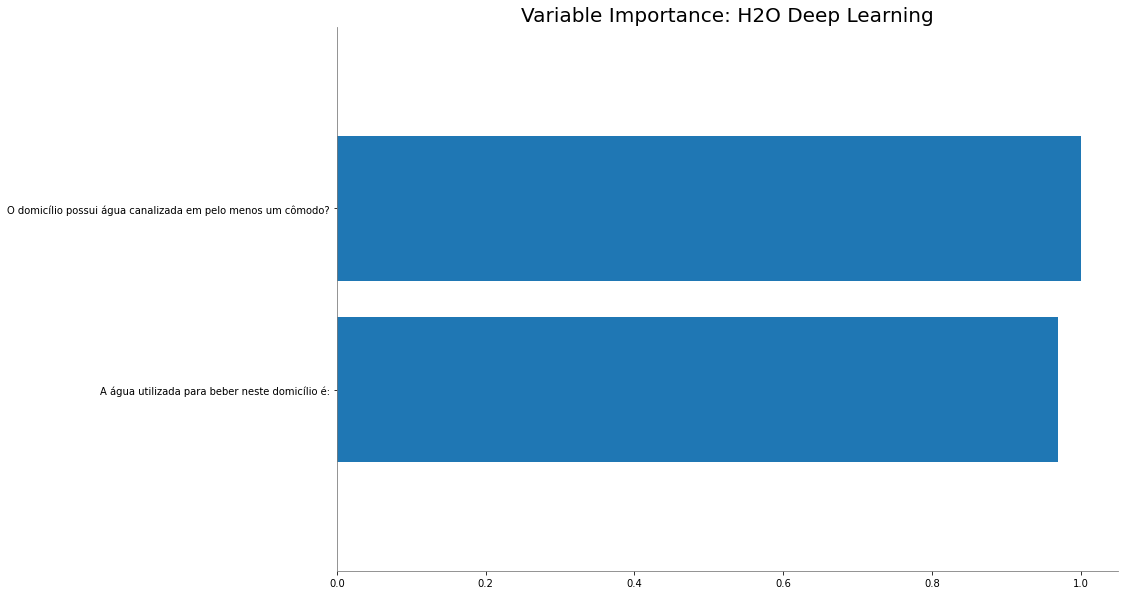

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_3

O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?  ia level
-------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  ----------
                                                            1                                                 0                                              1  grave
                                                            1                                                 1                                              1  grave
                                                            1                                                 1                                              1  moderada
                                                            0                                                 1                                              1  moderada
                                                            0                                                 1                                              0  grave
                                                            0                                                 1                                              0  moderada
                                                            0                                                 0                                              1  moderada
                                                            0                                                 0                                              1  moderada
                                                            1                                                 1                                              1  moderada
                                                            1                                                 1                                              1  moderada
[27092 rows x 4 columns]

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
DeepLearning_grid_1_AutoML_3_20221125_212701_model_4                0.731832    1.08493  0.621891  0.386748
GBM_grid_1_AutoML_3_20221125_212701_model_10                        0.733282    1.08346  0.638504  0.407687
GBM_grid_1_AutoML_3_20221125_212701_model_4                         0.734017    1.08082  0.635747  0.404174
GBM_grid_1_AutoML_3_20221125_212701_model_11                        0.734017    1.07561  0.630877  0.398005
GBM_grid_1_AutoML_3_20221125_212701_model_9                         0.734017    1.07757  0.632582  0.40016
GBM_grid_1_AutoML_3_20221125_212701_model_6                         0.735007    1.07411  0.629118  0.395789
DeepLearning_grid_1_AutoML_3_20221125_212701_model_1                0.73523     1.07375  0.621739  0.386559
GBM_grid_1_AutoML_3_20221125_2

### df_SKBest_fclassif_3 has accuracy: 0.49983394221188976

### Details of the best model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_3_20221125_212701_model_4


Status of Neuron Layers: predicting ia level, 4-class classification, multinomial distribution, CrossEntropy loss, 804 weights/biases, 14.1 KB, 3,400,529 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms             momentum    mean_weight           weight_rms          mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  -------------------  ----------  --------------------  ------------------  -------------------  ------------------
    1        3        Input             5.0
    2        100      RectifierDropout  0.0        0.0   0.0   0.0007756849797078757  0.00130105996504426  0.0         -0.03071150347745667  1.4584026336669922  0.7708522461592352   2.3838062286376953
    3        4        Softmax                      0.0   0.0   0.03738758743373182    0.04736553132534027  0.0         -12.864059587661178   11.104507446289062  -14.639136957490427  3.766770362854004

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.3889384072368629
RMSE: 0.6236492662040604
LogLoss: 1.0953542650537065
Mean Per-Class Error: 0.7398728996122361
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  --------------
738      0       2562        0         0.776364  2,562 / 3,300
87       0       565         0         1         652 / 652
966      0       4309        0         0.183128  966 / 5,275
97       0       694         0         1         791 / 791
1888     0       8130        0         0.496207  4,971 / 10,018

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.503793
2    0.855959
3    0.933919
4    1

ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.38674841910989755
RMSE: 0.6218910025960317
LogLoss: 1.0849261346100794
Mean Per-Class Error: 0.7318315156871879
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1939     0       6939        0         0.781595  6,939 / 8,878
208      0       1526        0         1         1,734 / 1,734
2079     0       12187       0         0.145731  2,079 / 14,266
222      0       1992        0         1         2,214 / 2,214
4448     0       22644       0         0.478591  12,966 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.521409
2    0.854274
3    0.930607
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.521409  0.0147523   0.522509      0.519557      0.491325      0.516427      0.525655      0.530454      0.507937      0.54079       0.51

<Figure size 432x288 with 0 Axes>

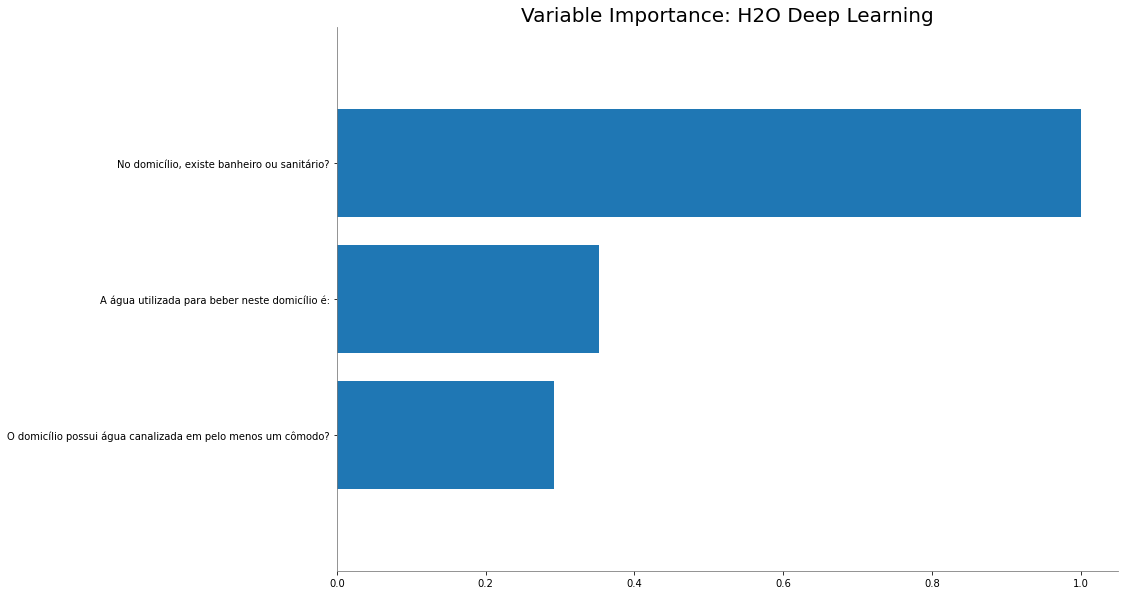

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_4

Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?  ia level
-----------------------------------------------------------------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  ----------
                                                                                                               0.577558                                                              1                                                 0                                              1  moderada
                                                                                                               0.412541                                                              1                                                 0                                              1  grave
                                                                                                               0.412541                                                              0                                                 1                                              0  grave
                                                                                                               0.387789                                                              1                                                 1                                              1  grave
                                                                                                               0.412541                                                              1                                                 1                                              1  moderada
                                                                                                               0.330033                                                              1                                                 1                                              1  moderada
                                                                                                               0.455446                                                              0                                                 1                                              1  moderada
                                                                                                               0.288779                                                              1                                                 1                                              1  sem ia
                                                                                                               0.412541                                                              0                                                 1                                              0  moderada
                                                                                                               0.412541                                                              1                                                 1                                              1  moderada
[27092 rows x 5 columns]

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_4_20221125_222735_model_2                         0.731156    1.08447  0.637249  0.406087
GBM_grid_1_AutoML_4_20221125_222735_model_1                         0.73188     1.0794   0.635549  0.403923
GBM_grid_1_AutoML_4_20221125_222735_model_8                         0.732699    1.08193  0.633844  0.401758
GBM_grid_1_AutoML_4_20221125_222735_model_10                        0.732733    1.0739   0.629527  0.396304
GBM_grid_1_AutoML_4_20221125_222735_model_12                        0.733032    1.07638  0.634137  0.402129
XGBoost_2_AutoML_4_20221125_222735                                  0.73354     1.06863  0.61855   0.382604
XGBoost_grid_1_AutoML_4_20221125_222735_model_7                     0.733693    1.06973  0.618784  0.382894
GBM_2_AutoML_4_20221125_22273

### df_SKBest_fclassif_4 has accuracy: 0.5220856858186649

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_4_20221125_222735_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 160                         194399                 0            11           4.95          1             268           92.0938

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.39469450314124394
RMSE: 0.6282471672369434
LogLoss: 1.0495928924401832
Mean Per-Class Error: 0.7147087225696986
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2417     0       6461        0         0.727754  6,461 / 8,878
217      0       1517        0         1         1,734 / 1,734
1870     0       12396       0         0.131081  1,870 / 14,266
232      0       1982        0         1         2,214 / 2,214
4736     0       22356       0         0.453233  12,279 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.546767
2    0.858187
3    0.943563
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.40608653095632763
RMSE: 0.6372491906282248
LogLoss: 1.0844666424539464
Mean Per-Class Error: 0.7311559325602154
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2019     1       6858        0         0.772584  6,859 / 8,878
222      0       1511        1         1         1,734 / 1,734
2167     1       12097       1         0.15204   2,169 / 14,266
244      0       1970        0         1         2,214 / 2,214
4652     2       22436       2         0.478961  12,976 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.521039
2    0.855197
3    0.929241
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.52104   0.0105024   0.509225      0.512177      0.516796      0.507937      0.517534      0.528239      0.534515      0.517534      0.529347      0.537099
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.47896   0.0105024   0.490775      0.487823      0.483204      0.492063      0.482466      0.471761      0.465485      0.482466      0.470653      0.462901
err_count                1297.6    28.5587     1330          1322          1309          1333          1307          1278          1261          1307          1275       

<Figure size 432x288 with 0 Axes>

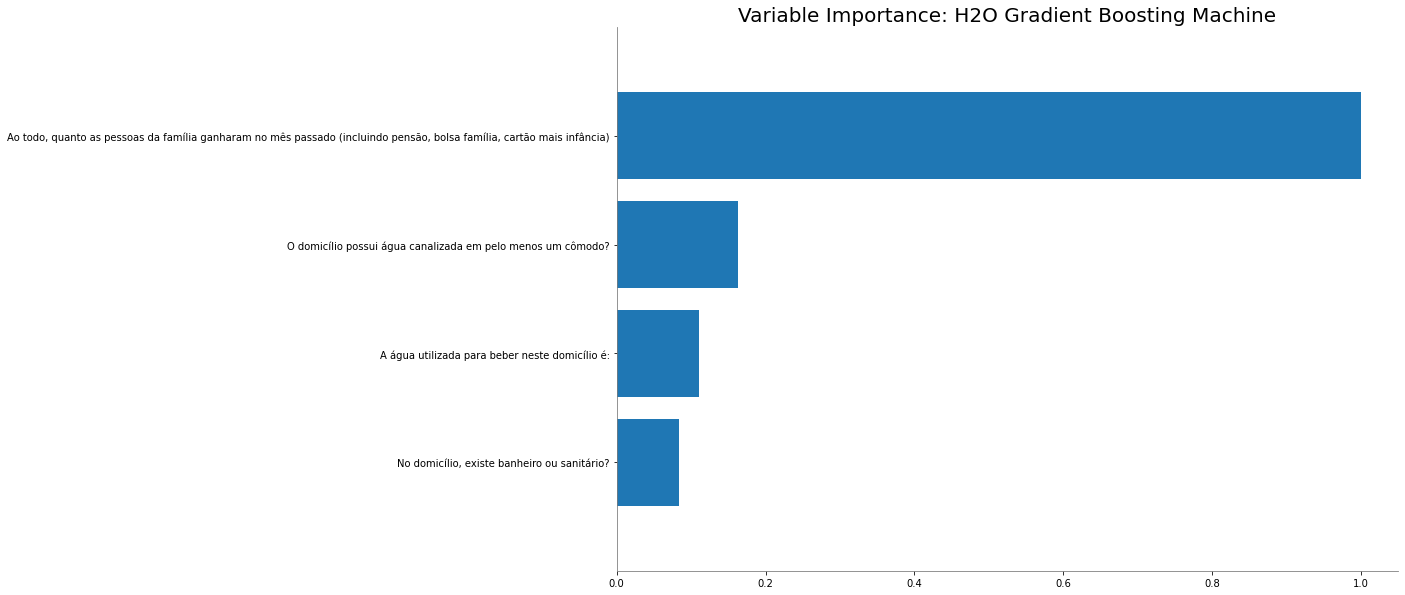

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_5

Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Qual é o material predominante na construção das paredes externas no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?  ia level
-----------------------------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  ----------
                                                                                                               0.726073                                                                                  0                                                              1                                                 1                                              1  moderada
                                                                                                               0.393564                                                                                  1                                                              0                                                 1                                              1  grave
                                                                                                               0.288779                                                                                  0                                                              1                                                 0                                              1  moderada
                                                                                                               0.536304                                                                                  0                                                              1                                                 1                                              1  moderada
                                                                                                               0.412541                                                                                  1                                                              0                                                 0                                              1  grave
                                                                                                               0.49505                                                                                   0                                                              1                                                 1                                              1  grave
                                                                                                               0.325908                                                                                  0                                                              1                                                 1                                              1  grave
                                                                                                               0.412541                                                                                  1                                                              1                                                 0                                              0  grave
                                                                                                               0.391914                                                                                  0                                                              1                    

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_5_20221125_232841_model_2                         0.73246     1.0808   0.633025  0.400721
GBM_grid_1_AutoML_5_20221125_232841_model_4                         0.733571    1.06574  0.623925  0.389283
GBM_grid_1_AutoML_5_20221125_232841_model_1                         0.734133    1.07346  0.631791  0.39916
GBM_grid_1_AutoML_5_20221125_232841_model_11                        0.734802    1.06927  0.624873  0.390466
DeepLearning_grid_1_AutoML_5_20221125_232841_model_3                0.73495     1.10448  0.614495  0.377605
DeepLearning_grid_2_AutoML_5_20221125_232841_model_2                0.735004    1.08801  0.608994  0.370874
GBM_grid_1_AutoML_5_20221125_232841_model_9                         0.73527     1.06798  0.62396   0.389326
GBM_grid_1_AutoML_5_20221125_2

### Best Model Updated: df_SKBest_fclassif_5-GBM_grid_1_AutoML_5_20221125_232841_model_2-acc:0.5293922284955165

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_fclassif_5-GBM_grid_1_AutoML_5_20221125_232841_model_2-acc:0.5293922284955165

### df_SKBest_fclassif_5 has accuracy: 0.5293922284955165

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_5_20221125_232841_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    38                 152                         259345                 0            11           6.22368       1             338           131.263

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.38491947186960135
RMSE: 0.620418787489226
LogLoss: 1.0328568392882727
Mean Per-Class Error: 0.7097568215441017
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2489     0       6389        0         0.719644  6,389 / 8,878
210      0       1522        2         1         1,734 / 1,734
1771     0       12492       3         0.124352  1,774 / 14,266
215      0       1988        11        0.995032  2,203 / 2,214
4685     0       22391       16        0.446626  12,100 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.553374
2    0.859553
3    0.945261
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.40072107019923214
RMSE: 0.6330253314040696
LogLoss: 1.0807975173444127
Mean Per-Class Error: 0.7324599366304034
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1905     3       6970        0         0.785425  6,973 / 8,878
194      0       1539        1         1         1,734 / 1,734
2084     0       12180       2         0.146222  2,086 / 14,266
219      2       1989        4         0.998193  2,210 / 2,214
4402     5       22678       7         0.479957  13,003 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.520043
2    0.855714
3    0.929056
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.520042  0.0140471   0.521402      0.536531      0.524548      0.51089       0.536729      0.507198      0.507567      0.500185      0.539683      0.515688
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.479958  0.0140471   0.478598      0.463469      0.475452      0.48911       0.463271      0.492802      0.492433      0.499815      0.460317      0.484312
err_count                1300.3    37.9885     1297          1256          1288          1325          1255          1335          1334          1354          1247        

<Figure size 432x288 with 0 Axes>

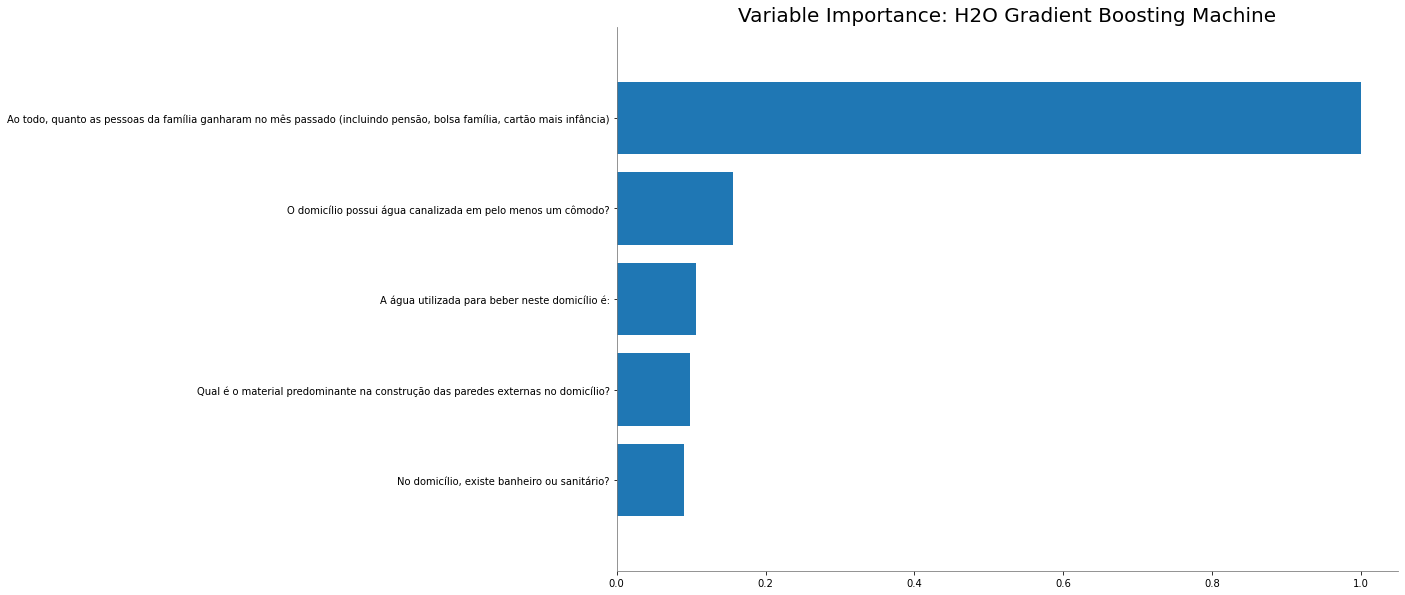

<Figure size 432x288 with 0 Axes>

In [ ]:
SKBest_fclassif_1 = [20, 29]
SKBest_fclassif_2 = [20, 21, 29]
SKBest_fclassif_3 = [20, 21, 22, 29]
SKBest_fclassif_4 = [12, 20, 21, 22, 29]
SKBest_fclassif_5 = [12, 18, 20, 21, 22, 29]

df_SKBest_fclassif_1 = df[SKBest_fclassif_1]
df_SKBest_fclassif_2 = df[SKBest_fclassif_2]
df_SKBest_fclassif_3 = df[SKBest_fclassif_3]
df_SKBest_fclassif_4 = df[SKBest_fclassif_4]
df_SKBest_fclassif_5 = df[SKBest_fclassif_5]

feature_combinations = {
    'df_SKBest_fclassif_1' : df[SKBest_fclassif_1],
    'df_SKBest_fclassif_2' : df[SKBest_fclassif_2],
    'df_SKBest_fclassif_3' : df[SKBest_fclassif_3],
    'df_SKBest_fclassif_4' : df[SKBest_fclassif_4],
    'df_SKBest_fclassif_5' : df[SKBest_fclassif_5]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_6

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Qual é o material predominante na construção das paredes externas no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?  ia level
--------------------------------------------------------------------  -----------------------------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  ----------
                                                                   0                                                                                                                 0.337459                                                                                  0                                                              1                                                 0                                              1  grave
                                                                   0                                                                                                                 0.412541                                                                                  0                                                              0                                                 1                                              0  grave
                                                                   0                                                                                                                 0.412541                                                                                  0                                                              0                                                 1                                              1  moderada
                                                                   0                                                                                                                 0.412541                                                                                  0                                                              1                                                 1                                              1  moderada
                                                                   0                                                                                                                 0.247525                                                                                  1                                                              0                                                 1                                              0  moderada
                                                                   1                                                                                                                 0.371287                                                                                  1                                                              1                                                 1                                              1  moderada
                                                                   0                                                                                                                 0.412541                                                                                  0                                                              1                                                 1                                              1  moderada
                   

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                               mean_per_class_error    logloss      rmse       mse
DeepLearning_grid_1_AutoML_1_20221126_03618_model_4                0.725953    1.11109  0.625662  0.391453
StackedEnsemble_AllModels_4_AutoML_1_20221126_03618                0.729354    1.06288  0.6188    0.382913
GBM_grid_1_AutoML_1_20221126_03618_model_10                        0.729629    1.07651  0.632845  0.400493
DeepLearning_grid_2_AutoML_1_20221126_03618_model_2                0.729982    1.13205  0.606923  0.368355
GBM_grid_1_AutoML_1_20221126_03618_model_2                         0.731201    1.08066  0.634009  0.401967
DeepLearning_grid_3_AutoML_1_20221126_03618_model_1                0.731328    1.07977  0.617977  0.381896
DRF_1_AutoML_1_20221126_03618                                      0.731594    1.60817  0.628729  0.3953
GBM_grid_1_AutoML_1_20221126_03618_mode

### Best Model Updated: df_SKBest_fclassif_6-DeepLearning_grid_1_AutoML_1_20221126_03618_model_4-acc:0.49485220856858186

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_fclassif_6-DeepLearning_grid_1_AutoML_1_20221126_03618_model_4-acc:0.49485220856858186

### df_SKBest_fclassif_6 has accuracy: 0.49485220856858186

### Details of the best model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20221126_03618_model_4


Status of Neuron Layers: predicting ia level, 4-class classification, multinomial distribution, CrossEntropy loss, 1,104 weights/biases, 18.7 KB, 10,170 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  --------------------  --------------------
    1        6        Input             5.0
    2        100      RectifierDropout  0.0        0.0   0.0   0.0009123327657774401  0.0007143877446651459  0.0         0.0006929108355325297  0.12609446048736572  0.4964423444765338    0.04797898232936859
    3        4        Softmax                      0.0   0.0   0.0012444080460409168  0.0002997365081682801  0.0         -0.06922906651976518   0.5430443286895752   -0.15502499107749415  0.050817206501960754

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.39405010940770785
RMSE: 0.627734107252193
LogLoss: 1.105149900148111
Mean Per-Class Error: 0.7278391781835828
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  --------------
1467     0       1767        0         0.546382  1,767 / 3,234
208      0       447         0         1         655 / 655
1934     0       3365        0         0.364975  1,934 / 5,299
237      0       593         0         1         830 / 830
3846     0       6172        0         0.517668  5,186 / 10,018

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.482332
2    0.854462
3    0.929527
4    1

ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.3914530344140994
RMSE: 0.6256620768546703
LogLoss: 1.111093170405237
Mean Per-Class Error: 0.7259528767681022
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
3077     0       5761        40        0.653413  5,801 / 8,878
410      0       1281        43        1         1,734 / 1,734
3984     0       10159       123       0.287887  4,107 / 14,266
498      0       1633        83        0.962511  2,131 / 2,214
7969     0       18834       289       0.508379  13,773 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.491621
2    0.852982
3    0.930939
4    1

Cross-Validation Metrics Summary: 
                         mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.491621  0.0280911  0.477122      0.523616      0.472499      0.440753      0.482097      0.521226      0.517903    

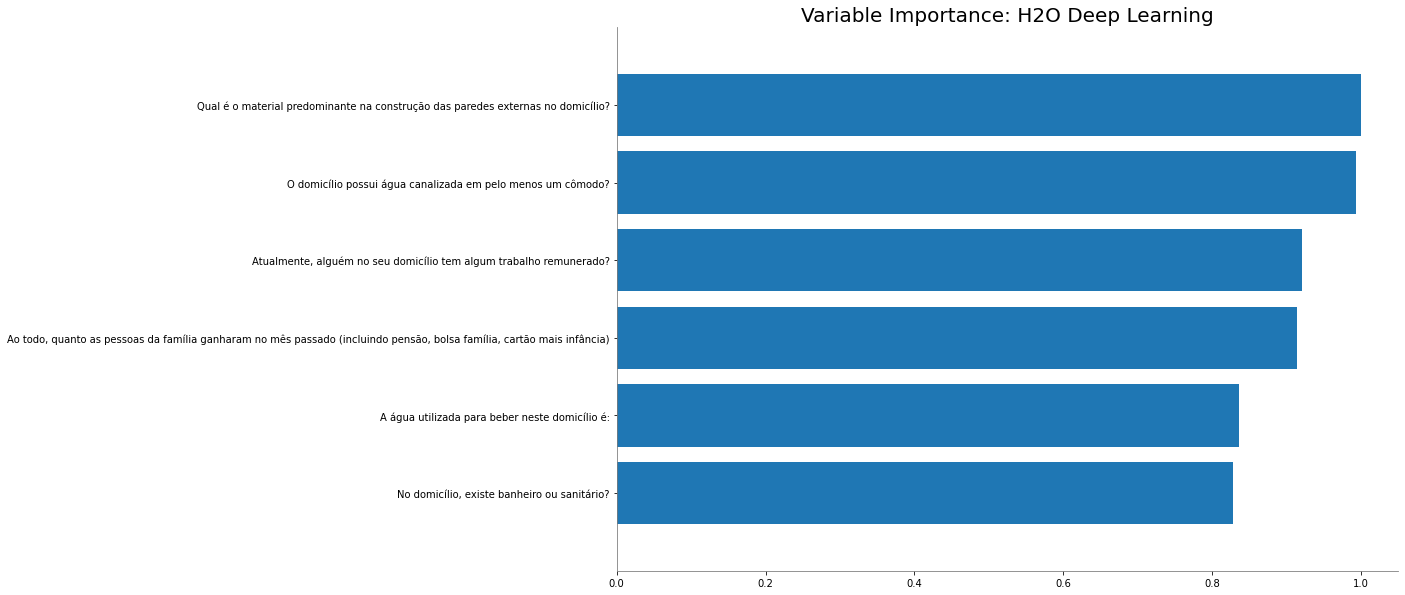

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_7

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Qual é o material predominante na construção das paredes externas no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  ----------
                                                                   0                      0                                                                                                                     0.412541                                                                                     0                                                              1                                                 0                                              1  grave
                                                                   0                      0                                                                                                                     0.480198                                                                                     0                                                              0                                                 0                                              1  grave
                                                                   0                      0                                                                                                                     0.450495                                                                                     0                                                              1                                                 1                                              1  moderada
                                                                   0                      0                                                                                                                     0.000990099                                                                                  0                                                              1                                                 1                                              1  moderada
                                                                   0                      0                                                                                                                     0.000930693                                                                                  0                                                              1                                                 0                                              0  moderada
                                                                   1                      0.166667                                                                                                              0.825083                                                                                     0                                                              1                                                 1                                              1  moderada
                                                                   0                      0                                                                                                                     0.288779      

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                  mean_per_class_error    logloss      rmse       mse
StackedEnsemble_AllModels_4_AutoML_2_20221126_13702                   0.728768    1.06552  0.619493  0.383772
GBM_grid_1_AutoML_2_20221126_13702_model_10                           0.730622    1.07351  0.630167  0.39711
GBM_grid_1_AutoML_2_20221126_13702_model_2                            0.730964    1.08017  0.633152  0.400881
DeepLearning_grid_2_AutoML_2_20221126_13702_model_1                   0.731591    1.08655  0.626384  0.392357
DRF_1_AutoML_2_20221126_13702                                         0.731608    1.19642  0.626633  0.392669
StackedEnsemble_BestOfFamily_5_AutoML_2_20221126_13702                0.731915    1.06394  0.61898   0.383137
GBM_grid_1_AutoML_2_20221126_13702_model_9                            0.732663    1.06926  0.625751  0.391564
GBM_grid_1_Aut

### Best Model Updated: df_SKBest_fclassif_7-StackedEnsemble_AllModels_4_AutoML_2_20221126_13702-acc:0.5237462636997675

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_fclassif_7-StackedEnsemble_AllModels_4_AutoML_2_20221126_13702-acc:0.5237462636997675

### df_SKBest_fclassif_7 has accuracy: 0.5237462636997675

### Details of the best model

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_4_AutoML_2_20221126_13702

No summary for this model

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.38331211914209784
RMSE: 0.6191220551249146
LogLoss: 1.051132464523962
Null degrees of freedom: 10018
Residual degrees of freedom: 9479
Null deviance: 21652.48898207357
Residual deviance: 21062.59232413115
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  --------------
464      3       2824        34        0.860451   2,861 / 3,325
30       1       567         23        0.99839    620 / 621
403      0       4740        117       0.0988593  520 / 5,260
46       0       704         63        0.922509   750 / 813
943      4       8835        237       0.474199   4,751 / 10,019

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.525801
2    0.859467
3    0.938417
4    1

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.3837715593958188
RMSE: 0.6194929857519121
LogLoss: 1.0655233027021163
Null degrees of freedom: 27091
Residual degrees of freedom: 26566
Null deviance: 58740.5136422688
Residual deviance: 57734.31463361147
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1357     2       7477        42        0.84715   7,521 / 8,878
110      1       1596        27        0.999423  1,733 / 1,734
1373     0       12754       139       0.105986  1,512 / 14,266
132      1       1998        83        0.962511  2,131 / 2,214
2972     4       23825       291       0.476045  12,897 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.523955
2    0.856526
3    0.935774
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.523954  0.0121165   0.517228      0.520532      0.540719      0.522242      0.540521      0.508185      0.505869      0.52969       0.533408      0.521147
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.476046  0.0121165   0.482772      0.479468      0.459281      0.477758      0.459479      0.491815      0.494131      0.47031       0.466592      0.478853
err_count                1289.7    39.8415     1275          1261          1252          1321          1253          1352          1347          1291          1243          1302
logloss                  1.06556   0.0113438   1.07483       1.06409       1.05735       1.07094       1.03869       1.07376       1.07501       1.06041       1.07378       1.0667
max_per_class_error      0.999454  0.00172802  1       

Variable importance plot is not available for this type of model (stackedensemble).
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_8

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    Qual é o material predominante na construção das paredes externas no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ---------------------------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  ----------
                                                                   1                      0.166667                                                                                                                 0.49505                                                                                  1                                                                                  1                                                              0                                                 1                                              0  grave
                                                                   0                      0                                                                                                                        0.453795                                                                                 1                                                                                  1                                                              1                                                 1                                              1  moderada
                                                                   0                      0                                                                                                                        0.577558                                                                                 1                                                                                  0                                                              1                                                 0                                              1  moderada
                                                                   0                      0                                                                                                                        0.412541                                                                                 1                                                                                  1                                                              0                                                 1                                              1  grave
                                                                   0                      0                                                                                                                        0.247525                                                                                 1                                                                                  1                                                              1                                                 0                                              1  moderada
                                                                   0                      0                              

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
DRF_1_AutoML_3_20221126_23805                                  0.728198    1.21245  0.628658  0.395211
GBM_grid_1_AutoML_3_20221126_23805_model_8                     0.728288    1.08352  0.633734  0.401618
XGBoost_grid_1_AutoML_3_20221126_23805_model_7                 0.72839     1.079    0.618774  0.382881
GBM_grid_1_AutoML_3_20221126_23805_model_1                     0.728702    1.07281  0.631736  0.399091
GBM_grid_1_AutoML_3_20221126_23805_model_10                    0.728812    1.08029  0.63397   0.401917
GBM_grid_1_AutoML_3_20221126_23805_model_12                    0.728858    1.07171  0.631598  0.398917
XGBoost_grid_1_AutoML_3_20221126_23805_model_10                0.729304    1.07808  0.618875  0.383006
GBM_grid_1_AutoML_3_20221126_23805_model_9                     0.7295

### df_SKBest_fclassif_8 has accuracy: 0.517103952175357

### Details of the best model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_3_20221126_23805


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 200                         4.52194e+06            20           20           20            569           2777          1797.28

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.39623011745006725
RMSE: 0.6294681226639418
LogLoss: 1.4563477230142658
Mean Per-Class Error: 0.7302210590209245
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1977     106     6676        119       0.777315  6,901 / 8,878
265      22      1409        38        0.987313  1,712 / 1,734
2264     134     11676       192       0.181551  2,590 / 14,266
266      37      1855        56        0.974706  2,158 / 2,214
4772     299     21616       405       0.493171  13,361 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.506829
2    0.830134
3    0.929906
4    1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.3952109475948853
RMSE: 0.6286580529945396
LogLoss: 1.2124471138278388
Mean Per-Class Error: 0.7281982499996087
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2033     102     6620        123       0.771007  6,845 / 8,878
262      22      1411        39        0.987313  1,712 / 1,734
2236     128     11695       207       0.180219  2,571 / 14,266
271      34      1852        57        0.974255  2,157 / 2,214
4802     286     21578       426       0.490366  13,285 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.509634
2    0.833087
3    0.931124
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.509634  0.00653857  0.512915      0.507749      0.509044      0.51089       0.500923      0.498339      0.514212      0.507198      0.51495       0.520118
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.490366  0.00653857  0.487085      0.492251      0.490956      0.48911       0.499077      0.501661      0.485788      0.492802      0.48505       0.479882
err_count                1328.5    17.7028     1320          1334          1330          1325          1352          1359          1316          1335          1314          1300
logloss    

<Figure size 432x288 with 0 Axes>

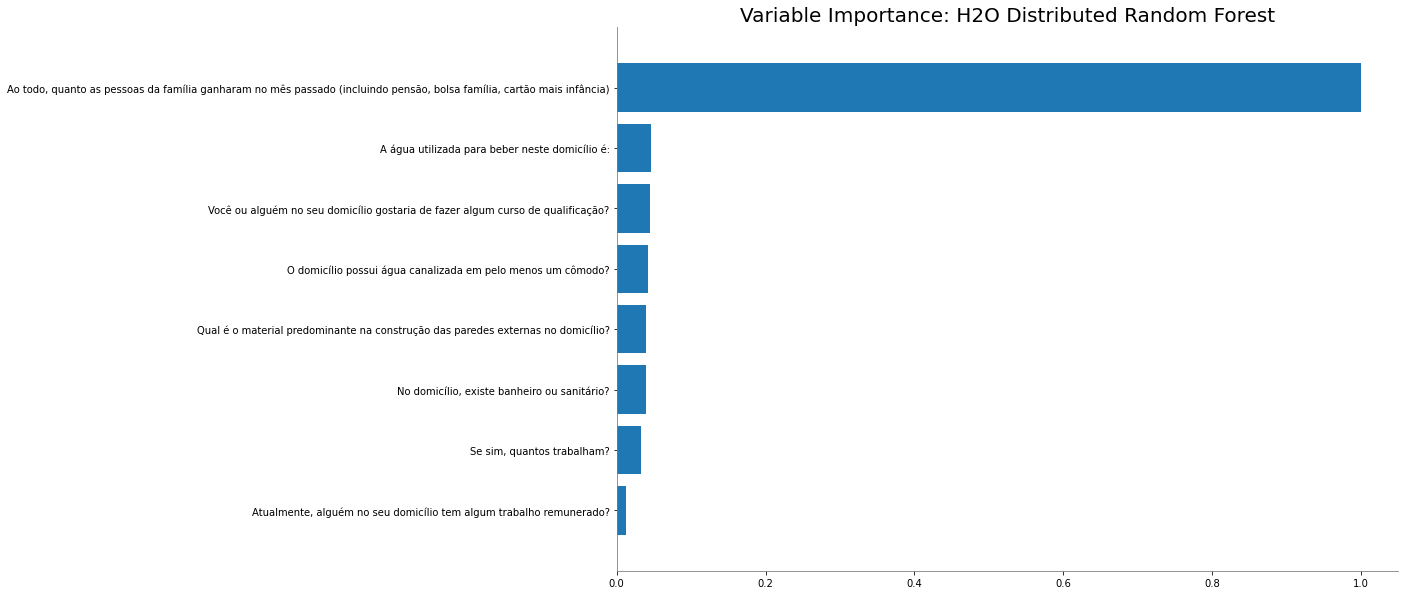

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_9

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.387789                                                                                 1                                                                                  0                                                                  0                                                              0                                                 1                                              1  grave
                                                                   0                      0                                                                                                                        0.223597                                                                                 0                                                                                  0                                                                  1                                                              1                                                 1                                              1  moderada
                                                                   1                      0.166667                                                                                                                 0.49505                                                                                  1                                                                                  0                                                                  1                                                              1                                                 0                                              1  moderada
                                                                   0                      0                                                                                                                        0.412541                                                                                 0                                                                                  0                                                                  0                                                              1                                                 1                                              1  moderada
                                                                   1                      0.166667                                                                                                                 0.412541                                                    

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
DRF_1_AutoML_4_20221126_33821                                  0.72314     1.70301  0.631107  0.398296
XGBoost_grid_1_AutoML_4_20221126_33821_model_7                 0.725385    1.0825   0.619153  0.383351
GBM_grid_1_AutoML_4_20221126_33821_model_2                     0.725441    1.07732  0.631377  0.398637
GBM_grid_1_AutoML_4_20221126_33821_model_8                     0.725593    1.08128  0.633018  0.400712
XGBoost_grid_1_AutoML_4_20221126_33821_model_10                0.726079    1.08041  0.618675  0.382759
GBM_grid_1_AutoML_4_20221126_33821_model_9                     0.726248    1.0725   0.62794   0.394308
XGBoost_grid_1_AutoML_4_20221126_33821_model_3                 0.726474    1.08924  0.619636  0.383949
XGBoost_2_AutoML_4_20221126_33821                              0.7266

### df_SKBest_fclassif_9 has accuracy: 0.5028229823978745

### Details of the best model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_4_20221126_33821


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 200                         5.66533e+06            20           20           20            1279          3406          2253.22

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.39902504815256673
RMSE: 0.6316842946856972
LogLoss: 2.1366493899402377
Mean Per-Class Error: 0.7249518173464012
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2196     135     6391        156       0.752647  6,682 / 8,878
258      28      1394        54        0.983852  1,706 / 1,734
2444     190     11337       295       0.205313  2,929 / 14,266
284      46      1791        93        0.957995  2,121 / 2,214
5182     399     20913       598       0.496014  13,438 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.503986
2    0.823564
3    0.918574
4    1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.398296452113219
RMSE: 0.6311073221831759
LogLoss: 1.7030064123827195
Mean Per-Class Error: 0.7231397166389741
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2228     133     6342        175       0.749043  6,650 / 8,878
276      29      1373        56        0.983276  1,705 / 1,734
2549     196     11239       282       0.212183  3,027 / 14,266
284      35      1780        115       0.948058  2,099 / 2,214
5337     393     20734       628       0.497601  13,481 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.502399
2    0.827181
3    0.926288
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.5024    0.0086193   0.493358      0.485609      0.49797       0.51089       0.508675      0.507937      0.50203       0.502769      0.500554      0.514212
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.4976    0.0086193   0.506642      0.514391      0.50203       0.48911       0.491325      0.492063      0.49797       0.497231      0.499446      0.485788
err_count                1348.1    23.5204     1373          1394          1360          1325          1331          1333          1349          1347          1353          1316
logloss     

<Figure size 432x288 with 0 Axes>

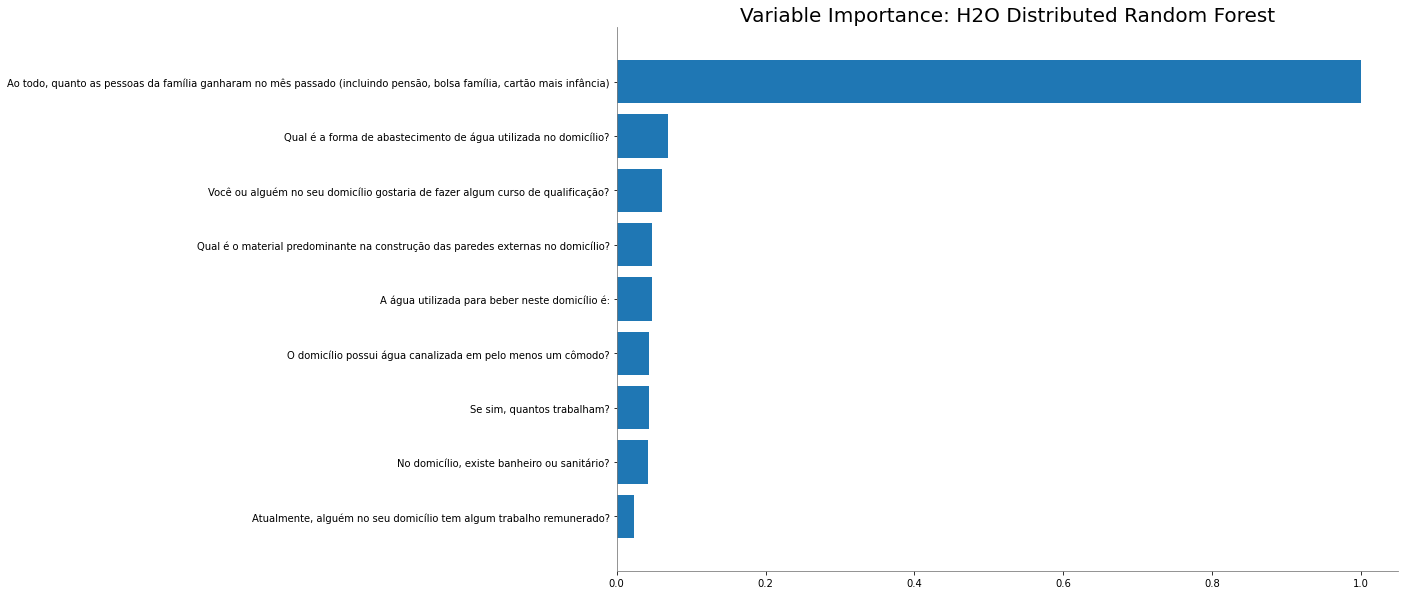

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_10

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.348185                                                                                 0                                                                                  0                                                                  1                                                              1                                                 1                                              1                                                             1  grave
                                                                   0                      0                                                                                                                        0.205446                                                                                 1                                                                                  0                                                                  0                                                              0                                                 1                                              1                                                             1  grave
                                                                   1                      0.166667                                                                                                                 0.825083                                                                                 1                                                                                  0                                                                  1                                                              1                                                 1                                              1                                                             1  moderada
                                                                   0                      0                                                                                                                        0.412541                                                                                 1                                                                                  0                                                                  1                                                              0                                                 0                      

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
XGBoost_grid_1_AutoML_5_20221126_43847_model_10                0.721863    1.08264  0.618601  0.382667
GBM_grid_1_AutoML_5_20221126_43847_model_10                    0.722246    1.07547  0.631724  0.399075
GBM_grid_1_AutoML_5_20221126_43847_model_2                     0.722596    1.07598  0.631764  0.399126
XGBoost_grid_1_AutoML_5_20221126_43847_model_3                 0.723079    1.08984  0.619079  0.383259
DRF_1_AutoML_5_20221126_43847                                  0.723119    1.70093  0.632634  0.400226
XGBoost_grid_1_AutoML_5_20221126_43847_model_16                0.723285    1.07016  0.616666  0.380276
XGBoost_grid_1_AutoML_5_20221126_43847_model_7                 0.723454    1.08418  0.618516  0.382562
XGBoost_grid_1_AutoML_5_20221126_43847_model_9                 0.7236

### df_SKBest_fclassif_10 has accuracy: 0.5224178013948855

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_5_20221126_43847_model_10


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.3360650998932298
RMSE: 0.5797112211206799
LogLoss: 0.9388389208299103
Mean Per-Class Error: 0.6645215264913695
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
3043     8       5793        34        0.657243   5,835 / 8,878
200      40      1471        23        0.976932   1,694 / 1,734
1177     2       13055       32        0.0848871  1,211 / 14,266
219      5       1855        135       0.939024   2,079 / 2,214
4639     55      22174       224       0.399343   10,819 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.600657
2    0.871733
3    0.962646
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.382667051083716
RMSE: 0.6186008818969756
LogLoss: 1.0826418424070288
Mean Per-Class Error: 0.7218631237189137
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2066     12      6758        42        0.76729   6,812 / 8,878
197      8       1507        22        0.995386  1,726 / 1,734
2091     10      12080       85        0.153231  2,186 / 14,266
225      8       1918        63        0.971545  2,151 / 2,214
4579     38      22263       212       0.475233  12,875 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.524767
2    0.852466
3    0.934113
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.524767  0.0106663   0.528044      0.525461      0.509782      0.521964      0.528608      0.530823      0.521964      0.521964      0.547804      0.511259
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.475233  0.0106663   0.471956      0.474539      0.490218      0.478036      0.471392      0.469177      0.478036      0.478036      0.452196      0.488741
err_count                1287.5    28.8762     1279          1286          1328          1295          1277          1271          1295          1295          1225          1324
logloss                  1.08264   0.0151214   1.0528        1.09958       1.09855       1.07581       1.07311       1.07548       1.08769       1.08774       1.07491       1.10074
max_per_class_error      0.995134  0.00505509  0.985611      0.994505      1             1             0.988701      0.994253      1             0.994012      1             0.994253
mean_per_class_accuracy  0.278156  0.00474904  0.27

<Figure size 432x288 with 0 Axes>

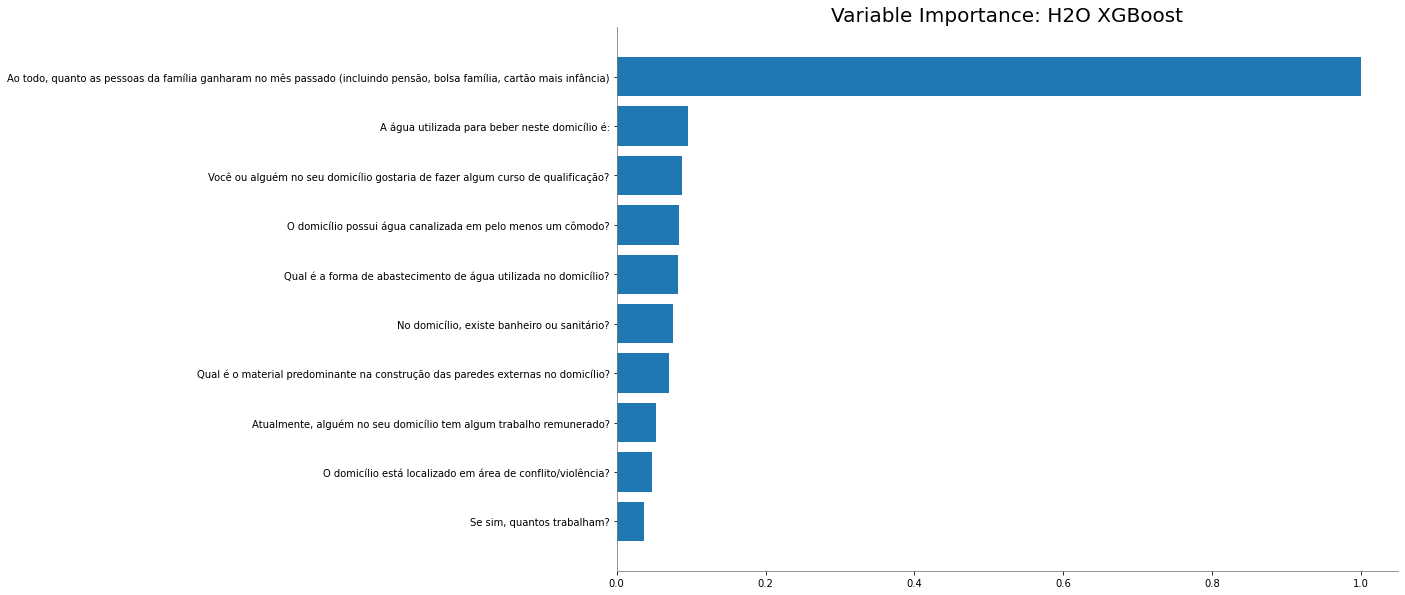

<Figure size 432x288 with 0 Axes>

In [ ]:
SKBest_fclassif_6 = [10, 12, 18, 20, 21, 22, 29]
SKBest_fclassif_7 = [10, 11, 12, 18, 20, 21, 22, 29]
SKBest_fclassif_8 = [10, 11, 12, 14, 18, 20, 21, 22, 29]
SKBest_fclassif_9 = [10, 11, 12, 14, 18, 19, 20, 21, 22, 29]
SKBest_fclassif_10 = [10, 11, 12, 14, 18, 19, 20, 21, 22, 28, 29]

df_SKBest_fclassif_6 = df[SKBest_fclassif_6]
df_SKBest_fclassif_7 = df[SKBest_fclassif_7]
df_SKBest_fclassif_8 = df[SKBest_fclassif_8]
df_SKBest_fclassif_9 = df[SKBest_fclassif_9]
df_SKBest_fclassif_10 = df[SKBest_fclassif_10]

feature_combinations = {
    'df_SKBest_fclassif_6' : df[SKBest_fclassif_6],
    'df_SKBest_fclassif_7' : df[SKBest_fclassif_7],
    'df_SKBest_fclassif_8' : df[SKBest_fclassif_8],
    'df_SKBest_fclassif_9' : df[SKBest_fclassif_9],
    'df_SKBest_fclassif_10' : df[SKBest_fclassif_10]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_11

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.412541                                                                                 0                                                                                  1                                                                  0                                                              0                                                 0                                              1                                                                           1                                                             1  grave
                                                                   0                      0                                                                                                                        0.39604                                                                                  0                                                                                  0                                                                  0                                                              0                                                 0                                              0                                                                           1                                                             0  grave
                                                                   1                      0.166667                                                                                                                 0.437294                                                                                 1                                                                                  1                                                                  1                                                              1                                                 1                                              1                                                                           1                                                             1  moderada
                                                                   0                      0                                                                                                                   

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_1_20221126_201500_model_10                    0.720214    1.07582  0.63235   0.399866
XGBoost_grid_1_AutoML_1_20221126_201500_model_3                 0.720903    1.09277  0.619136  0.383329
XGBoost_grid_1_AutoML_1_20221126_201500_model_9                 0.720927    1.07524  0.617391  0.381171
GBM_grid_1_AutoML_1_20221126_201500_model_2                     0.721173    1.07628  0.631699  0.399044
DRF_1_AutoML_1_20221126_201500                                  0.721486    1.72059  0.633494  0.401314
XGBoost_grid_1_AutoML_1_20221126_201500_model_10                0.721968    1.08028  0.617247  0.380993
GBM_grid_1_AutoML_1_20221126_201500_model_8                     0.72209     1.07998  0.631499  0.398791
XGBoost_2_AutoML_1_20221126_201500                           

### Best Model Updated: df_SKBest_fclassif_11-GBM_grid_1_AutoML_1_20221126_201500_model_10-acc:0.5190966456326802

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_fclassif_11-GBM_grid_1_AutoML_1_20221126_201500_model_10-acc:0.5190966456326802

### df_SKBest_fclassif_11 has accuracy: 0.5190966456326802

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20221126_201500_model_10


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    39                 156                         345167                 0            13           6.41026       1             460           171.769

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3744256405907747
RMSE: 0.61190329349561
LogLoss: 1.0012067346435443
Mean Per-Class Error: 0.6865331176921015
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
3139     4       5721        14        0.646429  5,739 / 8,878
235      5       1475        19        0.997116  1,729 / 1,734
1829     0       12403       34        0.13059   1,863 / 14,266
227      2       1923        62        0.971996  2,152 / 2,214
5430     11      21522       129       0.423852  11,483 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.576148
2    0.865828
3    0.960763
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.3998660301956366
RMSE: 0.6323496107341544
LogLoss: 1.0758158679237315
Mean Per-Class Error: 0.7202144001958947
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2425     0       6432        21        0.726853  6,453 / 8,878
247      1       1463        23        0.999423  1,733 / 1,734
2399     5       11803       59        0.172648  2,463 / 14,266
234      2       1938        40        0.981933  2,174 / 2,214
5305     8       21636       143       0.473313  12,823 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.526687
2    0.854939
3    0.93308
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.526724  0.00928468  0.520664      0.521402      0.531561      0.52344       0.521226      0.509782      0.538206      0.533776      0.527132      0.540052
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.473276  0.00928468  0.479336      0.478598      0.468439      0.47656       0.478774      0.490218      0.461794      0.466224      0.472868      0.459948
err_count                1282.2    25.2182     1299          1297          1269          1291          1297          1328          1251          1263          1281          1

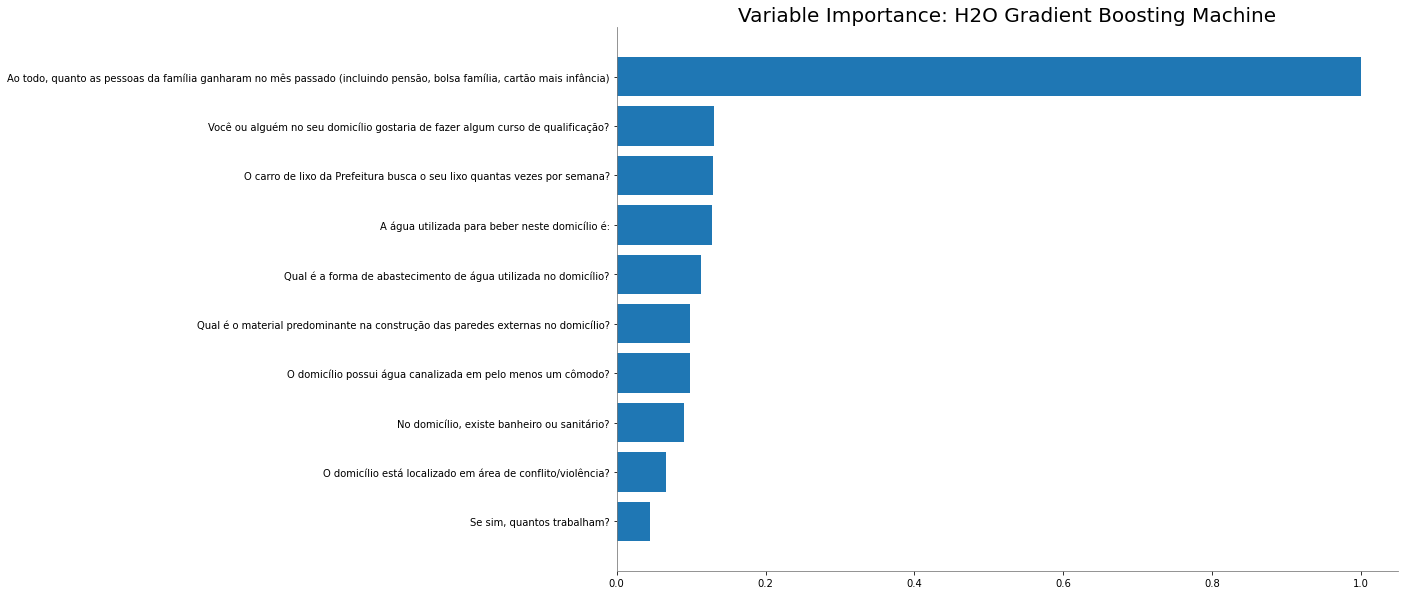

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_12

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                             0                                                                                                                 0.205446                                                                                 1                                                                                  0                                                                  0                                                              0                                                 0                                              0                                                                           0                                                                                                 0                                                             1  grave
                                                                   0                             0                                                                                                                 0.412541                                                                                 0                                                                                  0                                                                  1                                                              0                                                 0                                              1                                                                           1                                                                                                 0                                                             1  moderada
                                                                   0                             0                                                                                                                 0.412541                                                                                 1                                                                                  0                                                                  1                                                              1                                                 1       

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_2_20221126_211521_model_2                     0.719542    1.07817  0.632179  0.39965
XGBoost_2_AutoML_2_20221126_211521                              0.720048    1.07716  0.617446  0.38124
XGBoost_grid_1_AutoML_2_20221126_211521_model_9                 0.720093    1.07845  0.617574  0.381398
GBM_grid_1_AutoML_2_20221126_211521_model_10                    0.720335    1.07493  0.630728  0.397818
XGBoost_grid_1_AutoML_2_20221126_211521_model_3                 0.720465    1.09394  0.619186  0.383391
XGBoost_grid_1_AutoML_2_20221126_211521_model_7                 0.720796    1.08528  0.618024  0.381954
XGBoost_grid_1_AutoML_2_20221126_211521_model_11                0.720983    1.07548  0.617473  0.381273
XGBoost_grid_1_AutoML_2_20221126_211521_model_1                

### Best Model Updated: df_SKBest_fclassif_12-GBM_grid_1_AutoML_2_20221126_211521_model_2-acc:0.5230820325473264

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_fclassif_12-GBM_grid_1_AutoML_2_20221126_211521_model_2-acc:0.5230820325473264

### df_SKBest_fclassif_12 has accuracy: 0.5230820325473264

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20221126_211521_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 160                         357243                 0            11           5.6375        1             445           173.275

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.36556827636487577
RMSE: 0.6046224246295169
LogLoss: 0.9825018769092605
Mean Per-Class Error: 0.6733979805424298
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
3217     1       5633        27        0.637644  5,661 / 8,878
238      14      1464        18        0.991926  1,720 / 1,734
1701     2       12515       48        0.122739  1,751 / 14,266
228      2       1854        130       0.941283  2,084 / 2,214
5384     19      21466       223       0.413997  11,216 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.586003
2    0.870478
3    0.960616
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.39965004573043256
RMSE: 0.6321788083528525
LogLoss: 1.0781712724230574
Mean Per-Class Error: 0.7195418530600153
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2439     3       6396        40        0.725276  6,439 / 8,878
260      3       1452        19        0.99827   1,731 / 1,734
2488     5       11680       93        0.18127   2,586 / 14,266
250      5       1900        59        0.973351  2,155 / 2,214
5437     16      21428       211       0.476561  12,911 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.523439
2    0.853093
3    0.932415
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.523476  0.00744089  0.521402      0.521402      0.522702      0.517165      0.518642      0.531931      0.531561      0.51089       0.534884      0.524179
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.476524  0.00744089  0.478598      0.478598      0.477298      0.482835      0.481358      0.468069      0.468439      0.48911       0.465116      0.475821
err_count                1291      20.188      1297          1297          1293          1308          1304          1268          1269          1325          1260       

<Figure size 432x288 with 0 Axes>

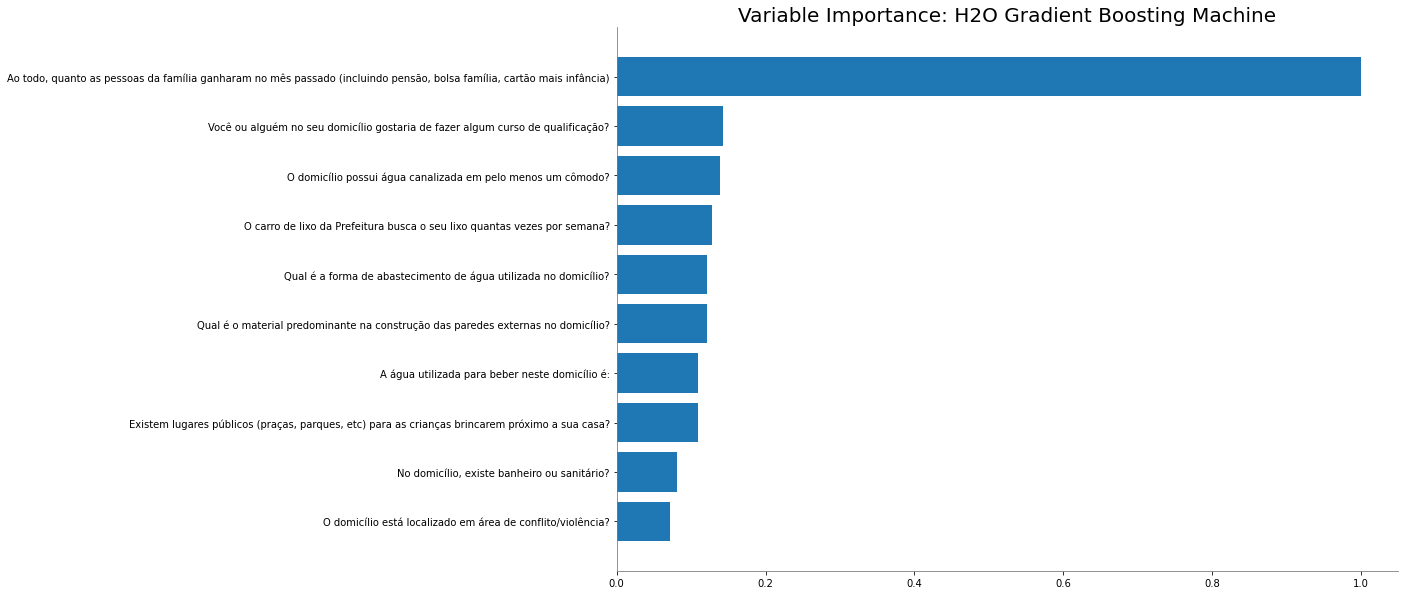

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_13

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.49505                                                                                  0                                                                                  0                                                                  1                                                              1                                                 1                                              1                                                                           1                                                                                                 0                                                                                                                                                                               0                                                             0  grave
                                                                   0                      0                                                                                                                        0.223597                                                                                 0                                                                                  1                                                                  0                                                              0                                                 0                                              1                                                                           0                                                                                                 1                                                                                                                    

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_3_20221126_221555_model_2                     0.717845    1.07718  0.630903  0.398038
XGBoost_1_AutoML_3_20221126_221555                              0.718652    1.081    0.618296  0.38229
GBM_grid_1_AutoML_3_20221126_221555_model_10                    0.718898    1.07333  0.629501  0.396271
XGBoost_grid_1_AutoML_3_20221126_221555_model_9                 0.720441    1.07779  0.617265  0.381016
XGBoost_grid_1_AutoML_3_20221126_221555_model_10                0.720568    1.08638  0.617954  0.381867
XGBoost_grid_1_AutoML_3_20221126_221555_model_7                 0.720704    1.08736  0.618381  0.382395
GBM_grid_1_AutoML_3_20221126_221555_model_11                    0.721012    1.07508  0.625137  0.390796
GBM_grid_1_AutoML_3_20221126_221555_model_8                   

### Best Model Updated: df_SKBest_fclassif_13-GBM_grid_1_AutoML_3_20221126_221555_model_2-acc:0.524078379275988

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_SKBest_fclassif_13-GBM_grid_1_AutoML_3_20221126_221555_model_2-acc:0.524078379275988

### df_SKBest_fclassif_13 has accuracy: 0.524078379275988

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20221126_221555_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    37                 148                         366174                 0            11           6.24324       1             467           192.541

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.36144989591887366
RMSE: 0.6012070324928623
LogLoss: 0.9730942942147802
Mean Per-Class Error: 0.6633104102969565
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
3460     1       5390        27        0.610273  5,418 / 8,878
242      9       1462        21        0.99481   1,725 / 1,734
1725     1       12490       50        0.124492  1,776 / 14,266
236      2       1807        169       0.923668  2,045 / 2,214
5663     13      21149       267       0.404695  10,964 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.595305
2    0.870552
3    0.962203
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.39803797502927324
RMSE: 0.6309025083396588
LogLoss: 1.0771816844208109
Mean Per-Class Error: 0.7178453944422702
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2483     2       6353        40        0.72032   6,395 / 8,878
254      2       1445        33        0.998847  1,732 / 1,734
2458     4       11695       109       0.180219  2,571 / 14,266
273      3       1876        62        0.971996  2,152 / 2,214
5468     11      21369       244       0.47431   12,850 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.52569
2    0.853241
3    0.93153
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.525616  0.00686308  0.534317      0.523985      0.521226      0.534145      0.520118      0.533776      0.526024      0.528239      0.519011      0.515319
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.474384  0.00686308  0.465683      0.476015      0.478774      0.465855      0.479882      0.466224      0.473976      0.471761      0.480989      0.484681
err_count                1285.2    18.54       1262          1290          1297          1262          1300          1263          1284          1278          1303         

<Figure size 432x288 with 0 Axes>

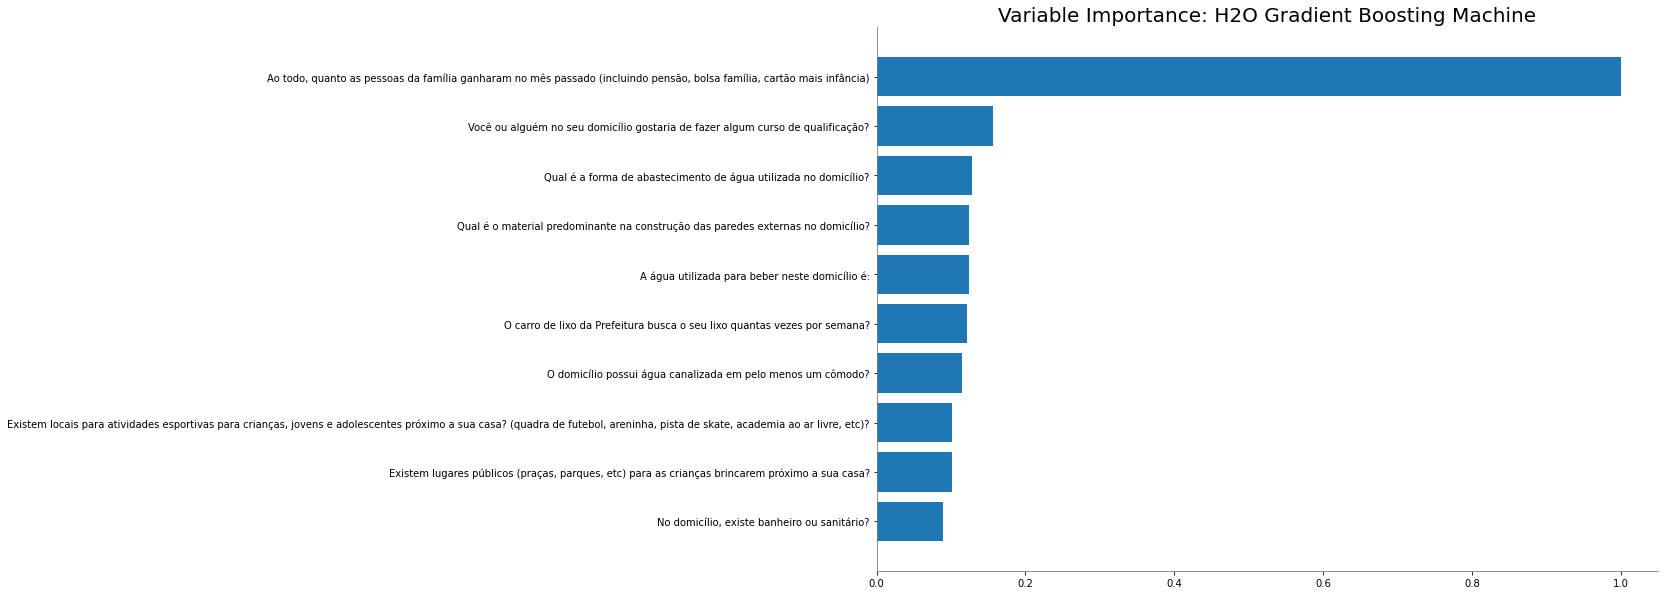

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_14

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                             0                                                                                                                0.330033                                                                                  1                                0                                                                                  0                                                                  0                                                              0                                                 1                                              1                                                                           1                                                                                                 0                                                                                                                                                                               0                                                             1  moderada
                                                                   0                             0                                                                                                                1                                                                                         1                                1                                                                                  1                                                                  0                                                              0                                                 0                                              0                                                                           1                                                                               

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_4_20221126_231618_model_2                     0.718597    1.07444  0.629101  0.395768
XGBoost_grid_1_AutoML_4_20221126_231618_model_7                 0.719089    1.08864  0.617918  0.381822
XGBoost_grid_1_AutoML_4_20221126_231618_model_9                 0.719409    1.08278  0.618186  0.382154
XGBoost_grid_1_AutoML_4_20221126_231618_model_1                 0.71957     1.10461  0.618351  0.382358
XGBoost_2_AutoML_4_20221126_231618                              0.719781    1.07983  0.617621  0.381455
GBM_grid_1_AutoML_4_20221126_231618_model_10                    0.720061    1.07676  0.631541  0.398844
XGBoost_grid_1_AutoML_4_20221126_231618_model_3                 0.720121    1.09486  0.618554  0.382609
XGBoost_1_AutoML_4_20221126_231618                           

### df_SKBest_fclassif_14 has accuracy: 0.5177681833277981

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_4_20221126_231618_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 160                         387078                 0            11           5.56875       1             481           188.175

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3569589911681808
RMSE: 0.597460451551549
LogLoss: 0.9615684534209782
Mean Per-Class Error: 0.65961538386858
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
3533     2       5317        26        0.60205   5,345 / 8,878
228      27      1459        20        0.984429  1,707 / 1,734
1671     3       12545       47        0.120636  1,721 / 14,266
227      4       1831        152       0.931346  2,062 / 2,214
5659     36      21152       245       0.399934  10,835 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.600066
2    0.874317
3    0.967887
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.3957684037563736
RMSE: 0.6291012666943007
LogLoss: 1.0744409047002579
Mean Per-Class Error: 0.718596651501894
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2509     4       6326        39        0.717391  6,369 / 8,878
264      5       1440        25        0.997116  1,729 / 1,734
2546     4       11605       111       0.186527  2,661 / 14,266
272      5       1878        59        0.973351  2,155 / 2,214
5591     18      21249       234       0.476672  12,914 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.523328
2    0.852835
3    0.934003
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.523328  0.00991451  0.522878      0.514022      0.540052      0.541528      0.516796      0.513843      0.519011      0.519749      0.526024      0.51938
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.476672  0.00991451  0.477122      0.485978      0.459948      0.458472      0.483204      0.486157      0.480989      0.480251      0.473976      0.48062
err_count                1291.4    26.9122     1293          1317          1246          1242          1309          1317          1303          1301          1284          1302


<Figure size 432x288 with 0 Axes>

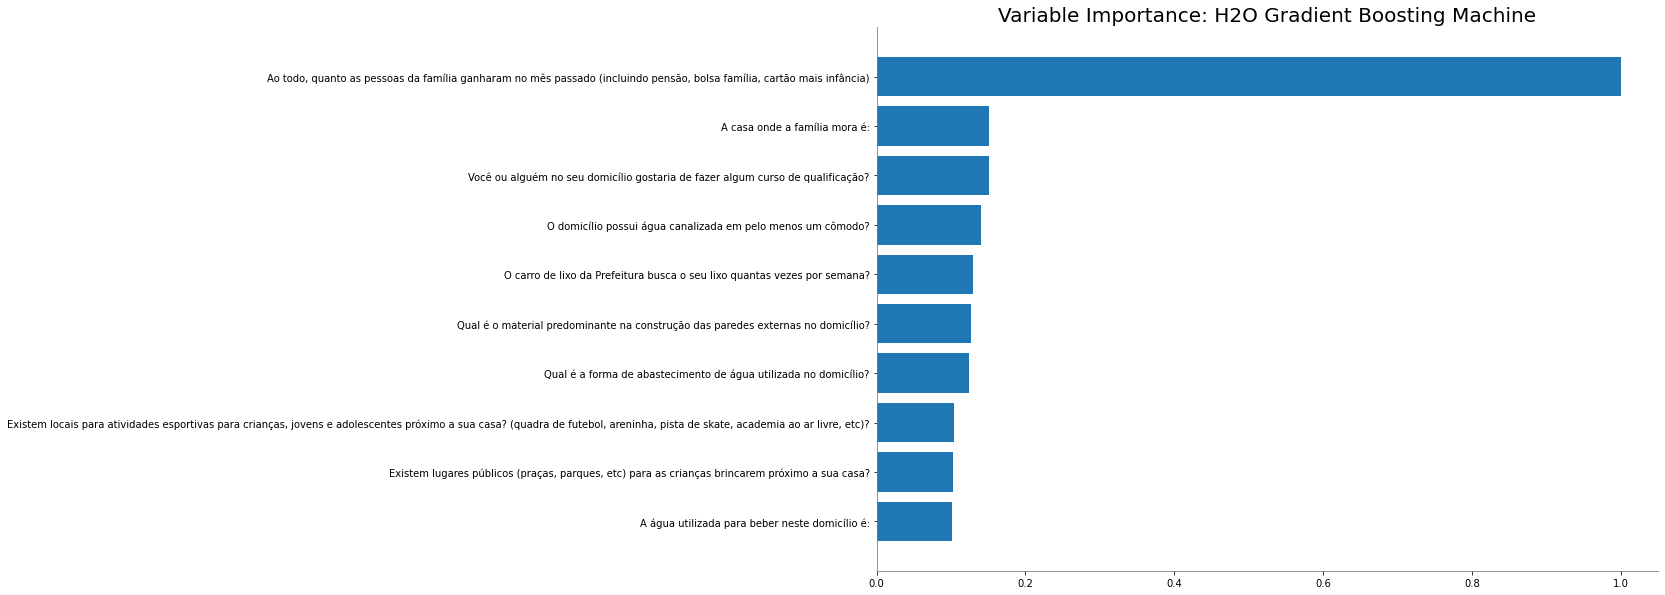

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_SKBest_fclassif_15

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                             0                                                                                                                 0.205446                                                                                 1       0                                1                                                                                  0                                                                  1                                                              1                                                 1                                              1                                                                           1                                                                                                 1                                                                                                                                                                               1                                                             1  leve
                                                                   0                             0                                                                                                                 0.49505                                                                                  0       1                                0                                                                                  0                                                                  1                                                              1                                                 1                                              1                                                                           0                                                   

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_5_20221127_01637_model_8                     0.714484    1.07686  0.629995  0.396893
XGBoost_grid_1_AutoML_5_20221127_01637_model_1                 0.714607    1.10691  0.617804  0.381682
XGBoost_grid_1_AutoML_5_20221127_01637_model_7                 0.715556    1.09202  0.617476  0.381276
GBM_grid_1_AutoML_5_20221127_01637_model_9                     0.716083    1.0688   0.624044  0.389431
XGBoost_grid_1_AutoML_5_20221127_01637_model_11                0.716231    1.07389  0.615829  0.379246
GBM_grid_1_AutoML_5_20221127_01637_model_2                     0.716284    1.07187  0.628216  0.394656
XGBoost_grid_1_AutoML_5_20221127_01637_model_10                0.717002    1.09256  0.617656  0.381499
XGBoost_1_AutoML_5_20221127_01637                              0.7171

### df_SKBest_fclassif_15 has accuracy: 0.5131185652607108

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_5_20221127_01637_model_8


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 120                         462898                 10           10           6.83333       1             571           302.975

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3457634641696356
RMSE: 0.5880165509317196
LogLoss: 0.9347519104041278
Mean Per-Class Error: 0.628070066715478
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
3732     2       5124        20        0.579635  5,146 / 8,878
203      73      1436        22        0.957901  1,661 / 1,734
1437     1       12777       51        0.104374  1,489 / 14,266
187      1       1739        287       0.87037   1,927 / 2,214
5559     77      21076       380       0.377344  10,223 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.622656
2    0.883434
3    0.96785
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.39689330915088966
RMSE: 0.6299946897799137
LogLoss: 1.0768573837766993
Mean Per-Class Error: 0.7144844192466261
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2544     10      6285        39        0.713449  6,334 / 8,878
242      5       1453        34        0.997116  1,729 / 1,734
2484     18      11603       161       0.186668  2,663 / 14,266
275      10      1842        87        0.960705  2,127 / 2,214
5545     43      21183       321       0.47442   12,853 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.525579
2    0.85254
3    0.932452
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.525579  0.00692773  0.539852      0.526568      0.520118      0.526763      0.520856      0.526394      0.5323        0.517165      0.527501      0.518272
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.474421  0.00692773  0.460148      0.473432      0.479882      0.473237      0.479144      0.473606      0.4677        0.482835      0.472499      0.481728
err_count                1285.3    18.6551     1247          1283          1300          1282          1298          1283          1267          1308          1280          13

<Figure size 432x288 with 0 Axes>

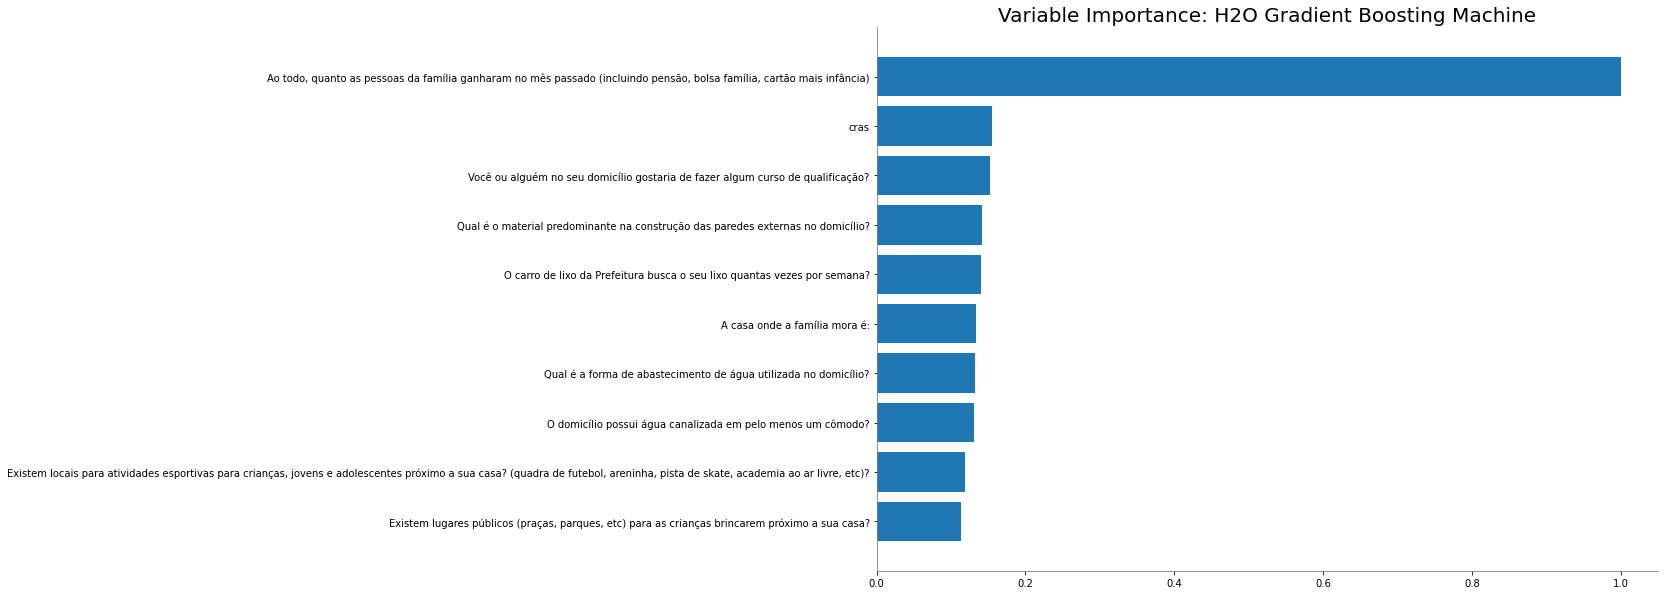

<Figure size 432x288 with 0 Axes>

In [9]:
SKBest_fclassif_11 = [10, 11, 12, 14, 18, 19, 20, 21, 22, 23, 28, 29]
SKBest_fclassif_12 = [10, 11, 12, 14, 18, 19, 20, 21, 22, 23, 25, 28, 29]
SKBest_fclassif_13 = [10, 11, 12, 14, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29]
SKBest_fclassif_14 = [10, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29]
SKBest_fclassif_15 = [10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29]

df_SKBest_fclassif_11 = df[SKBest_fclassif_11]
df_SKBest_fclassif_12 = df[SKBest_fclassif_12]
df_SKBest_fclassif_13 = df[SKBest_fclassif_13]
df_SKBest_fclassif_14 = df[SKBest_fclassif_14]
df_SKBest_fclassif_15 = df[SKBest_fclassif_15]

feature_combinations = {
    'df_SKBest_fclassif_11' : df[SKBest_fclassif_11],
    'df_SKBest_fclassif_12' : df[SKBest_fclassif_12],
    'df_SKBest_fclassif_13' : df[SKBest_fclassif_13],
    'df_SKBest_fclassif_14' : df[SKBest_fclassif_14],
    'df_SKBest_fclassif_15' : df[SKBest_fclassif_15]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

# Recursive Feature Elimination (RFE)

### Decision Tree Classifier

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_1

Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)  ia level
-----------------------------------------------------------------------------------------------------------------------  ----------
                                                                                                               0.268977  grave
                                                                                                               0.326733  moderada
                                                                                                               0.288779  grave
                                                                                                               0.412541  moderada
                                                                                                               0.189769  moderada
                                                                                                               0.412541  grave
                                                                                                               0.434818  moderada
                                                                                                               0.30363   moderada
                                                                                                               0.660066  moderada
                                                                                                               0.412541  moderada
[27092 rows x 2 columns]

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_1_20221123_151105_model_3                    0.746482    1.11433  0.63294   0.400613
XGBoost_grid_1_AutoML_1_20221123_151105_model_9                0.747431    1.08387  0.623306  0.388511
XRT_1_AutoML_1_20221123_151105                                 0.747452    1.2967   0.625774  0.391593
XGBoost_2_AutoML_1_20221123_151105                             0.747517    1.08484  0.623625  0.388909
XGBoost_1_AutoML_1_20221123_151105                             0.747629    1.08382  0.623591  0.388866
GBM_grid_1_AutoML_1_20221123_151105_model_9                    0.747632    1.09649  0.643035  0.413493
GBM_grid_1_AutoML_1_20221123_151105_model_4                    0.747735    1.09621  0.642884  0.4133
GBM_grid_1_AutoML_1_20221123_151105_model_23                   0.74795 

### Best Model Updated: df_RFE_DTC_1-GBM_grid_1_AutoML_1_20221123_151105_model_3-acc:0.515775489870475

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_RFE_DTC_1-GBM_grid_1_AutoML_1_20221123_151105_model_3-acc:0.515775489870475

### df_RFE_DTC_1 has accuracy: 0.515775489870475

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20221123_151105_model_3


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    28                 112                         723854                 15           15           15            237           645           510.179

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3802338464680447
RMSE: 0.6166310456569996
LogLoss: 1.037048737768903
Mean Per-Class Error: 0.7259270423439316
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
834      3       8029        12        0.90606    8,044 / 8,878
93       30      1611        0         0.982699   1,704 / 1,734
513      7       13737       9         0.0370812  529 / 14,266
116      1       2048        49        0.977868   2,165 / 2,214
1556     41      25425       70        0.45925    12,442 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.54075
2    0.859479
3    0.944744
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.4006130047346317
RMSE: 0.632939969297746
LogLoss: 1.1143329076689261
Mean Per-Class Error: 0.7464822819254051
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
618      15      8225        20        0.93039    8,260 / 8,878
99       4       1626        5         0.997693   1,730 / 1,734
841      37      13357       31        0.0637179  909 / 14,266
123      4       2074        13        0.994128   2,201 / 2,214
1681     60      25282       69        0.483538   13,100 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.516462
2    0.847704
3    0.931751
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.515576  0.0089759   0.51476       0.519188      0.533038      0.510151      0.521595      0.517534      0.507937      0.499815      0.519749      0.511997
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.484424  0.0089759   0.48524       0.480812      0.466962      0.489849      0.478405      0.482466      0.492063      0.500185      0.480251      0.488003
err_count                1312.4    24.3        1315          1303          1265          1327          1296          1307          1333          1355          1301  

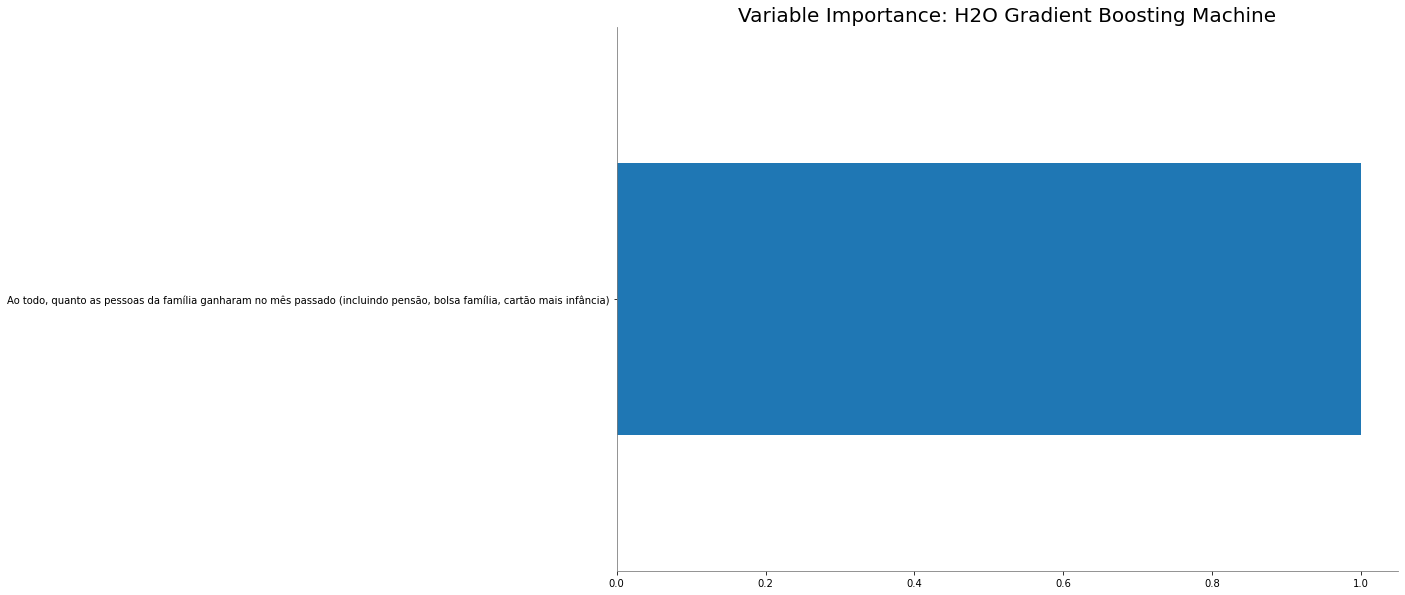

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_2

Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)  ia level
----------------------------  -----------------------------------------------------------------------------------------------------------------------  ----------
                    0                                                                                                                        0.412541  grave
                    0                                                                                                                        0.412541  moderada
                    0                                                                                                                        0.123762  moderada
                    0                                                                                                                        0.330033  moderada
                    0                                                                                                                        0.25165   grave
                    0.166667                                                                                                                 0.577558  grave
                    0                                                                                                                        0.412541  moderada
                    0                                                                                                                        0.49505   leve
                    0                                                                                                                        0.354785  moderada
                    0                                                                                                                        0.412541  leve
[27092 rows x 3 columns]

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
XGBoost_1_AutoML_2_20221123_161111                                  0.747568    1.07999  0.623278  0.388476
GBM_grid_1_AutoML_2_20221123_161111_model_3                         0.74771     1.09691  0.631244  0.398469
XGBoost_grid_1_AutoML_2_20221123_161111_model_7                     0.747742    1.08218  0.623319  0.388527
XGBoost_grid_1_AutoML_2_20221123_161111_model_10                    0.747863    1.08184  0.623417  0.388649
XGBoost_grid_1_AutoML_2_20221123_161111_model_1                     0.747934    1.08898  0.624686  0.390233
StackedEnsemble_AllModels_4_AutoML_2_20221123_161111                0.747946    1.08327  0.624925  0.390532
GBM_grid_1_AutoML_2_20221123_161111_model_11                        0.748217    1.08159  0.631759  0.399119
XGBoost_grid_1_AutoML_2_20221

### Best Model Updated: df_RFE_DTC_2-XGBoost_1_AutoML_2_20221123_161111-acc:0.523414148123547

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_RFE_DTC_2-XGBoost_1_AutoML_2_20221123_161111-acc:0.523414148123547

### df_RFE_DTC_2 has accuracy: 0.523414148123547

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_2_20221123_161111


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.3814367059662031
RMSE: 0.617605623327867
LogLoss: 1.0576027627050513
Mean Per-Class Error: 0.7404626141392877
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
561      0       8317        0         0.93681   8,317 / 8,878
73       0       1661        0         1         1,734 / 1,734
383      0       13883       0         0.026847  383 / 14,266
76       0       2134        4         0.998193  2,210 / 2,214
1093     0       25995       4         0.466706  12,644 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.533294
2    0.855972
3    0.941459
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.3884755620912673
RMSE: 0.6232780776597773
LogLoss: 1.0799926616068318
Mean Per-Class Error: 0.7475682772153514
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
411      0       8467        0         0.953706   8,467 / 8,878
72       0       1661        1         1          1,734 / 1,734
540      0       13725       1         0.0379223  541 / 14,266
78       0       2133        3         0.998645   2,211 / 2,214
1101     0       25986       5         0.478112   12,953 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.521888
2    0.854828
3    0.935442
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.521888  0.0119809   0.526199      0.536162      0.52787       0.52381       0.516796      0.519011      0.528608      0.535622      0.501292      0.503507
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.478112  0.0119809   0.473801      0.463838      0.47213       0.47619       0.483204      0.480989      0.471392      0.464378      0.498708      0.496493
err_count                1295.3    32.3764     1284          1257          1279          1290          1309          1303          1277          1258          1351          1345
logloss                  1.07999   0.0186651   1.08656       1.05836       1.07726       1.06734       1.09434       1.08424       1.07123       1.05026       1.10675       1.10358
max_per_class_error      1         0           1             1             1             1             1             1             1             1             1             1
mean_per_class_accuracy  0.252451  0.00133198  0.253051      0.253918      

<Figure size 432x288 with 0 Axes>

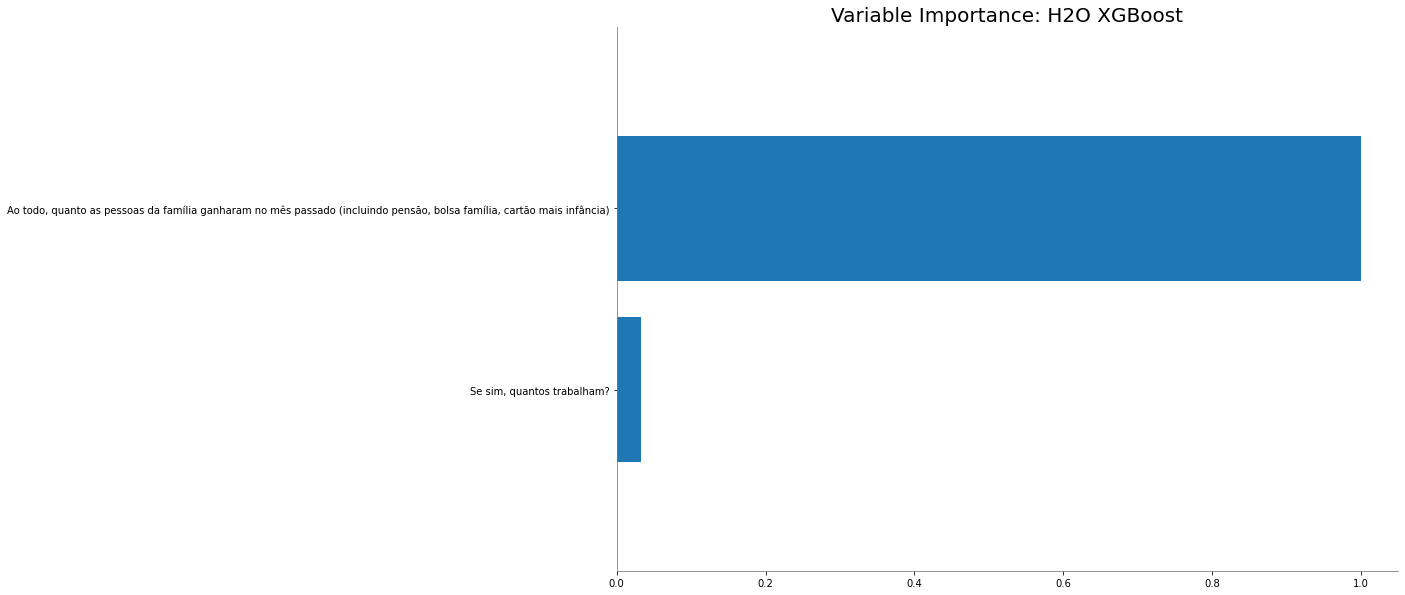

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_3

Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    A casa onde a família mora é:  ia level
----------------------------  -----------------------------------------------------------------------------------------------------------------------  -------------------------------  ----------
                    0                                                                                                                        0.412541                                0  grave
                    0.166667                                                                                                                 0.330033                                1  sem ia
                    0                                                                                                                        0.585809                                0  grave
                    0.333333                                                                                                                 0.742574                                1  moderada
                    0                                                                                                                        0.288779                                1  grave
                    0                                                                                                                        0.247525                                1  grave
                    0.166667                                                                                                                 0.577558                                1  moderada
                    0                                                                                                                        0.371287                                1  moderada
                    0                                                                                                                        0.412541                                1  moderada
                    0                                                                                                                        0.377888                                1  moderada
[27092 rows x 4 columns]

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_3_20221123_171153_model_2                         0.744978    1.09694  0.643121  0.413605
GBM_grid_1_AutoML_3_20221123_171153_model_8                         0.74591     1.09332  0.641182  0.411115
XGBoost_grid_1_AutoML_3_20221123_171153_model_3                     0.746243    1.08509  0.623205  0.388385
DeepLearning_grid_2_AutoML_3_20221123_171153_model_1                0.746434    1.09945  0.626369  0.392338
GBM_grid_1_AutoML_3_20221123_171153_model_3                         0.746832    1.0892   0.629971  0.396864
GBM_grid_1_AutoML_3_20221123_171153_model_11                        0.746927    1.08566  0.635639  0.404036
XGBoost_grid_1_AutoML_3_20221123_171153_model_1                     0.7475      1.07714  0.622682  0.387733
XGBoost_grid_1_AutoML_3_20221

### df_RFE_DTC_3 has accuracy: 0.5224178013948855

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20221123_171153_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    42                 168                         146050                 0            11           4.63095       1             235           64.3929

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.4057425504471927
RMSE: 0.6369792386312074
LogLoss: 1.0708835151395806
Mean Per-Class Error: 0.7338122794253992
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
794      0       8072        12        0.910565   8,084 / 8,878
82       0       1650        2         1          1,734 / 1,734
522      0       13727       17        0.0377821  539 / 14,266
95       0       2090        29        0.986902   2,185 / 2,214
1493     0       25539       60        0.462941   12,542 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.537059
2    0.858076
3    0.939613
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.41360484530931546
RMSE: 0.6431211746703069
LogLoss: 1.0969448155622967
Mean Per-Class Error: 0.7449784131628019
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
563      0       8300        15        0.936585   8,315 / 8,878
90       0       1641        3         1          1,734 / 1,734
719      0       13519       28        0.0523623  747 / 14,266
101      0       2093        20        0.990967   2,194 / 2,214
1473     0       25553       66        0.479477   12,990 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.520523
2    0.853905
3    0.928097
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.520523  0.0121943   0.511808      0.514022      0.534515      0.497601      0.537468      0.525286      0.51089       0.522702      0.520856      0.530085
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.479477  0.0121943   0.488192      0.485978      0.465485      0.502399      0.462532      0.474714      0.48911       0.477298      0.479144      0.469915
err_count                1299      33.1025     1323          1317          1261          1361          1253          1286          1325          1293          12

<Figure size 432x288 with 0 Axes>

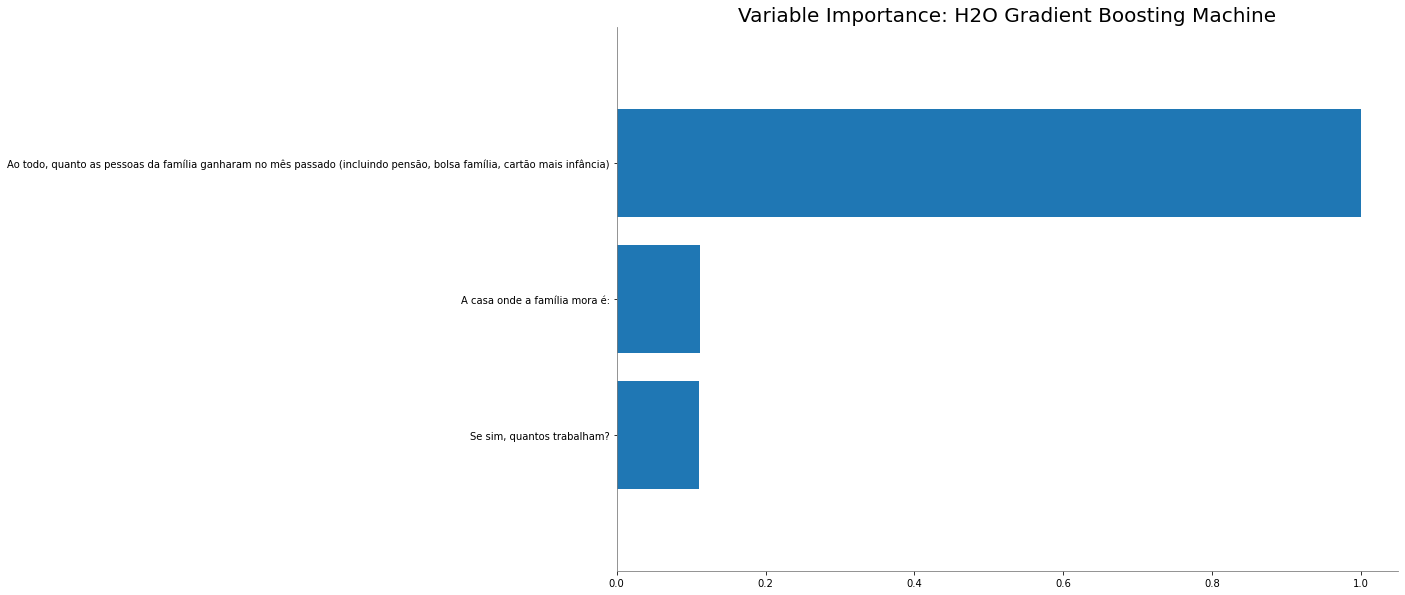

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_4

Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    A casa onde a família mora é:    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?  ia level
----------------------------  -----------------------------------------------------------------------------------------------------------------------  -------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ----------
                    0                                                                                                                        0.536304                                0                                                                                                                                  0  grave
                    0                                                                                                                        0.69802                                 0                                                                                                                                  0  grave
                    0.166667                                                                                                                 0.60231                                 0                                                                                                                                  0  moderada
                    0                                                                                                                        0.398515                                0                                                                                                                                  0  grave
                    0                                                                                                                        0.577558                                1                                                                                                                                  0  grave
                    0.166667                                                                                                                 0.412541                                1                                                                                                                                  0  grave
                    0.333333                                                                                                                 0.742574                                1                                                                                                                                  0  moderada
                    0.166667                                                                                                                 0.387789                                1                                                                                                                                  0  grave
                    0                                                                                                                        0.330033                                0                                                                                                                                  0  moderada
                    0                                                                                                                        0.569307                                1                                                                                                                                  0  moderada
[27092 rows x 5 columns]

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_4_20221123_181156_model_2                         0.745554    1.09816  0.643098  0.413576
DRF_1_AutoML_4_20221123_181156                                      0.746121    1.19062  0.628153  0.394577
DeepLearning_grid_1_AutoML_4_20221123_181156_model_4                0.746354    1.13199  0.630619  0.397681
XGBoost_grid_1_AutoML_4_20221123_181156_model_7                     0.747563    1.08215  0.623067  0.388212
XGBoost_grid_1_AutoML_4_20221123_181156_model_3                     0.747622    1.08894  0.623876  0.389221
GBM_4_AutoML_4_20221123_181156                                      0.747703    1.08137  0.627216  0.3934
XGBoost_2_AutoML_4_20221123_181156                                  0.747744    1.0819   0.623266  0.38846
XGBoost_grid_1_AutoML_4_20221123

### Best Model Updated: df_RFE_DTC_4-GBM_grid_1_AutoML_4_20221123_181156_model_2-acc:0.524078379275988

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_RFE_DTC_4-GBM_grid_1_AutoML_4_20221123_181156_model_2-acc:0.524078379275988

### df_RFE_DTC_4 has accuracy: 0.524078379275988

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_4_20221123_181156_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    38                 152                         141550                 0            11           5.31579       1             232           69.296

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.4048327048560031
RMSE: 0.6362646500128725
LogLoss: 1.070844804176703
Mean Per-Class Error: 0.7350190577614018
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
723      0       8145        10        0.918563   8,155 / 8,878
81       0       1651        2         1          1,734 / 1,734
451      0       13798       17        0.0328053  468 / 14,266
87       0       2102        25        0.988708   2,189 / 2,214
1342     0       25696       54        0.463089   12,546 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.536911
2    0.858667
3    0.936365
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.4135755116177253
RMSE: 0.6430983685391569
LogLoss: 1.098158687434131
Mean Per-Class Error: 0.7455542765160842
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
505      0       8363        10        0.943118   8,373 / 8,878
90       0       1642        2         1          1,734 / 1,734
622      1       13618       25        0.0454227  648 / 14,266
95       0       2105        14        0.993677   2,200 / 2,214
1312     1       25728       51        0.478185   12,955 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.521815
2    0.85468
3    0.926288
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.521814  0.0109161   0.527306      0.518819      0.528239      0.52381       0.525286      0.532669      0.499446      0.505722      0.530823      0.526024
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.478186  0.0109161   0.472694      0.481181      0.471761      0.47619       0.474714      0.467331      0.500554      0.494278      0.469177      0.473976
err_count                1295.5    29.5607     1281          1304          1278          1290          1286          1266          1356          1339          1271   

<Figure size 432x288 with 0 Axes>

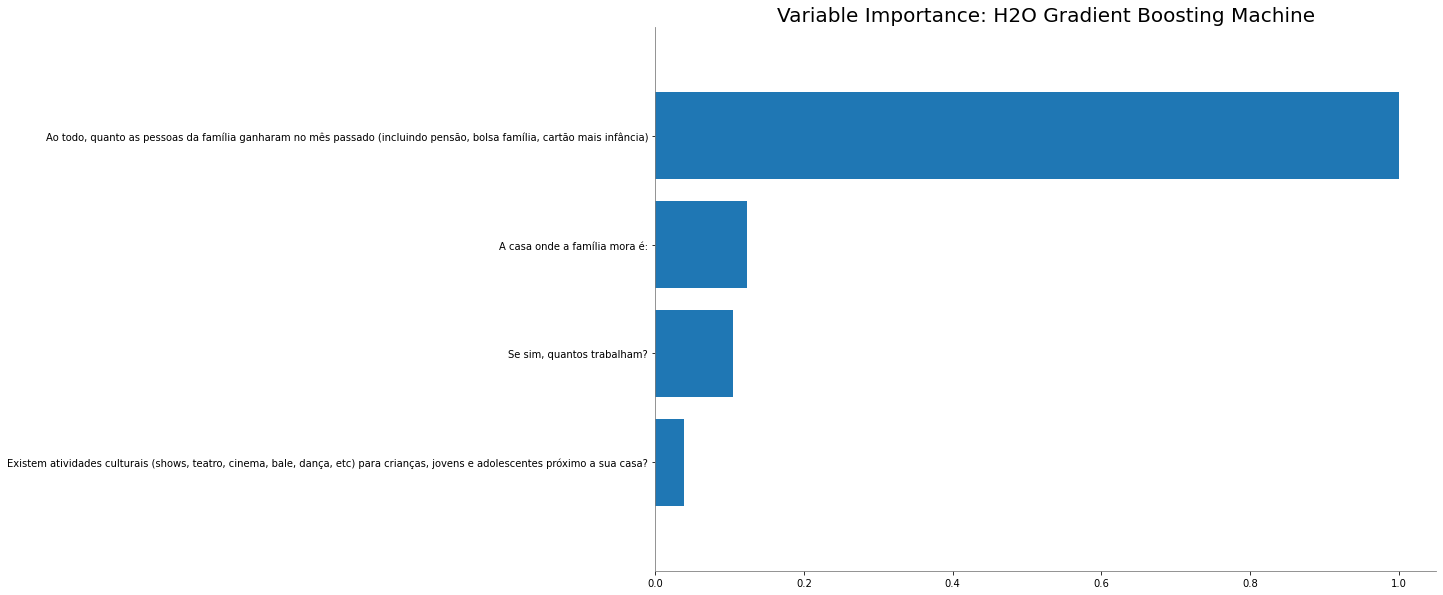

<Figure size 432x288 with 0 Axes>

In [ ]:
RFE_DTC_1 = [12, 29]
RFE_DTC_2 = [11, 12, 29]
RFE_DTC_3 = [11, 12, 17, 29]
RFE_DTC_4 = [11, 12, 17, 26, 29]

df_RFE_DTC_1 = df[RFE_DTC_1]
df_RFE_DTC_2 = df[RFE_DTC_2]
df_RFE_DTC_3 = df[RFE_DTC_3]
df_RFE_DTC_4 = df[RFE_DTC_4]

feature_combinations = {
    'df_RFE_DTC_1' : df[RFE_DTC_1],
    'df_RFE_DTC_2' : df[RFE_DTC_2],
    'df_RFE_DTC_3' : df[RFE_DTC_3],
    'df_RFE_DTC_4' : df[RFE_DTC_4]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_5

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    A casa onde a família mora é:    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  -------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   1                      0.166667                                                                                                                 0.412541                                1                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.412541                                1                                                                                                                                  0  sem ia
                                                                   0                      0                                                                                                                        0.330033                                0                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.313531                                1                                                                                                                                  0  grave
                                                                   0                      0                                                                                                                        0.412541                                0                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.412541                                0                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.330033                                0                                                                                                                                  0  sem ia
                                                                   0                      0                                                                                                                        0.49505                                 1                                                                                                                                  0  moderada
                                                                   

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                                mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_1_20221124_120631_model_2                         0.744986    1.09269  0.641423  0.411424
XGBoost_grid_1_AutoML_1_20221124_120631_model_7                     0.745382    1.08453  0.622832  0.38792
XGBoost_grid_1_AutoML_1_20221124_120631_model_3                     0.745461    1.08729  0.623063  0.388207
DRF_1_AutoML_1_20221124_120631                                      0.745758    1.13523  0.626487  0.392485
GBM_grid_1_AutoML_1_20221124_120631_model_11                        0.746194    1.08576  0.634487  0.402573
XGBoost_grid_1_AutoML_1_20221124_120631_model_10                    0.746233    1.08406  0.622824  0.38791
XGBoost_1_AutoML_1_20221124_120631                                  0.746333    1.08146  0.622804  0.387885
GBM_4_AutoML_1_20221124_120631 

### Best Model Updated: df_RFE_DTC_5-GBM_grid_1_AutoML_1_20221124_120631_model_2-acc:0.5124543341082697

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_RFE_DTC_5-GBM_grid_1_AutoML_1_20221124_120631_model_2-acc:0.5124543341082697

### df_RFE_DTC_5 has accuracy: 0.5124543341082697

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20221124_120631_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 160                         147434                 0            11           4.9375        1             224           68.4875

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.4015259976506217
RMSE: 0.6336607906842758
LogLoss: 1.064005726141811
Mean Per-Class Error: 0.7346260421750702
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
766      0       8101        11        0.913719   8,112 / 8,878
75       0       1655        4         1          1,734 / 1,734
516      0       13732       18        0.0374317  534 / 14,266
96       0       2090        28        0.987353   2,186 / 2,214
1453     0       25578       61        0.463827   12,566 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.536173
2    0.85863
3    0.9436
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.41142401198204837
RMSE: 0.6414234264368962
LogLoss: 1.0926900383562594
Mean Per-Class Error: 0.7449864656727255
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
567      0       8296        15        0.936134   8,311 / 8,878
96       0       1633        5         1          1,734 / 1,734
716      0       13525       25        0.0519417  741 / 14,266
106      0       2090        18        0.99187    2,196 / 2,214
1485     0       25544       63        0.479182   12,982 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.520818
2    0.854902
3    0.930422
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.520818  0.00980046  0.516236      0.520295      0.509413      0.521964      0.513843      0.521595      0.523071      0.539313      0.533776      0.508675
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.479182  0.00980046  0.483764      0.479705      0.490587      0.478036      0.486157      0.478405      0.476929      0.460687      0.466224      0.491325
err_count                1298.2    26.5782     1311          1300          1329          1295          1317          1296          1292          1248          1263  

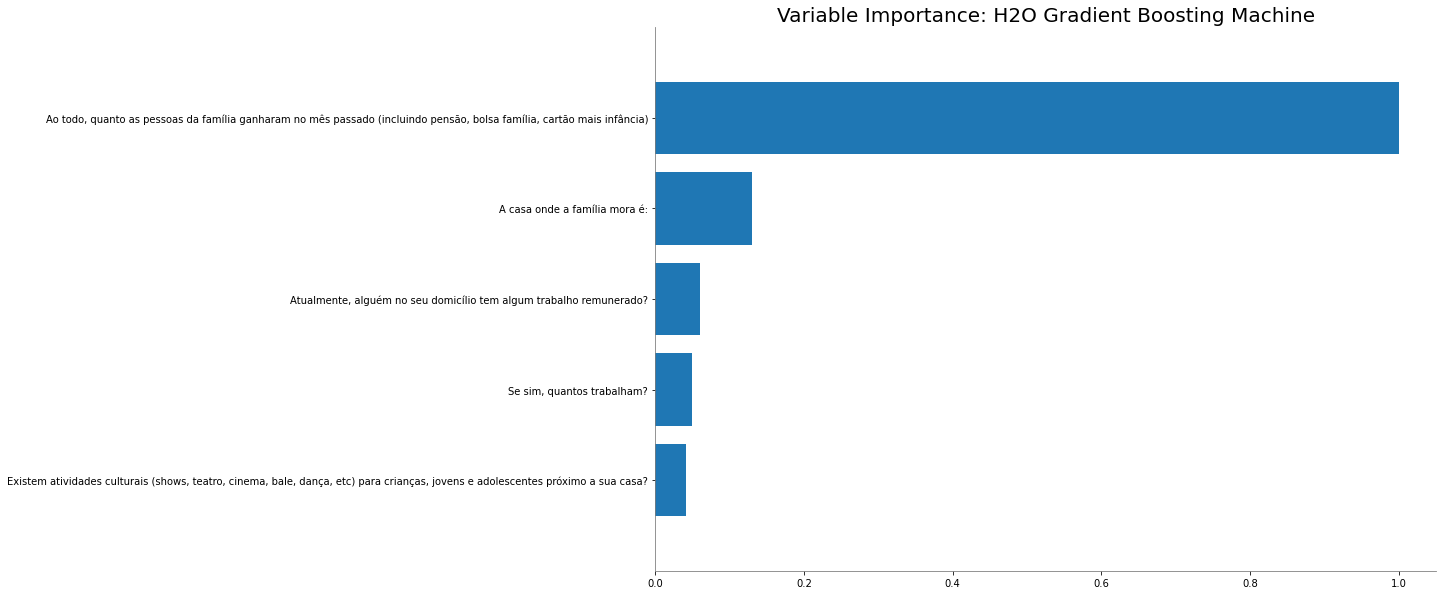

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_6

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    A casa onde a família mora é:    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  -------------------------------  --------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.410066                                1                                                                           1                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.226898                                0                                                                           1                                                                                                                                  0  leve
                                                                   0                      0                                                                                                                        0.278878                                1                                                                           0                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.288779                                1                                                                           0                                                                                                                                  0  sem ia
                                                                   0                      0                                                                                                                        1                                       1                                                                           1                                                                                                                                  0  grave
                                                                   0                      0                                                                                                                        0.412541                                1                                                                           1                                                                                                                                  0  grave
                                                                   1                      0.166667                                                                                                                 0.49505                                 0

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
DRF_1_AutoML_2_20221124_130729                                  0.742927    1.14823  0.627526  0.393789
GBM_grid_1_AutoML_2_20221124_130729_model_2                     0.744529    1.10038  0.645335  0.416458
GBM_grid_1_AutoML_2_20221124_130729_model_11                    0.744598    1.08733  0.635988  0.404481
XGBoost_grid_1_AutoML_2_20221124_130729_model_3                 0.744982    1.08998  0.623258  0.388451
XGBoost_grid_1_AutoML_2_20221124_130729_model_7                 0.745942    1.08387  0.62267   0.387718
GBM_grid_1_AutoML_2_20221124_130729_model_9                     0.746079    1.08583  0.636732  0.405427
XGBoost_grid_1_AutoML_2_20221124_130729_model_1                 0.746085    1.09096  0.623508  0.388762
XGBoost_grid_1_AutoML_2_20221124_130729_model_9              

### df_RFE_DTC_6 has accuracy: 0.5081368316174029

### Details of the best model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_2_20221124_130729


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 200                         2.68652e+06            14           20           19.96         84            1725          1064.87

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.39407538528571245
RMSE: 0.6277542395601263
LogLoss: 1.2148808955874317
Mean Per-Class Error: 0.7452655741476183
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
845      41      7921        71        0.904821   8,033 / 8,878
142      7       1567        18        0.995963   1,727 / 1,734
1131     65      12921       149       0.0942801  1,345 / 14,266
166      11      2006        31        0.985998   2,183 / 2,214
2284     124     24415       269       0.490477   13,288 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.509523
2    0.842204
3    0.933117
4    1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.3937885160092923
RMSE: 0.62752570944089
LogLoss: 1.1482300181222393
Mean Per-Class Error: 0.7429269570747491
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
895      45      7854        84        0.899189   7,983 / 8,878
154      8       1551        21        0.995386   1,726 / 1,734
1166     68      12895       137       0.0961026  1,371 / 14,266
192      11      1969        42        0.98103    2,172 / 2,214
2407     132     24269       284       0.489148   13,252 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.510852
2    0.841208
3    0.932194
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.510852  0.0085117   0.504059      0.522509      0.500923      0.51938       0.510151      0.511628      0.517534      0.518642      0.49797       0.505722
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.489148  0.0085117   0.495941      0.477491      0.499077      0.48062       0.489849      0.488372      0.482466      0.481358      0.50203       0.494278
err_count                1325.2    23.0304     1344          1294          1352          1302          1327          1323          1307          1304          1360          133

<Figure size 432x288 with 0 Axes>

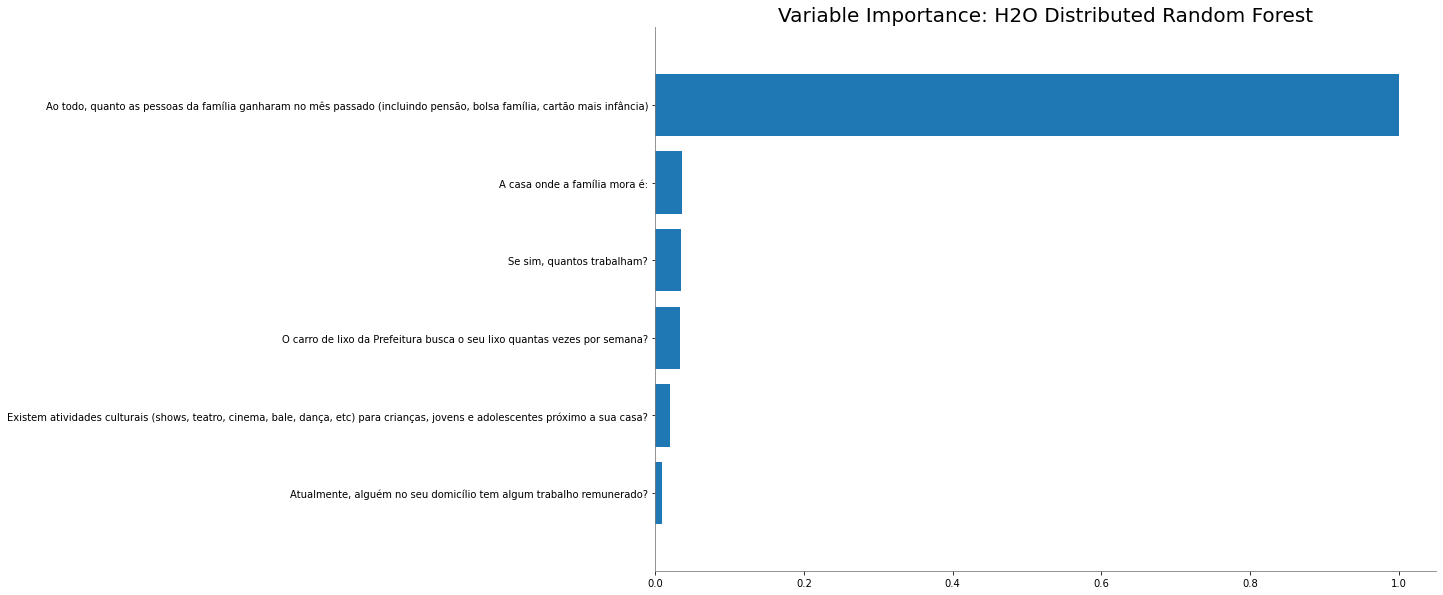

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_7

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    cras    A casa onde a família mora é:    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  ------  -------------------------------  --------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   0                             0                                                                                                                 0.536304       0                                1                                                                           1                                                                                                                                  1  moderada
                                                                   0                             0                                                                                                                 0.377888       0                                0                                                                           1                                                                                                                                  0  grave
                                                                   0                             0                                                                                                                 0.304455       0                                1                                                                           0                                                                                                                                  0  grave
                                                                   0                             0                                                                                                                 0.459571       1                                1                                                                           1                                                                                                                                  0  grave
                                                                   0                             0                                                                                                                 0.412541       1                                0                                                                           0                                                                                                                                  0  moderada
                                                                   0                             0                                                                                                                 0.412541       0                                1                                                                           0                                                                                                                                  0  moderada
                                                                   0                             0                                                                                       

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
DRF_1_AutoML_3_20221124_140732                                  0.743069    1.18004  0.629472  0.396234
GBM_grid_1_AutoML_3_20221124_140732_model_2                     0.744944    1.10072  0.645869  0.417147
XGBoost_2_AutoML_3_20221124_140732                              0.745048    1.08535  0.62243   0.38742
GBM_grid_1_AutoML_3_20221124_140732_model_8                     0.745498    1.09584  0.641784  0.411887
XGBoost_grid_1_AutoML_3_20221124_140732_model_10                0.745749    1.08728  0.622554  0.387574
GBM_grid_1_AutoML_3_20221124_140732_model_11                    0.745937    1.08838  0.636368  0.404964
XGBoost_grid_1_AutoML_3_20221124_140732_model_7                 0.746248    1.08949  0.622928  0.38804
XGBoost_1_AutoML_3_20221124_140732                             

### df_RFE_DTC_7 has accuracy: 0.49883759548322815

### Details of the best model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_3_20221124_140732


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 200                         3.60067e+06            20           20           19.8          1             2199          1429.15

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.3966203550410002
RMSE: 0.6297780204492692
LogLoss: 1.3039981663128326
Mean Per-Class Error: 0.7431247081424965
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
997      58      7706        117       0.8877    7,881 / 8,878
172      18      1517        27        0.989619  1,716 / 1,734
1466     104     12528       168       0.121828  1,738 / 14,266
206      18      1931        59        0.973351  2,155 / 2,214
2841     198     23682       371       0.497933  13,490 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.502067
2    0.833419
3    0.930275
4    1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.3962344630562867
RMSE: 0.6294715744624905
LogLoss: 1.1800376693381873
Mean Per-Class Error: 0.7430686648625202
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1020     51      7683        124       0.885109  7,858 / 8,878
187      22      1496        29        0.987313  1,712 / 1,734
1538     122     12442       164       0.127856  1,824 / 14,266
216      18      1918        62        0.971996  2,152 / 2,214
2961     213     23539       379       0.5       13,546 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.5
2    0.833862
3    0.932231
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.5       0.0051942   0.498893      0.502583      0.505722      0.507937      0.496493      0.493909      0.50646       0.496124      0.496124      0.495755
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.5       0.0051942   0.501107      0.497417      0.494278      0.492063      0.503507      0.506091      0.49354       0.503876      0.503876      0.504245
err_count                1354.6    14.057      1358          1348          1339          1333          1364          1371          1337          1365          1365          1366
logloss         

<Figure size 432x288 with 0 Axes>

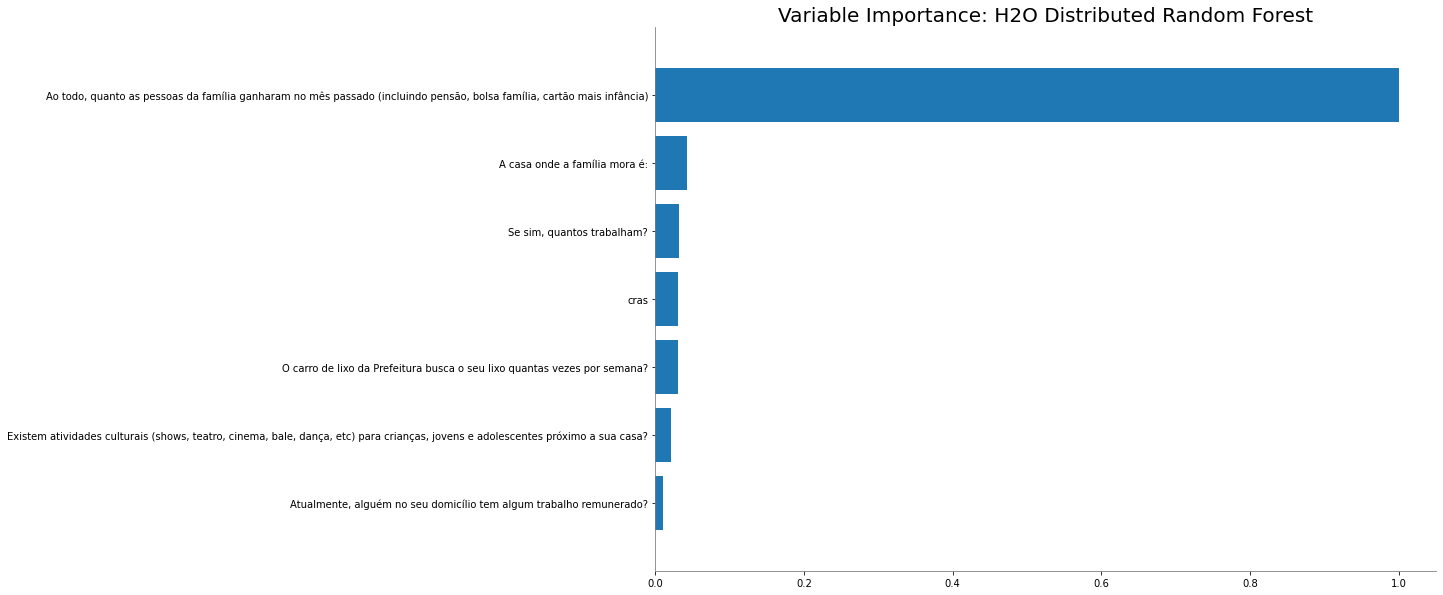

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_8

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    A casa onde a família mora é:    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------------------------------  --------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                     0.25165                                                                                     1       1                                0                                                                           1                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                     0.273927                                                                                    1       0                                1                                                                           0                                                                                                                                  0  sem ia
                                                                   1                      0.333333                                                                                                              0.49505                                                                                     1       1                                1                                                                           1                                                                                                                                  0  moderada
                                                                   1                      0.333333                                                                                                              0.000825083                                                                                 0       0                                1                                                                           1                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                     0.412541                                                                                    1       1                                0                                                                           1                                                                                                                                  0  moderada
                                                                   0              

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_4_20221124_150735_model_2                     0.739912    1.09395  0.640642  0.410422
XGBoost_grid_1_AutoML_4_20221124_150735_model_9                 0.741789    1.08859  0.623009  0.38814
XGBoost_grid_1_AutoML_4_20221124_150735_model_3                 0.741913    1.10168  0.624395  0.389869
XGBoost_grid_1_AutoML_4_20221124_150735_model_10                0.74217     1.09006  0.623047  0.388188
XGBoost_2_AutoML_4_20221124_150735                              0.742673    1.08606  0.622806  0.387887
DRF_1_AutoML_4_20221124_150735                                  0.742993    1.19521  0.63329   0.401056
XGBoost_grid_1_AutoML_4_20221124_150735_model_17                0.74323     1.07916  0.621339  0.386063
XGBoost_grid_1_AutoML_4_20221124_150735_model_1               

### Best Model Updated: df_RFE_DTC_8-GBM_grid_1_AutoML_4_20221124_150735_model_2-acc:0.5134506808369312

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_RFE_DTC_8-GBM_grid_1_AutoML_4_20221124_150735_model_2-acc:0.5134506808369312

### df_RFE_DTC_8 has accuracy: 0.5134506808369312

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_4_20221124_150735_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    42                 168                         251176                 0            11           4.71429       1             434           114.435

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.39082248899868993
RMSE: 0.625157971235023
LogLoss: 1.0367672365173417
Mean Per-Class Error: 0.7120090979936124
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
1569     0       7270        39        0.823271   7,309 / 8,878
149      3       1565        17        0.99827    1,731 / 1,734
1005     0       13205       56        0.0743726  1,061 / 14,266
162      0       1946        106       0.952123   2,108 / 2,214
2885     3       23986       218       0.45065    12,209 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.54935
2    0.862764
3    0.954267
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.4104219537614525
RMSE: 0.6406418295439757
LogLoss: 1.0939469511018134
Mean Per-Class Error: 0.7399120666549703
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1070     1       7758        49        0.879477  7,808 / 8,878
172      0       1543        19        1         1,734 / 1,734
1416     3       12755       92        0.105916  1,511 / 14,266
173      3       1981        57        0.974255  2,157 / 2,214
2831     7       24037       217       0.487598  13,210 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.512402
2    0.853056
3    0.931013
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.512403  0.00980223  0.502952      0.495572      0.524548      0.501661      0.509782      0.516427      0.519749      0.511997      0.52344       0.517903
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.487597  0.00980223  0.497048      0.504428      0.475452      0.498339      0.490218      0.483573      0.480251      0.488003      0.47656       0.482097
err_count                1321      26.7041     1347          1367          1288          1350          1328          1310          1301          1322          1291   

<Figure size 432x288 with 0 Axes>

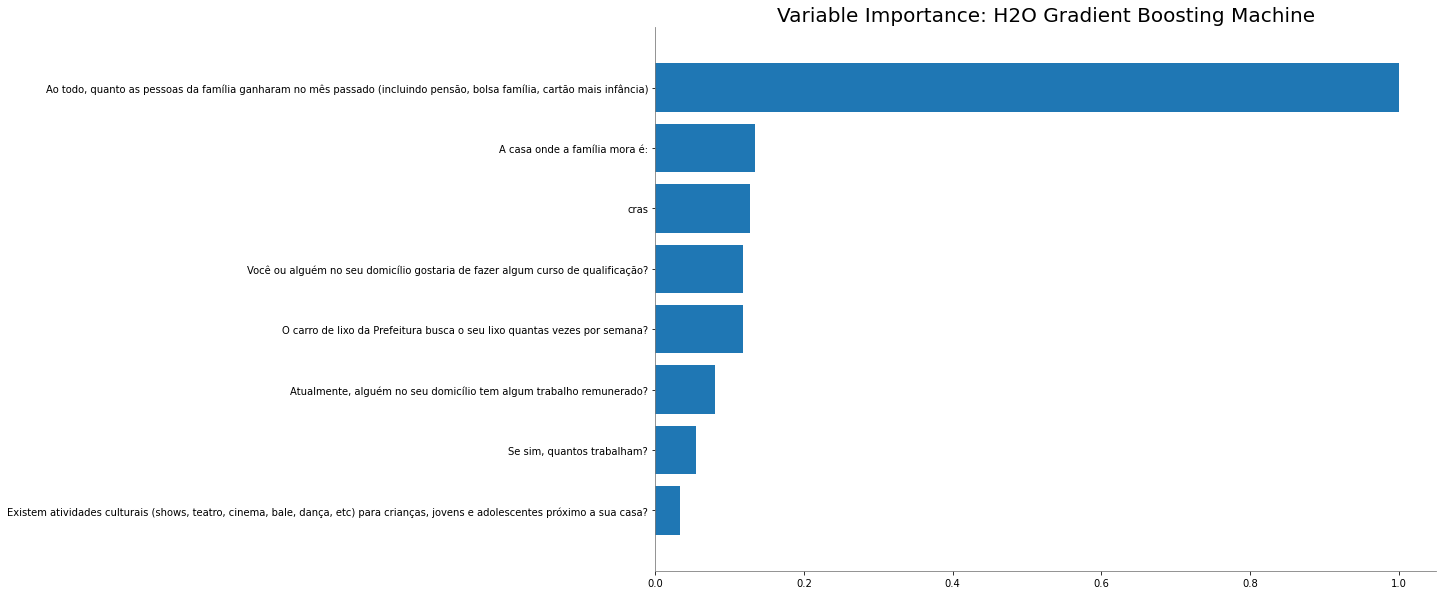

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_9

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    A casa onde a família mora é:    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   1                      0.166667                                                                                                                 0.476898                                                                                 0       0                                1                                                                           1                                                                                                 0                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.49505                                                                                  0       0                                1                                                                           1                                                                                                 0                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.294554                                                                                 1       1                                0                                                                           1                                                                                                 0                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.325908                                                                                 1       0                                1                                                                           0                                                                                                 0                                                                                                                                  0  moderada
                                                    

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
DRF_1_AutoML_5_20221124_160739                                  0.741483    1.67972  0.637421  0.406306
XGBoost_grid_1_AutoML_5_20221124_160739_model_3                 0.742109    1.10423  0.624698  0.390247
GBM_grid_1_AutoML_5_20221124_160739_model_2                     0.742151    1.0962   0.641198  0.411134
XGBoost_2_AutoML_5_20221124_160739                              0.742352    1.09016  0.623603  0.388881
XGBoost_grid_1_AutoML_5_20221124_160739_model_10                0.743058    1.09655  0.624045  0.389433
XGBoost_grid_1_AutoML_5_20221124_160739_model_7                 0.743253    1.0993   0.624679  0.390223
XGBoost_grid_1_AutoML_5_20221124_160739_model_1                 0.743607    1.10179  0.624934  0.390543
GBM_grid_1_AutoML_5_20221124_160739_model_8                  

### df_RFE_DTC_9 has accuracy: 0.48654931916306876

### Details of the best model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_5_20221124_160739


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 200                         5.69084e+06            20           20           20            877           3260          2261.32

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.4059725074007986
RMSE: 0.637159718909473
LogLoss: 2.162347208224509
Mean Per-Class Error: 0.7408816936987438
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1468     124     7122        164       0.834647  7,410 / 8,878
257      32      1386        59        0.981546  1,702 / 1,734
2178     222     11552       314       0.190243  2,714 / 14,266
293      42      1784        95        0.957091  2,119 / 2,214
4196     420     21844       632       0.514728  13,945 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.485272
2    0.817289
3    0.9185
4    1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.40630611571850067
RMSE: 0.6374214584703756
LogLoss: 1.6797223500030913
Mean Per-Class Error: 0.7414828726362754
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1518     133     7075        152       0.829016  7,360 / 8,878
260      34      1388        52        0.980392  1,700 / 1,734
2260     228     11466       312       0.196271  2,800 / 14,266
309      50      1767        88        0.960253  2,126 / 2,214
4347     445     21696       604       0.516241  13,986 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.483759
2    0.818987
3    0.925033
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.483759  0.010737    0.48524       0.476753      0.503138      0.48505       0.487634      0.488003      0.470284      0.469177      0.495386      0.476929
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.516241  0.010737    0.51476       0.523247      0.496862      0.51495       0.512366      0.511997      0.529716      0.530823      0.504614      0.523071
err_count                1398.6    29.1174     1395          1418          1346          1395          1388          1387          1435          1438          1367          1417
logloss       

<Figure size 432x288 with 0 Axes>

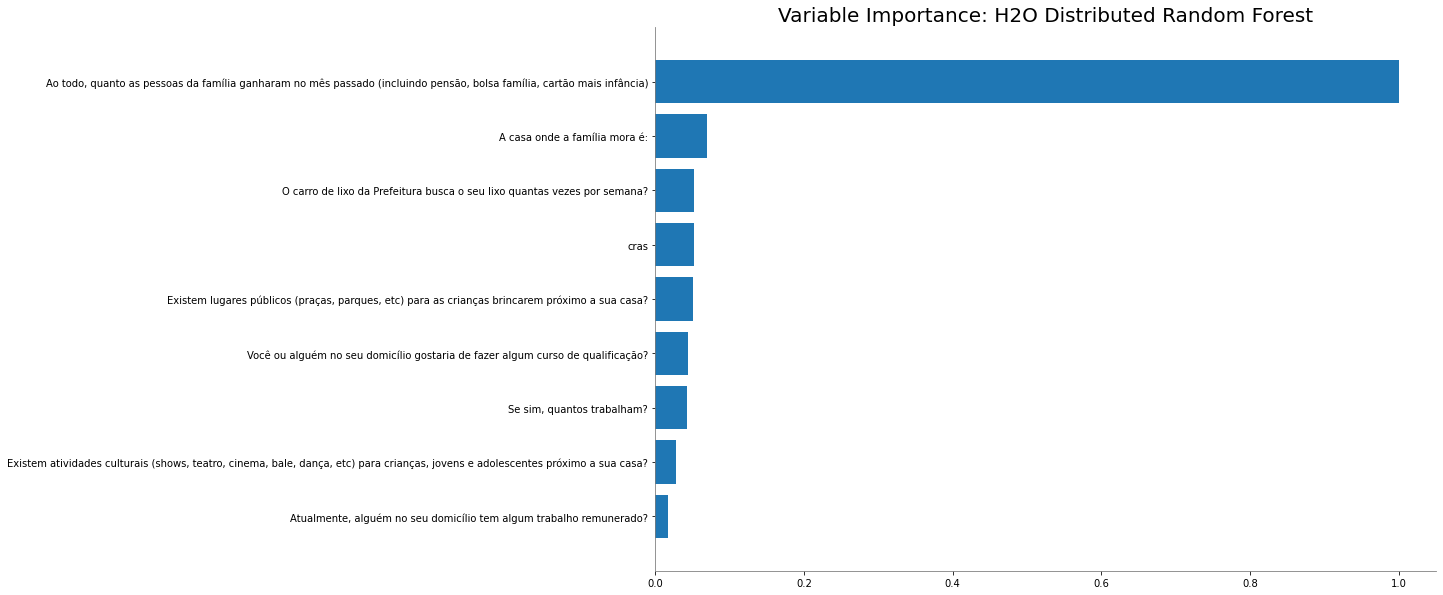

<Figure size 432x288 with 0 Axes>

In [ ]:
RFE_DTC_5 = [10, 11, 12, 17, 26, 29]
RFE_DTC_6 = [10, 11, 12, 17, 23, 26, 29]
RFE_DTC_7 = [10, 11, 12, 15, 17, 23, 26, 29]
RFE_DTC_8 = [10, 11, 12, 14, 15, 17, 23, 26, 29]
RFE_DTC_9 = [10, 11, 12, 14, 15, 17, 23, 25, 26, 29]

df_RFE_DTC_5 = df[RFE_DTC_5]
df_RFE_DTC_6 = df[RFE_DTC_6]
df_RFE_DTC_7 = df[RFE_DTC_7]
df_RFE_DTC_8 = df[RFE_DTC_8]
df_RFE_DTC_9 = df[RFE_DTC_9]


feature_combinations = {
    'df_RFE_DTC_5' : df[RFE_DTC_5],
    'df_RFE_DTC_6' : df[RFE_DTC_6],
    'df_RFE_DTC_7' : df[RFE_DTC_7],
    'df_RFE_DTC_8' : df[RFE_DTC_8],
    'df_RFE_DTC_9' : df[RFE_DTC_9]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_10

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    A casa onde a família mora é:    Qual é a forma de abastecimento de água utilizada no domicílio?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------------------------------  -----------------------------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.288779                                                                                 0       0                                1                                                                  0                                                                           0                                                                                                 1                                                                                                                                  0  grave
                                                                   0                      0                                                                                                                        0.412541                                                                                 1       1                                0                                                                  1                                                                           1                                                                                                 0                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.223597                                                                                 0       0                                1                                                                  1                                                                           0                                                                                                 0                                                                                                                                  0  moderada
                                                                   0                      0                                                                                                                        0.45132                                                                                  1       1                                1                                    

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_1_20221124_20934_model_2                     0.736582    1.09435  0.639319  0.408729
GBM_grid_1_AutoML_1_20221124_20934_model_8                     0.73689     1.09657  0.640133  0.409771
DRF_1_AutoML_1_20221124_20934                                  0.737752    1.80035  0.637946  0.406976
XGBoost_grid_1_AutoML_1_20221124_20934_model_10                0.737947    1.09898  0.623256  0.388448
XGBoost_grid_1_AutoML_1_20221124_20934_model_3                 0.738305    1.10516  0.623584  0.388858
XGBoost_grid_1_AutoML_1_20221124_20934_model_7                 0.738309    1.10087  0.62344   0.388677
XGBoost_grid_1_AutoML_1_20221124_20934_model_11                0.738547    1.08603  0.622005  0.386891
XGBoost_grid_1_AutoML_1_20221124_20934_model_9                 0.7392

### Best Model Updated: df_RFE_DTC_10-GBM_grid_1_AutoML_1_20221124_20934_model_2-acc:0.5074726004649618

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_RFE_DTC_10-GBM_grid_1_AutoML_1_20221124_20934_model_2-acc:0.5074726004649618

### df_RFE_DTC_10 has accuracy: 0.5074726004649618

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20221124_20934_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    34                 136                         301924                 0            11           6.06618       1             438           172.221

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.38196270195215315
RMSE: 0.6180313114658134
LogLoss: 1.0166886113344569
Mean Per-Class Error: 0.7016471676450152
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1845     3       7002        28        0.792183  7,033 / 8,878
157      9       1553        15        0.99481   1,725 / 1,734
1032     4       13181       49        0.076055  1,085 / 14,266
195      3       1891        125       0.943541  2,089 / 2,214
3229     19      23627       217       0.440425  11,932 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.559575
2    0.866935
3    0.957626
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.4087285580678498
RMSE: 0.6393188234893837
LogLoss: 1.0943502281827866
Mean Per-Class Error: 0.736581996694146
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1384     0       7446        48        0.844109  7,494 / 8,878
193      2       1522        17        0.998847  1,732 / 1,734
1684     5       12482       95        0.125053  1,784 / 14,266
223      1       1942        48        0.97832   2,166 / 2,214
3484     8       23392       208       0.486343  13,176 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.513657
2    0.851838
3    0.92806
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.513288  0.0093098   0.522878      0.516236      0.500923      0.504614      0.521595      0.51495       0.51052       0.509413      0.502769      0.528977
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.486712  0.0093098   0.477122      0.483764      0.499077      0.495386      0.478405      0.48505       0.48948       0.490587      0.497231      0.471023
err_count                1318.6    25.1493     1293          1311          1352          1342          1296          1314          1326          1329          1347          1

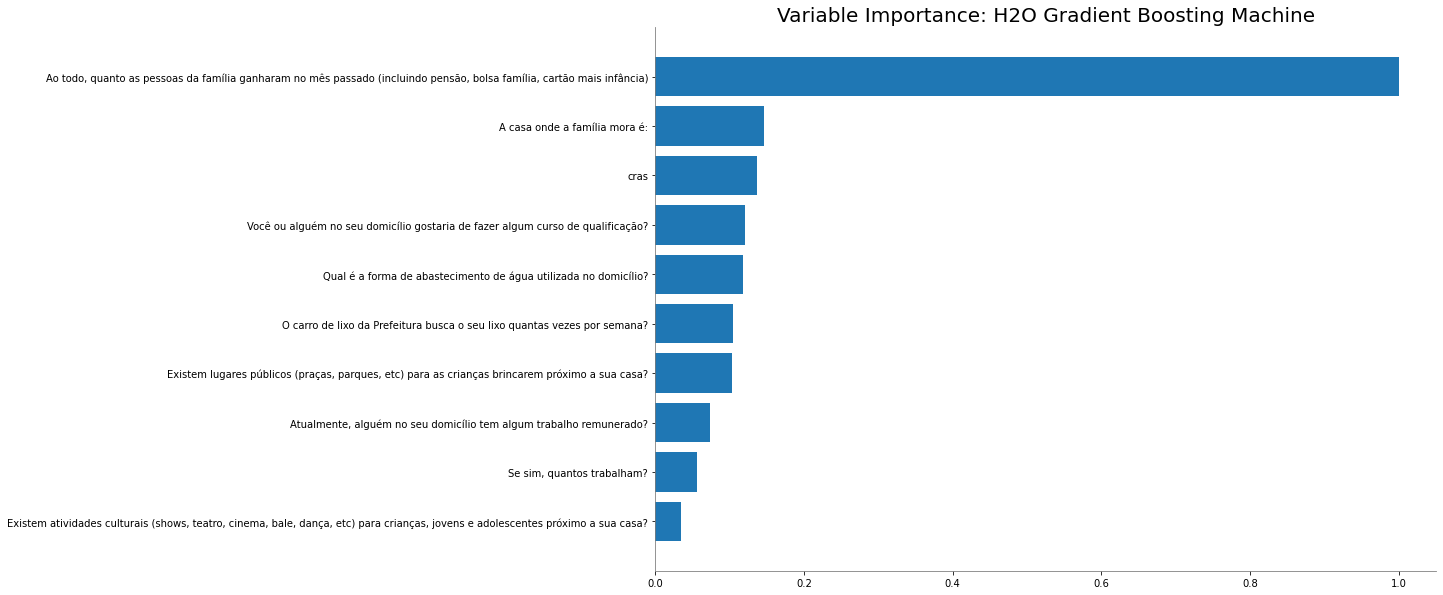

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_11

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    A casa onde a família mora é:    Qual é a forma de abastecimento de água utilizada no domicílio?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------------------------------  -----------------------------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.495875                                                                                 0       1                                1                                                                  1                                                                           0                                                                                                 0                                                                                                                                  0                                                                                                                                                                               0  grave
                                                                   1                      0.166667                                                                                                                 0.660066                                                                                 0       1                                1                                                                  1                                                                           1                                                                                                 1                                                                                                                                  0                                                                                                                                                                               1  sem ia
                                                                   0                      0                                                                                                                        0.330033                                                                                 0       0                                1                                                           

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
XGBoost_grid_1_AutoML_2_20221124_31004_model_3                 0.737034    1.10915  0.624796  0.39037
GBM_grid_1_AutoML_2_20221124_31004_model_2                     0.738095    1.0939   0.639177  0.408548
XGBoost_grid_1_AutoML_2_20221124_31004_model_1                 0.738432    1.10221  0.623685  0.388983
XGBoost_grid_1_AutoML_2_20221124_31004_model_10                0.739052    1.09831  0.623284  0.388483
XGBoost_grid_1_AutoML_2_20221124_31004_model_7                 0.739288    1.09808  0.623299  0.388501
XGBoost_grid_1_AutoML_2_20221124_31004_model_16                0.739521    1.08625  0.622195  0.387127
XGBoost_grid_1_AutoML_2_20221124_31004_model_5                 0.740094    1.08556  0.621559  0.386335
XGBoost_2_AutoML_2_20221124_31004                              0.74035

### df_RFE_DTC_11 has accuracy: 0.5071404848887413

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_2_20221124_31004_model_3


Model Summary: 
    number_of_trees
--  -----------------
    33

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.3326861599967635
RMSE: 0.5767895283348714
LogLoss: 0.9253908371483861
Mean Per-Class Error: 0.6602705280648006
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
2414     7       6418        39        0.728092   6,464 / 8,878
175      75      1468        16        0.956747   1,659 / 1,734
780      11      13434       41        0.0583205  832 / 14,266
213      10      1765        226       0.897922   1,988 / 2,214
3582     103     23085       322       0.40392    10,943 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.59608
2    0.88026
3    0.969437
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.3903699066928757
RMSE: 0.6247958920262486
LogLoss: 1.10915097091112
Mean Per-Class Error: 0.73703432820056
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1402     16      7392        68        0.842082  7,476 / 8,878
222      12      1475        25        0.99308   1,722 / 1,734
1789     43      12287       147       0.138721  1,979 / 14,266
268      15      1874        57        0.974255  2,157 / 2,214
3681     86      23028       297       0.492175  13,334 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.507825
2    0.845637
3    0.932674
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.507826  0.0108459   0.512546      0.491513      0.51089       0.508675      0.525655      0.503138      0.496493      0.502399      0.52344       0.503507
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.492174  0.0108459   0.487454      0.508487      0.48911       0.491325      0.474345      0.496862      0.503507      0.497601      0.47656       0.496493
err_count                1333.4    29.4437     1321          1378          1325          1331          1285          1346          1364          1348          1291          1345
logloss                  1.10915   0.0196695   1.09711       1.11851       1.10975       1.1292        1.10327       1.11643       1.1147        1.11315       1.06082       1.12857
max_per_class_error      0.993059  0.00452264  0.98773       0.994318      0.994652      0.98324       0.994012      0.993711      0.994652      1             0.993506      0.994764
mean_per_class_accuracy  0.263087  0.00475859  0.267801    

<Figure size 432x288 with 0 Axes>

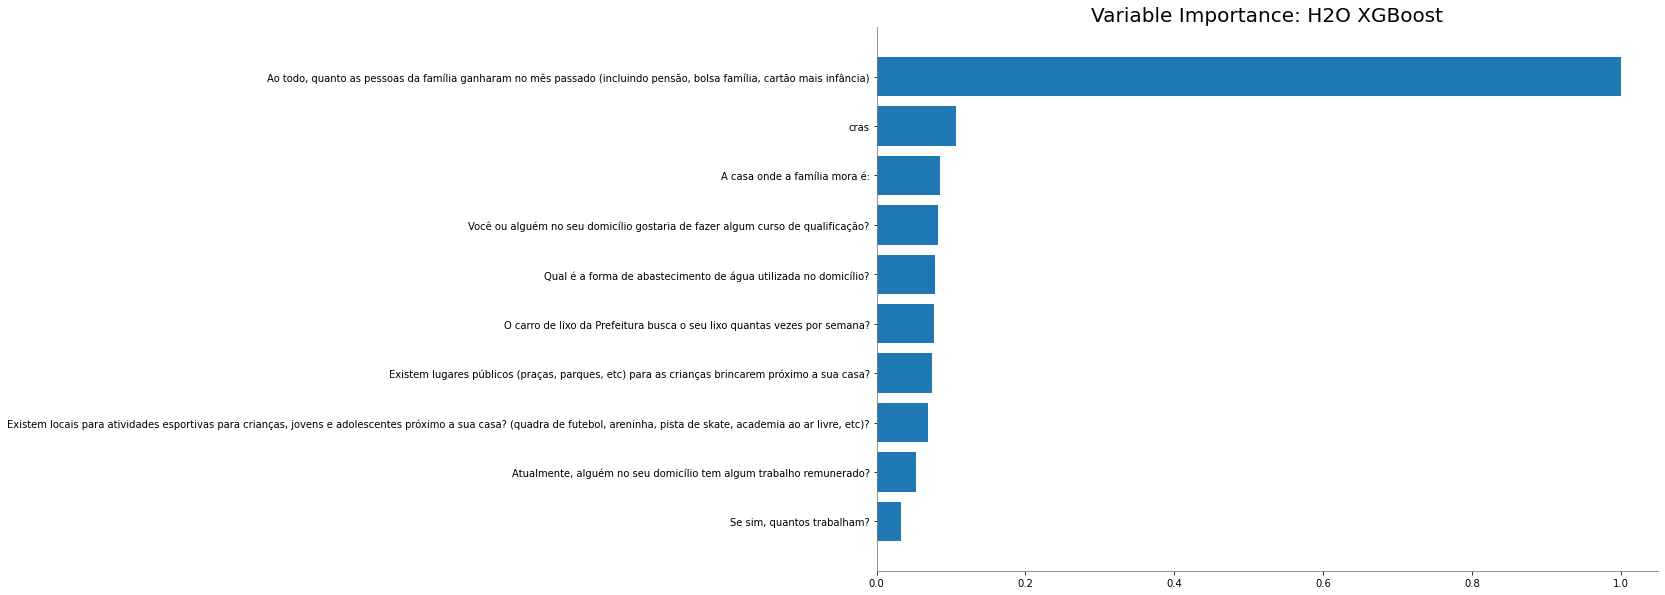

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_12

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    A casa onde a família mora é:    Qual é a forma de abastecimento de água utilizada no domicílio?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------------------------------  -----------------------------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                             0                                                                                                                 0.424092                                                                                 1       0                                0                                                                  0                                                                           1                                                                                                 0                                                                                                                                  0                                                                                                                                                                               0                                                             1  moderada
                                                                   0                             0                                                                                                                 0.577558                                                                                 1       1                                1                                                                  0                                                                           0                                                                                                 0                                                                                                                                  0                                                                                                                                                                               0                                                             1  moderada
                                                                   0                             0                                                  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_3_20221124_41039_model_8                     0.734852    1.09583  0.639565  0.409043
DRF_1_AutoML_3_20221124_41039                                  0.735053    1.71153  0.639477  0.408931
XGBoost_grid_1_AutoML_3_20221124_41039_model_1                 0.735584    1.1148   0.624106  0.389508
XGBoost_grid_1_AutoML_3_20221124_41039_model_10                0.735756    1.09981  0.623155  0.388322
XGBoost_grid_1_AutoML_3_20221124_41039_model_3                 0.736337    1.11176  0.624663  0.390203
XGBoost_grid_1_AutoML_3_20221124_41039_model_7                 0.736508    1.10088  0.623167  0.388338
GBM_grid_1_AutoML_3_20221124_41039_model_2                     0.736901    1.09227  0.637412  0.406294
XGBoost_grid_1_AutoML_3_20221124_41039_model_9                 0.7372

### Best Model Updated: df_RFE_DTC_12-GBM_grid_1_AutoML_3_20221124_41039_model_8-acc:0.5097974094985055

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_RFE_DTC_12-GBM_grid_1_AutoML_3_20221124_41039_model_8-acc:0.5097974094985055

### df_RFE_DTC_12 has accuracy: 0.5097974094985055

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20221124_41039_model_8


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    28                 112                         324878                 0            10           6.42857       1             496           226.67

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.37737124404999123
RMSE: 0.614305497330108
LogLoss: 1.003518980268085
Mean Per-Class Error: 0.6795666305502783
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
2345     0       6513        20        0.735864   6,533 / 8,878
170      44      1511        9         0.974625   1,690 / 1,734
1326     5       12905       30        0.0954017  1,361 / 14,266
181      1       1838        194       0.912376   2,020 / 2,214
4022     50      22767       253       0.428318   11,604 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.571682
2    0.873616
3    0.96128
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.40904311734199883
RMSE: 0.6395647874469004
LogLoss: 1.095829340324401
Mean Per-Class Error: 0.7348523055079835
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1560     7       7261        50        0.824285  7,318 / 8,878
184      4       1516        30        0.997693  1,730 / 1,734
1894     20      12217       135       0.143628  2,049 / 14,266
235      5       1916        58        0.973803  2,156 / 2,214
3873     36      22910       273       0.489185  13,253 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.510815
2    0.849956
3    0.929979
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.510815  0.0123485   0.505166      0.505904      0.528239      0.495755      0.50203       0.515319      0.518642      0.521595      0.492063      0.52344
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.489185  0.0123485   0.494834      0.494096      0.471761      0.504245      0.49797       0.484681      0.481358      0.478405      0.507937      0.47656
err_count                1325.3    33.4998     1341          1339          1278          1366          1349          1313          1304          1296          1376        

<Figure size 432x288 with 0 Axes>

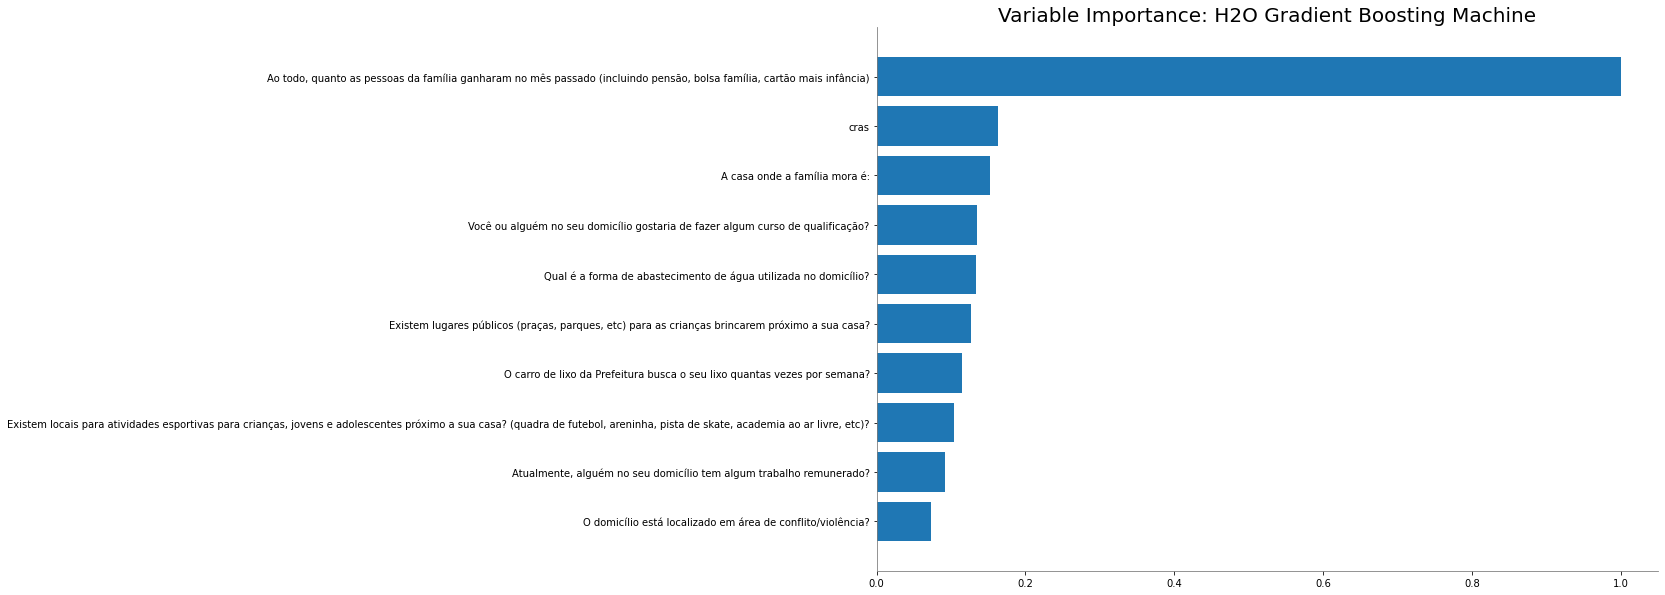

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_13

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.212046                                                                                 1       0                                1                                                                                  0                                                                  0                                                                           0                                                                                                 0                                                                                                                                  0                                                                                                                                                                               0                                                             1  moderada
                                                                   0                      0                                                                                                                        0.288779                                                                                 1       0                                1                                                                                  0                                                                  1                                                                           1                                                                                                 0                                                                                                                                  0                                                                 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_4_20221124_51107_model_2                     0.730383    1.08756  0.636019  0.40452
XGBoost_grid_1_AutoML_4_20221124_51107_model_3                 0.730901    1.10695  0.62223   0.38717
GBM_grid_1_AutoML_4_20221124_51107_model_10                    0.731696    1.09141  0.639835  0.409389
XGBoost_grid_1_AutoML_4_20221124_51107_model_9                 0.73189     1.09218  0.621857  0.386706
XGBoost_2_AutoML_4_20221124_51107                              0.732144    1.09097  0.621447  0.386196
DRF_1_AutoML_4_20221124_51107                                  0.732202    1.73116  0.639943  0.409527
XGBoost_grid_1_AutoML_4_20221124_51107_model_11                0.732809    1.08626  0.620809  0.385403
XGBoost_grid_1_AutoML_4_20221124_51107_model_10                0.732824

### Best Model Updated: df_RFE_DTC_13-GBM_grid_1_AutoML_4_20221124_51107_model_2-acc:0.5117901029558286

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_RFE_DTC_13-GBM_grid_1_AutoML_4_20221124_51107_model_2-acc:0.5117901029558286

### df_RFE_DTC_13 has accuracy: 0.5117901029558286

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_4_20221124_51107_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 160                         348677                 0            11           5.3625        1             487           168.925

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.36848892669262445
RMSE: 0.6070328876532345
LogLoss: 0.985646818324384
Mean Per-Class Error: 0.6756149571707488
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
2697     0       6158        23        0.696215   6,181 / 8,878
168      16      1528        22        0.990773   1,718 / 1,734
1331     2       12879       54        0.0972242  1,387 / 14,266
213      0       1820        181       0.918248   2,033 / 2,214
4409     18      22385       280       0.417799   11,319 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.582201
2    0.87273
3    0.967038
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.40452016851787137
RMSE: 0.6360190001233229
LogLoss: 1.0875615190244559
Mean Per-Class Error: 0.7303827464019008
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1821     1       7009        47        0.794886  7,057 / 8,878
213      3       1494        24        0.99827   1,731 / 1,734
2160     9       11990       107       0.15954   2,276 / 14,266
254      5       1886        69        0.968835  2,145 / 2,214
4448     18      22379       247       0.487561  13,209 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.512439
2    0.851801
3    0.930164
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.512476  0.0098089   0.512177      0.508856      0.514212      0.488372      0.526394      0.515688      0.518272      0.516427      0.509413      0.51495
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.487524  0.0098089   0.487823      0.491144      0.485788      0.511628      0.473606      0.484312      0.481728      0.483573      0.490587      0.48505
err_count                1320.8    26.5949     1322          1331          1316          1386          1283          1312          1305          1310          1329     

<Figure size 432x288 with 0 Axes>

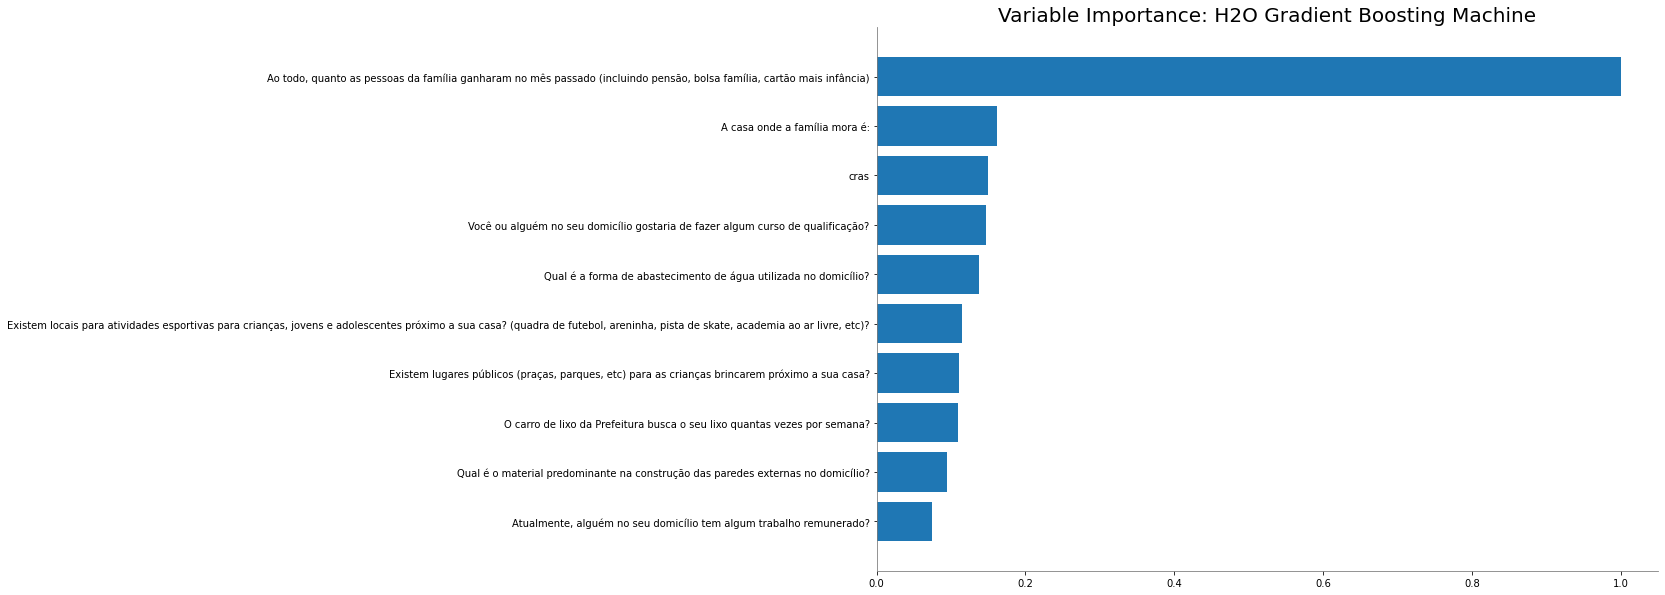

<Figure size 432x288 with 0 Axes>

In [ ]:
RFE_DTC_10 = [10, 11, 12, 14, 15, 17, 19, 23, 25, 26, 29]
RFE_DTC_11 = [10, 11, 12, 14, 15, 17, 19, 23, 25, 26, 27, 29]
RFE_DTC_12 = [10, 11, 12, 14, 15, 17, 19, 23, 25, 26, 27, 28, 29]
RFE_DTC_13 = [10, 11, 12, 14, 15, 17, 18, 19, 23, 25, 26, 27, 28, 29]

df_RFE_DTC_10 = df[RFE_DTC_10]
df_RFE_DTC_11 = df[RFE_DTC_11]
df_RFE_DTC_12 = df[RFE_DTC_12]
df_RFE_DTC_13 = df[RFE_DTC_13]

feature_combinations = {
    'df_RFE_DTC_10' : df[RFE_DTC_10],
    'df_RFE_DTC_11' : df[RFE_DTC_11],
    'df_RFE_DTC_12' : df[RFE_DTC_12],
    'df_RFE_DTC_13' : df[RFE_DTC_13]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_14

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    creas    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.40429                                                                                  1       0        0                                1                                                                                  1                                                                  0                                                                           0                                                                                                 0                                                                                                                                  0                                                                                                                                                                               0                                                             1  moderada
                                                                   0                      0                                                                                                                        0.412541                                                                                 1       1        0                                1                                                                                  0                                                                  0                                                                           0                                                                                                 0                                                                                                                                  0                             

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
XGBoost_grid_1_AutoML_4_20221123_213400_model_3                 0.731671    1.1028   0.621941  0.38681
XGBoost_grid_1_AutoML_4_20221123_213400_model_1                 0.732332    1.10843  0.621619  0.38641
XGBoost_1_AutoML_4_20221123_213400                              0.732443    1.09604  0.622867  0.387964
DRF_1_AutoML_4_20221123_213400                                  0.732705    1.58093  0.637694  0.406654
GBM_grid_1_AutoML_4_20221123_213400_model_2                     0.733039    1.08675  0.635632  0.404028
GBM_grid_1_AutoML_4_20221123_213400_model_10                    0.733537    1.08584  0.635601  0.403989
XGBoost_grid_1_AutoML_4_20221123_213400_model_10                0.733897    1.0979   0.621595  0.38638
GBM_grid_1_AutoML_4_20221123_213400_model_8                     

### Best Model Updated: df_RFE_DTC_14-XGBoost_grid_1_AutoML_4_20221123_213400_model_3-acc:0.5147791431418134

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_RFE_DTC_14-XGBoost_grid_1_AutoML_4_20221123_213400_model_3-acc:0.5147791431418134

### df_RFE_DTC_14 has accuracy: 0.5147791431418134

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_4_20221123_213400_model_3


Model Summary: 
    number_of_trees
--  -----------------
    33

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.322034694551814
RMSE: 0.5674810080979046
LogLoss: 0.8960574847552077
Mean Per-Class Error: 0.6398925935005574
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
2877     7       5965        29        0.675941   6,001 / 8,878
174      98      1437        25        0.943483   1,636 / 1,734
812      5       13393       56        0.0611944  873 / 14,266
205      5       1736        268       0.878952   1,946 / 2,214
4068     115     22531       378       0.385944   10,456 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.614056
2    0.886387
3    0.973202
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.3868101940216965
RMSE: 0.6219406676055976
LogLoss: 1.102804760438526
Mean Per-Class Error: 0.7316713397522383
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
1622     13      7171        72        0.817301  7,256 / 8,878
197      7       1498        32        0.995963  1,727 / 1,734
1903     36      12184       143       0.145941  2,082 / 14,266
258      16      1868        72        0.96748   2,142 / 2,214
3980     72      22721       319       0.487487  13,207 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.512513
2    0.847557
3    0.932268
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.512512  0.00892042  0.527306      0.512546      0.492063      0.518642      0.509782      0.510151      0.511259      0.511259      0.516427      0.515688
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.487488  0.00892042  0.472694      0.487454      0.507937      0.481358      0.490218      0.489849      0.488741      0.488741      0.483573      0.484312
err_count                1320.7    24.0788     1281          1321          1376          1304          1328          1327          1324          1324          1310          1312
logloss                  1.1028    0.0162267   1.08881       1.11383       1.11503       1.06686       1.11786       1.10583       1.10158       1.1126        1.09104       1.11461
max_per_class_error      0.995888  0.00485264  0.993827      1             0.989691      0.987013      1             1             1             1             0.993939      0.994413
mean_per_class_accuracy  0.268381  0.00283288  0.27247

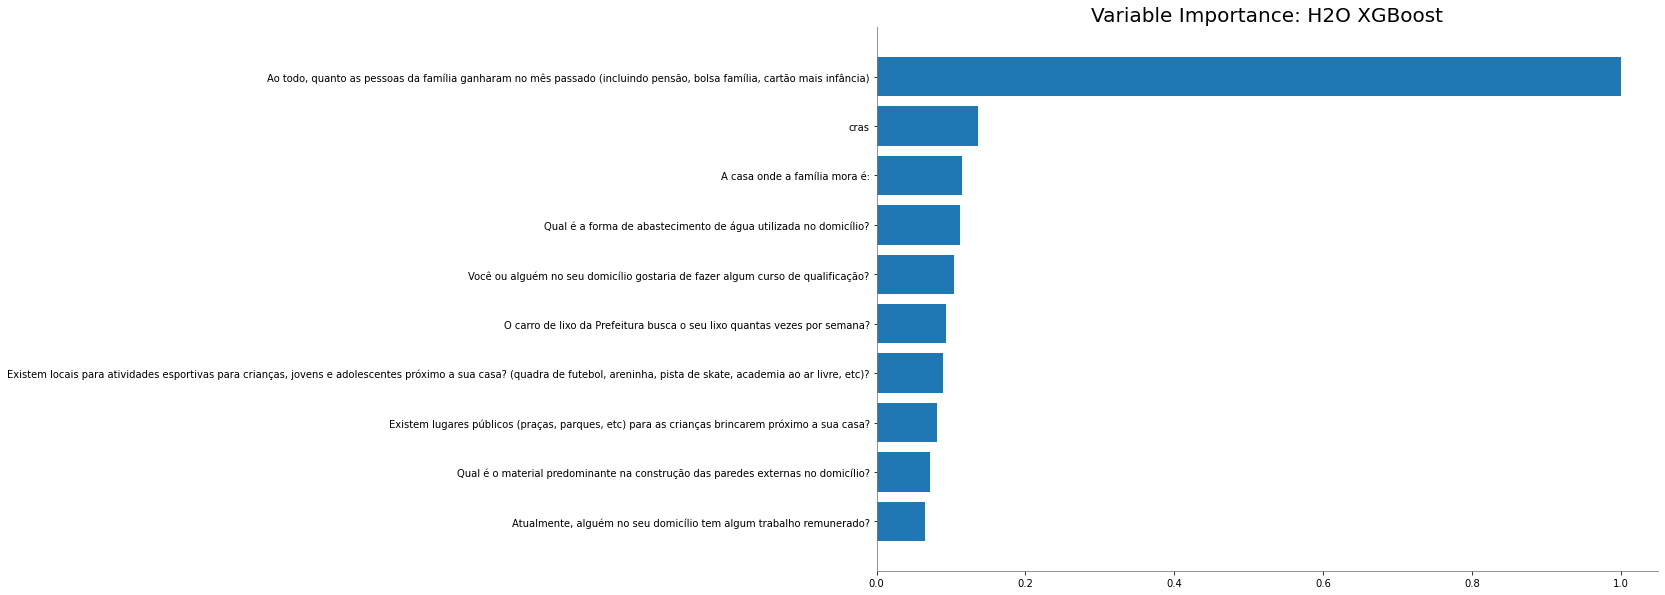

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_15

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.247525                                                                                 1       1                                1                                                                                  0                                                                  1                                                 1                                              1                                                                           1                                                                                                 1                                                                                                                                  1                                                                                                                                                                               1                                                             1  moderada
                                                                   0                      0                                                                                                                        0.660066                                                                                 1       0                                1                                                                                  0                                                                  0                                                 1                             

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
XGBoost_1_AutoML_5_20221123_223424                             0.719294    1.08789  0.618978  0.383133
XGBoost_2_AutoML_5_20221123_223424                             0.719746    1.08302  0.617337  0.381105
GBM_grid_1_AutoML_5_20221123_223424_model_2                    0.719959    1.08009  0.631567  0.398876
XGBoost_grid_1_AutoML_5_20221123_223424_model_3                0.720091    1.09835  0.618765  0.382871
GBM_grid_1_AutoML_5_20221123_223424_model_10                   0.720143    1.07695  0.630911  0.398049
XGBoost_grid_1_AutoML_5_20221123_223424_model_9                0.720386    1.08512  0.618289  0.382281
XGBoost_grid_1_AutoML_5_20221123_223424_model_1                0.720558    1.11169  0.619897  0.384272
GBM_grid_1_AutoML_5_20221123_223424_model_8                    0.7216

### Best Model Updated: df_RFE_DTC_15-XGBoost_1_AutoML_5_20221123_223424-acc:0.523414148123547

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_RFE_DTC_15-XGBoost_1_AutoML_5_20221123_223424-acc:0.523414148123547

### df_RFE_DTC_15 has accuracy: 0.523414148123547

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_5_20221123_223424


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.32241436612907787
RMSE: 0.5678154331550683
LogLoss: 0.9082391065742519
Mean Per-Class Error: 0.6448735320860655
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
3883     3       4954        38        0.562627  4,995 / 8,878
290      17      1392        35        0.990196  1,717 / 1,734
1456     2       12745       63        0.106617  1,521 / 14,266
317      2       1718        177       0.920054  2,037 / 2,214
5946     24      20809       313       0.379079  10,270 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.620921
2    0.874428
3    0.965377
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.383133308482385
RMSE: 0.6189776316494684
LogLoss: 1.087888887855884
Mean Per-Class Error: 0.719293806442391
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2628     3       6204        43        0.703987  6,250 / 8,878
305      3       1397        29        0.99827   1,731 / 1,734
2706     13      11442       105       0.197953  2,824 / 14,266
345      6       1812        51        0.976965  2,163 / 2,214
5984     25      20855       228       0.478665  12,968 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.521335
2    0.849919
3    0.934704
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.521335  0.00802756  0.521771      0.523616      0.525286      0.532669      0.522702      0.526024      0.507937      0.528608      0.51495       0.509782
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.478665  0.00802756  0.478229      0.476384      0.474714      0.467331      0.477298      0.473976      0.492063      0.471392      0.48505       0.490218
err_count                1296.8    21.7297     1296          1291          1286          1266          1293          1284          1333          1277          1314          1328
logloss                  1.08789   0.00859491  1.08363       1.07328       1.09066       1.0822        1.09527       1.0834        1.09478       1.10361       1.08897       1.0831
max_per_class_error      0.998256  0.00281401  0.994652      1             1             0.994048      1             1             1             1             0.993865      1
mean_per_class_accuracy  0.280733  0.00606022  0.281241      0.280049      0.286

<Figure size 432x288 with 0 Axes>

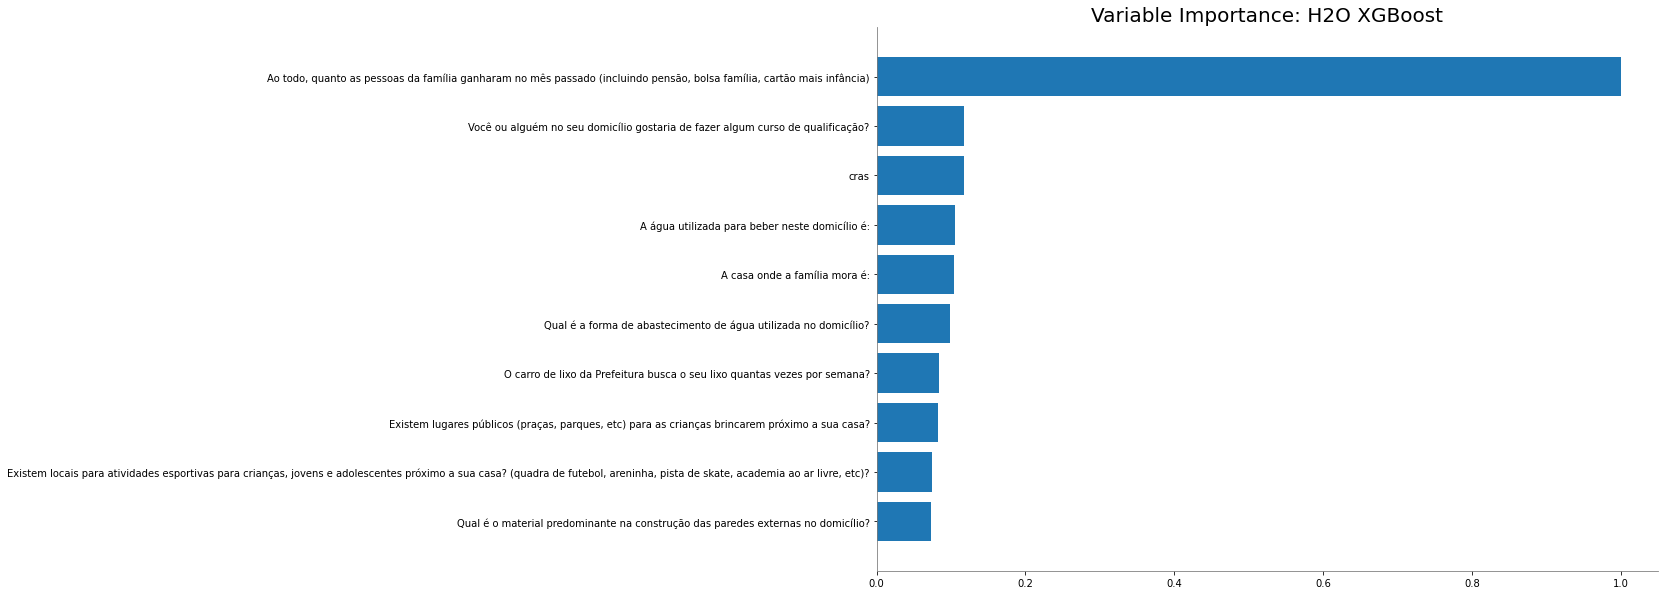

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_16

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    creas    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.412541                                                                                 1       1        0                                0                                                                                  1                                                                  0                                                 0                                              0                                                                           0                                                                                                 0                                                                                                                                  0                                                                                                                                                                               0                                                             1  grave
                                                                   0                      0                                                                                                                        0.450495                                                                                 1       1        0                                1                                                                                  0                                                                  0                                              

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                            mean_per_class_error    logloss      rmse       mse
XGBoost_grid_1_AutoML_6_20221123_233453_model_10                0.717326    1.08538  0.616927  0.380599
XGBoost_2_AutoML_6_20221123_233453                              0.717623    1.07632  0.616522  0.3801
XGBoost_1_AutoML_6_20221123_233453                              0.717694    1.0814   0.617454  0.381249
GBM_grid_1_AutoML_6_20221123_233453_model_2                     0.718393    1.07424  0.627662  0.393959
XGBoost_grid_1_AutoML_6_20221123_233453_model_1                 0.718655    1.10875  0.618495  0.382536
XGBoost_grid_1_AutoML_6_20221123_233453_model_9                 0.719176    1.0816   0.617188  0.380921
GBM_grid_1_AutoML_6_20221123_233453_model_8                     0.719532    1.0807   0.632459  0.400004
XGBoost_grid_1_AutoML_6_20221123_233453_model_7                

### Best Model Updated: df_RFE_DTC_16-XGBoost_grid_1_AutoML_6_20221123_233453_model_10-acc:0.5280637661906343

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_RFE_DTC_16-XGBoost_grid_1_AutoML_6_20221123_233453_model_10-acc:0.5280637661906343

### df_RFE_DTC_16 has accuracy: 0.5280637661906343

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_6_20221123_233453_model_10


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.3079473942427223
RMSE: 0.5549300804990862
LogLoss: 0.8628229124244629
Mean Per-Class Error: 0.6135105303280249
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  --------------
3828     2       5024        24        0.568822   5,050 / 8,878
223      101     1379        31        0.941753   1,633 / 1,734
1136     5       13075       50        0.0834852  1,191 / 14,266
231      4       1669        310       0.859982   1,904 / 2,214
5418     112     21147       415       0.360918   9,778 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.639082
2    0.891038
3    0.975934
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.3805993237136515
RMSE: 0.6169273244991273
LogLoss: 1.0853805855407423
Mean Per-Class Error: 0.7173259577214326
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2305     6       6516        51        0.740369  6,573 / 8,878
254      7       1435        38        0.995963  1,727 / 1,734
2300     23      11802       141       0.172718  2,464 / 14,266
262      5       1859        88        0.960253  2,126 / 2,214
5121     41      21612       318       0.475786  12,890 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.524214
2    0.851284
3    0.935036
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.524213  0.00882043  0.524354      0.538007      0.527132      0.515319      0.524179      0.533407      0.52787       0.512366      0.511259      0.528239
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.475787  0.00882043  0.475646      0.461993      0.472868      0.484681      0.475821      0.466593      0.47213       0.487634      0.488741      0.471761
err_count                1289      23.8141     1289          1252          1281          1313          1289          1264          1279          1321          1324          1278
logloss                  1.08538   0.0119607   1.08466       1.07033       1.09004       1.08202       1.08396       1.07919       1.06969       1.08527       1.10771       1.10094
max_per_class_error      0.995985  0.00597628  1             1             0.994012      1             1             1             0.987261      1             0.994536      0.984043
mean_per_class_accuracy  0.282744  0.00515338  0.28

<Figure size 432x288 with 0 Axes>

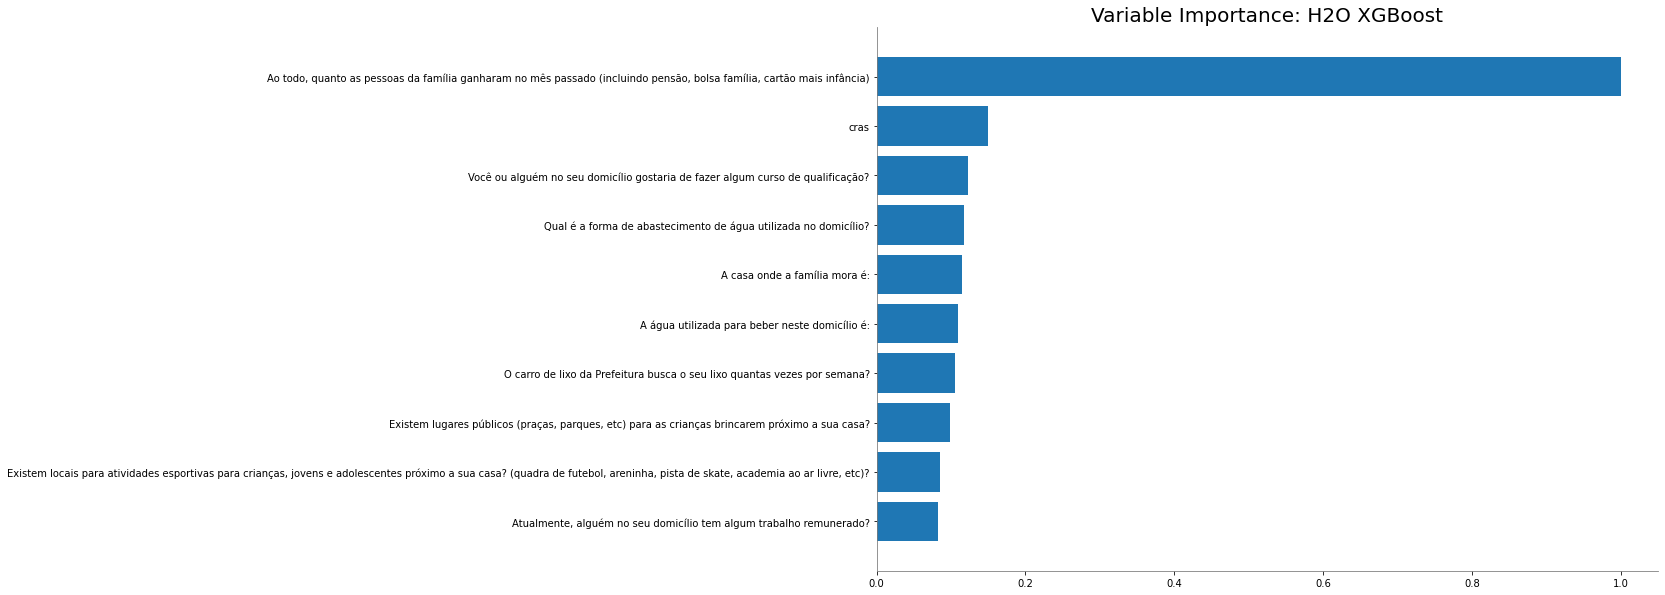

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_17

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    creas    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O domicílio possui água canalizada em pelo menos um cômodo?    A água utilizada para beber neste domicílio é:    No domicílio, existe banheiro ou sanitário?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  -------------------------------------------------------------  ------------------------------------------------  ---------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   0                      0                                                                                                                        0.412541                                                                                 1       1        0                                1                                                                                  1                                                                  1                                                              1                                                 0                                              1                                                                           1                                                                                                 0                                                                                                                                  0                                                                                                                                                                               0                                                             1  moderada
                                                                   0                      0                                                                                                                        0.49505                                                                                  1       1        0                                1    

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
LeaderBoard
model_id                                           mean_per_class_error    logloss      rmse       mse
XGBoost_grid_1_AutoML_7_20221124_03516_model_9                 0.715035    1.08079  0.616689  0.380305
XGBoost_grid_1_AutoML_7_20221124_03516_model_7                 0.716399    1.08393  0.615814  0.379227
XGBoost_grid_1_AutoML_7_20221124_03516_model_3                 0.716524    1.09293  0.617181  0.380912
XGBoost_1_AutoML_7_20221124_03516                              0.717733    1.08185  0.61713   0.380849
XGBoost_2_AutoML_7_20221124_03516                              0.717818    1.07508  0.615713  0.379103
XGBoost_grid_1_AutoML_7_20221124_03516_model_1                 0.718059    1.10138  0.61739   0.38117
XGBoost_grid_1_AutoML_7_20221124_03516_model_10                0.719184    1.07808  0.616533  0.380113
GBM_grid_1_AutoML_7_20221124_03516_model_2                     0.71921

### df_RFE_DTC_17 has accuracy: 0.5220856858186649

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_7_20221124_03516_model_9


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.31748030798189064
RMSE: 0.5634539093678299
LogLoss: 0.891404659781916
Mean Per-Class Error: 0.6335064210879873
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error      Rate
-------  ------  ----------  --------  ---------  ---------------
3800     1       5041        36        0.571976   5,078 / 8,878
236      52      1411        35        0.970012   1,682 / 1,734
1249     3       12962       52        0.0914061  1,304 / 14,266
292      7       1695        220       0.900632   1,994 / 2,214
5577     63      21109       343       0.371254   10,058 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.628746
2    0.87978
3    0.970729
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.380304932098036
RMSE: 0.6166886832900665
LogLoss: 1.0807878561264206
Mean Per-Class Error: 0.715034617214442
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
grave    leve    moderada    sem ia    Error     Rate
-------  ------  ----------  --------  --------  ---------------
2553     2       6284        39        0.712435  6,325 / 8,878
276      8       1413        37        0.995386  1,726 / 1,734
2496     12      11642       116       0.183934  2,624 / 14,266
302      12      1830        70        0.968383  2,144 / 2,214
5627     34      21169       262       0.473166  12,819 / 27,092

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.526834
2    0.852576
3    0.936513
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.526836  0.0147767   0.497786      0.511808      0.542636      0.525655      0.535253      0.524917      0.516058      0.544112      0.531931      0.538206
auc                      nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.473164  0.0147767   0.502214      0.488192      0.457364      0.474345      0.464747      0.475083      0.483942      0.455888      0.468069      0.461794
err_count                1281.9    40.1952     1361          1323          1239          1285          1259          1287          1311          1235          1268          1251
logloss                  1.08079   0.0197825   1.11231       1.08152       1.07465       1.06959       1.05393       1.0986        1.11064       1.06865       1.07102       1.06694
max_per_class_error      0.995423  0.00699143  1             1             1             0.994118      0.994012      0.994475      1             0.977273      1             0.99435
mean_per_class_accuracy  0.285002  0.00601427  0.274918

<Figure size 432x288 with 0 Axes>

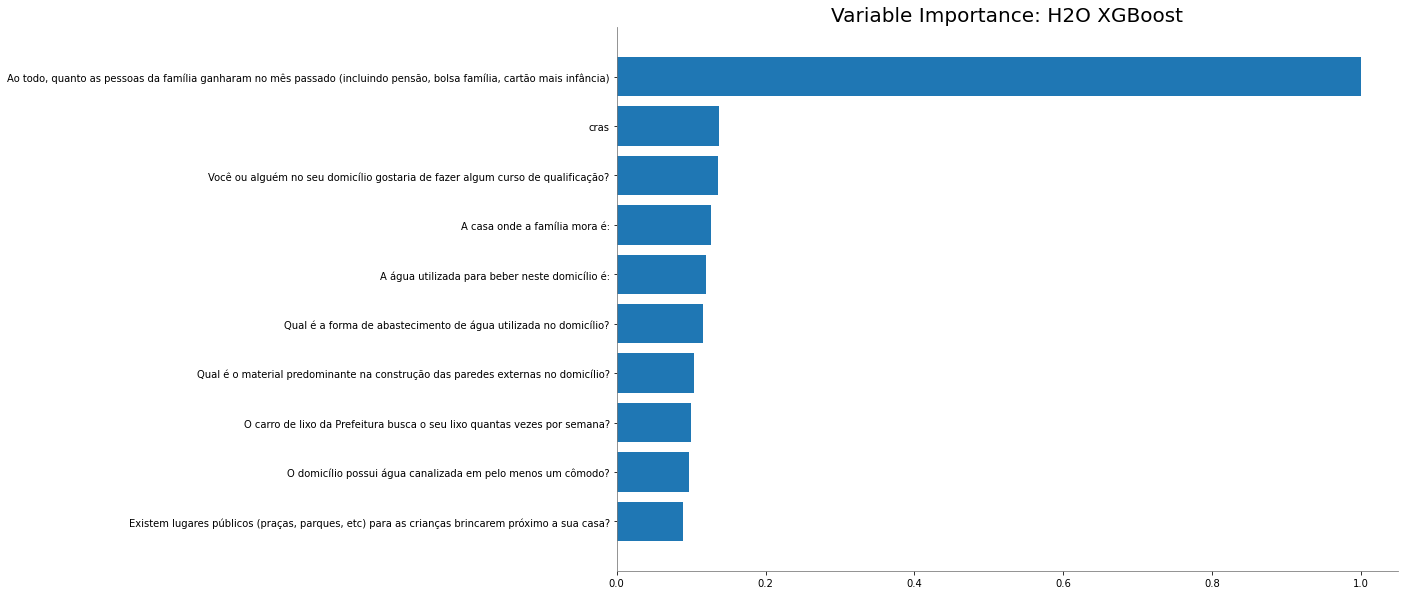

<Figure size 432x288 with 0 Axes>

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_RFE_DTC_14

Atualmente, alguém no seu domicílio tem algum trabalho remunerado?    Se sim, quantos trabalham?    Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)    Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?    cras    creas    A casa onde a família mora é:    Qual é o material predominante na construção das paredes externas no domicílio?    Qual é a forma de abastecimento de água utilizada no domicílio?    O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?    Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?    Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?    Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?    O domicílio está localizado em área de conflito/violência?  ia level
--------------------------------------------------------------------  ----------------------------  -----------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------  ------  -------  -------------------------------  ---------------------------------------------------------------------------------  -----------------------------------------------------------------  --------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------  ----------
                                                                   1                      0.166667                                                                                                                 1                                                                                        1       0        0                                0                                                                                  0                                                                  1                                                                           1                                                                                                 1                                                                                                                                  0                                                                                                                                                                               0                                                             1  moderada
                                                                   0                      0                                                                                                                        0.377063                                                                                 1       1        0                                0                                                                                  0                                                                  1                                                                           1                                                                                                 0                                                                                                                                  0                             

AutoML progress: |████████████████████

In [ ]:
RFE_DTC_14 = [10, 11, 12, 14, 15, 16, 17, 18, 19, 23, 25, 26, 27, 28, 29]
RFE_DTC_15 = [10, 11, 12, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29]
RFE_DTC_16 = [10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29]
RFE_DTC_17 = [10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29]

df_RFE_DTC_14 = df[RFE_DTC_14]
df_RFE_DTC_15 = df[RFE_DTC_15]
df_RFE_DTC_16 = df[RFE_DTC_16]
df_RFE_DTC_17 = df[RFE_DTC_17]

feature_combinations = {
    'df_RFE_DTC_14' : df[RFE_DTC_14],
    'df_RFE_DTC_15' : df[RFE_DTC_15],
    'df_RFE_DTC_16' : df[RFE_DTC_16],
    'df_RFE_DTC_17' : df[RFE_DTC_17]
}

from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"
    
        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()
    
        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
    
    print()
    display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
    print()
    
    display(Markdown(f"### Details of the best model"))
    display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)